In [1]:
import xarray as xr
import glob
import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
from matplotlib.patches import Rectangle
from matplotlib.lines import Line2D
import sys
import scipy
sys.path.append("/home/qwertz/Dokumente/N_eigene_Dokumente/Geo_Met_MSc/Semester_4_5/Thesis_prep_Juni_23/MA/Notebooks/")
from Sc_module import convert_single_timestamp
from Sc_module import convert_to_float_timestamps
from Sc_module import ucla_time2useful_time
# from Sc_module import ucla_time2useful_time
####################################################
plt.rc('font', size=18)  # Standard Schriftgröße (falls nicht anders angegeben)
plt.rc('axes', titlesize=22)     # Größe der Titel
plt.rc('axes', labelsize=18)     # Größe der Achsenbeschriftungen
plt.rc('xtick', labelsize=18)    # Größe der x-Tick-Beschriftungen
plt.rc('ytick', labelsize=18)    # Größe der y-Tick-Beschriftungen
plt.rc('legend', fontsize=18)    # Größe der Legende
plt.rc('figure', titlesize=24)   # Größe der allgemeinen Figur-Titel (falls vorhanden)
####################################################

myFmt = mdates.DateFormatter('%H:%M')

outputdir = "/home/qwertz/Dokumente/N_eigene_Dokumente/Geo_Met_MSc/Semester_4_5/Thesis_prep_Juni_23/MA/master_plots/07_PWORK_comps/"

#######################################
# Styles: Preethi

print(plt.style.available)  #'seaborn-bright'  'ggplot'  'bmh'  'classic'  ''
# plt.style.use('dark_background')
# plt.style.use('ggplot')
# plt.style.use('seaborn-dark')
plt.style.use('seaborn-poster')

#######################################
# Read in data of all five:

ds_theta_v4 = xr.open_dataset("/home/qwertz/obs_data_MA/iqq_foghat/theta_v_spec_hum_iqq_22_23apschera20240304.nc")
old_controle = "/home/qwertz/UCLA/uclales/Runs/CONTROLE_RUN (another copy)/"
controle = "/home/qwertz/UCLA/uclales/Runs/00_CONTROLE/"
sst_minus00 = "/home/qwertz/UCLA/uclales/Runs/00_SST_MINUS/"
sst_plus00 = "/home/qwertz/UCLA/uclales/Runs/00_SST_PLUS/"
ccn_plus00 ="/home/qwertz/UCLA/uclales/Runs/00_CCN_PLUS/"
ccn_minus00 ="/home/qwertz/UCLA/uclales/Runs/00_CCN_MINUS/"
grid5_00 = "/home/qwertz/UCLA/uclales/Runs/00_GRID_DZ5/"
grid_icon_00 ="/home/qwertz/UCLA/uclales/Runs/00_GRID_ICONLES/"
file_icon = "/home/qwertz/data_js_icon_22_23_August_2018/stat_IQQ_all-times.nc"
file2 = "/home/qwertz/obs_data_MA/iqq_foghat/22/sups_iqq_mwr00_l2_clwvi_p00_20180822000000.nc"
cloudnet_path = "/home/qwertz/obs_data_MA/iqq_cloudnet/"
files = ["20180822_iquique_classification.nc","20180823_iquique_classification.nc",\
         "20180822_iquique_halo-doppler-lidar_BL-classification.nc", "20180823_iquique_halo-doppler-lidar_BL-classification.nc",\
         "20180822_iquique_halo-doppler-lidar_cloud.nc", "20180823_iquique_halo-doppler-lidar_cloud.nc",\
         "20180822_iquique_lwc-adiabatic-method.nc", "20180823_iquique_lwc-adiabatic-method.nc"]

print(grid5_00+"rf01.ts.nc")

ds_class22 = xr.open_dataset(cloudnet_path+files[0])
ds_foghat_cloud22 = xr.open_dataset(file2)#, engine="netcdf4")
controle_tsds = xr.open_dataset(controle+"rf01.ts.nc").sel(time=slice("2000-01-01T02:00:00.000000000", "2000-01-02T00:00:00.000000000"))
sstplus_tsds =xr.open_dataset(sst_plus00+"rf01.ts.nc").sel(time=slice("2000-01-01T02:00:00.000000000", "2000-01-02T00:00:00.000000000"))
sst_minus_tsds = xr.open_dataset(sst_minus00+"rf01.ts.nc").sel(time=slice("2000-01-01T02:00:00.000000000", "2000-01-02T00:00:00.000000000"))
controle_psds = xr.open_dataset(controle+"rf01.ps.nc").sel(time=slice("2000-01-01T02:00:00.000000000", "2000-01-02T00:00:00.000000000"))
sstplus_psds =xr.open_dataset(sst_plus00+"rf01.ps.nc").sel(time=slice("2000-01-01T02:00:00.000000000", "2000-01-02T00:00:00.000000000"))
sst_minus_psds = xr.open_dataset(sst_minus00+"rf01.ps.nc").sel(time=slice("2000-01-01T02:00:00.000000000", "2000-01-02T00:00:00.000000000"))
ds_icon = xr.open_dataset(file_icon)
ds_ccn_minus = xr.open_dataset(ccn_minus00+"rf01.ps.nc").sel(time=slice("2000-01-01T02:00:00.000000000", "2000-01-02T00:00:00.000000000"))
ds_ccn_plus = xr.open_dataset(ccn_plus00+"rf01.ps.nc").sel(time=slice("2000-01-01T02:00:00.000000000", "2000-01-02T00:00:00.000000000"))
grid5_00_tsds = xr.open_dataset(grid5_00+"rf01.ts.nc").sel(time=slice("2000-01-01T02:00:00.000000000", "2000-01-02T00:00:00.000000000"))
grid5_00_psds = xr.open_dataset(grid5_00+"rf01.ps.nc").sel(time=slice("2000-01-01T02:00:00.000000000", "2000-01-02T00:00:00.000000000"))
grid_icon_00_tsds = xr.open_dataset(grid_icon_00+"rf01.ts.nc").sel(time=slice("2000-01-01T02:00:00.000000000", "2000-01-02T00:00:00.000000000"))
grid_icon_00_psds = xr.open_dataset(grid_icon_00+"rf01.ps.nc").sel(time=slice("2000-01-01T02:00:00.000000000", "2000-01-02T00:00:00.000000000"))


ccn_minus_tsds= xr.open_dataset(ccn_minus00+"rf01.ts.nc").sel(time=slice("2000-01-01T02:00:00.000000000", "2000-01-02T00:00:00.000000000"))
ccn_plus_tsds= xr.open_dataset(ccn_plus00+"rf01.ts.nc").sel(time=slice("2000-01-01T02:00:00.000000000", "2000-01-02T00:00:00.000000000"))

path = "/home/qwertz/UCLA/uclales/Runs/"

ICON_sharp_ps = xr.open_dataset(path+"11_Mimic_ICON_sharp/rf01.ps.nc").sel(time=slice("2000-01-01T02:00:00.000000000", "2000-01-03T00:00:00.000000000")) # 151198
low_smag_ps = xr.open_dataset(path+"22_LowSMAG_ICON/rf01.ps.nc").sel(time=slice("2000-01-01T02:00:00.000000000", "2000-01-03T00:00:00.000000000"))
high_smag_ps = xr.open_dataset(path+"22_HighSMAG_ICON/rf01.ps.nc").sel(time=slice("2000-01-01T02:00:00.000000000", "2000-01-03T00:00:00.000000000"))
ICON_sharp_ts = xr.open_dataset(path+"11_Mimic_ICON_sharp/rf01.ts.nc").sel(time=slice("2000-01-01T02:00:00.000000000", "2000-01-03T00:00:00.000000000")) # 151198
low_smag_ts = xr.open_dataset(path+"22_LowSMAG_ICON/rf01.ts.nc").sel(time=slice("2000-01-01T02:00:00.000000000", "2000-01-03T00:00:00.000000000"))
high_smag_ts = xr.open_dataset(path+"22_HighSMAG_ICON/rf01.ts.nc").sel(time=slice("2000-01-01T02:00:00.000000000", "2000-01-03T00:00:00.000000000"))
#######################################

print(ICON_sharp_ps.data_vars)

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']
/home/qwertz/UCLA/uclales/Runs/00_GRID_DZ5/rf01.ts.nc
Data variables:
    dn0      (zt) float32 200B ...
    u0       (zt) float32 200B ...
    v0       (zt) float32 200B ...
    fsttm    (time) float32 2kB ...
    lsttm    (time) float32 2kB ...
    nsmp     (time) float32 2kB ...
    u        (time, zt) float32 111kB ...
    v        (time, zm) float32 111kB ...
    t        (time, zt) float32 111kB ...
    p        (time, zt) float32 111kB ...
    u_2      (time, zt) float32 111kB ...
    v_2      (time, zt) fl

In [2]:
# Plot LWP of all five for 22nd of August:

from scipy import signal

######################################

def ucla_time2useful_time(ucla_time):
    # <class 'numpy.datetime64'> angeblich hat es bereits diesen Datentypen...
    time_list = []
    for i, timestep in enumerate(ucla_time):
        if i>2 and str(timestep)[10:19]=="T00:00:00":
            string = "2018-08-23"+str(timestep)[10:]
        else:
            string = "2018-08-22"+str(timestep)[10:]
        time_list.append(np.datetime64(string))
    new_time = np.array(time_list)
    return new_time

########################################

lwp_icon = ds_icon["tqc"].isel(ncells=0).sel(time=slice(20180822.0, 20180823.0))
ds_foghat_cloud22["clwvi"]
icon_times_np = [convert_single_timestamp(value) for value in lwp_icon["time"].values]
controle_time = ucla_time2useful_time(controle_tsds["time"].values)
ccn_new_time = ucla_time2useful_time( ccn_minus_tsds["time"].values)

print(lwp_icon.units)
print(ds_foghat_cloud22["clwvi"].units)
print(controle_tsds["lwp_bar"].units)

#########################################
# Resampling:

# ds_foghat_cloud22["time"].values
# ds_foghat_cloud22["clwvi"].values
new_foghat_data = signal.resample(ds_foghat_cloud22["clwvi"].values, 100, t=ds_foghat_cloud22["time"].values)
new_foghat_time = signal.resample(ds_foghat_cloud22["time"].values, 100, t=ds_foghat_cloud22["time"].values)
new_foghat_data =ds_foghat_cloud22["clwvi"].values
new_foghat_time = ds_foghat_cloud22["time"].values

##########################################

plt.figure(figsize=(15,8))
plt.title("Liquid Water Path ")
plt.plot(new_foghat_time, new_foghat_data, label="Foghat", color="blue")
plt.plot(icon_times_np, lwp_icon.values, label="ICON", color="red")
plt.plot(controle_time, controle_tsds["lwp_bar"].values/1000, label="UCLA Controle", color="green")
plt.plot(controle_time, sst_minus_tsds["lwp_bar"].values/1000, label="UCLA SST -2 K", color="purple")
plt.plot(controle_time, sstplus_tsds["lwp_bar"].values/1000, label="UCLA SST +2 K", color="orange")
plt.plot(ccn_new_time, ccn_minus_tsds["lwp_bar"].values/1000, label="CCN-", color="yellow")
plt.plot(controle_time, ccn_plus_tsds["lwp_bar"].values/1000, label="CCN+", color="turquoise")
plt.plot(controle_time, grid5_00_tsds["lwp_bar"].values/1000, label="Grid: DZ5", color="lightgreen")
plt.plot(controle_time, grid_icon_00_tsds["lwp_bar"].values/1000, label="Grid: ICON", color= "magenta")
plt.axvline(np.datetime64("2018-08-22T11:58:00"), color="black",label="sunrise 7:58 LOC")
plt.axvline(np.datetime64("2018-08-22T23:28:00"), color="black",label="sunset 19:28 LOC")
plt.xlabel("time UTC", fontsize=12)
plt.ylabel("LWP [kg m-2]", fontsize=12)
plt.ylim(0, 0.6)
plt.legend()
# plt.savefig(outputdir+lwp_timeseries.png)
plt.close()




kg m-2
kg m-2
g/m^2


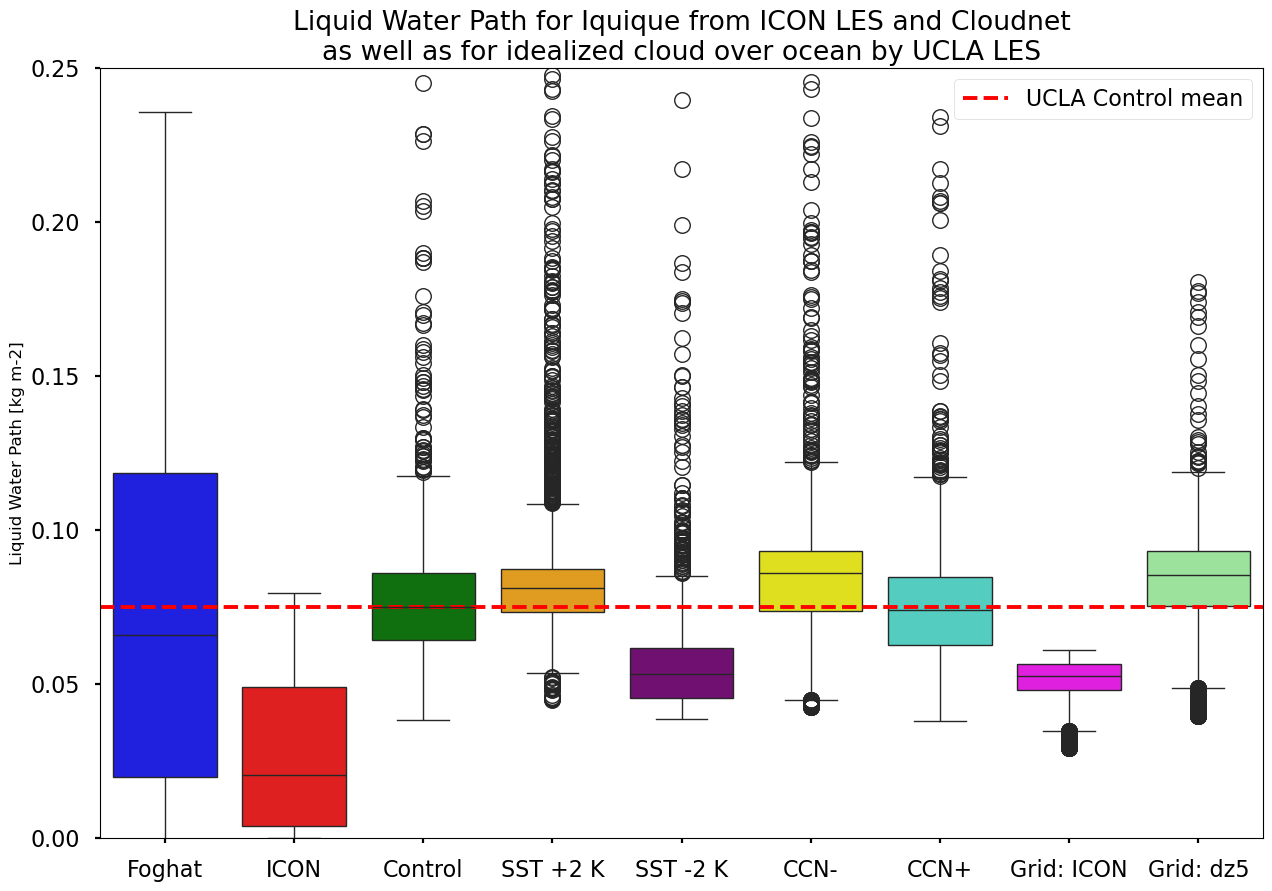

In [3]:
# Lieber als boxplot oder mit reduziertem Rauschen?

import seaborn as sns

########################################

def remove_nans(arr):
    arr = np.array(arr)
    cleaned_arr = arr[~np.isnan(arr)]
    return cleaned_arr

########################################
#ds_ccn_minus
#ds_ccn_plus 

lwp_data = {"Foghat":remove_nans(ds_foghat_cloud22["clwvi"].values), "ICON":remove_nans(lwp_icon.values),\
             "Control":remove_nans(controle_tsds["lwp_bar"].values/1000),\
             "SST +2 K":remove_nans(sstplus_tsds["lwp_bar"].values/1000),\
                                         "SST -2 K":remove_nans(sst_minus_tsds["lwp_bar"].values/1000),\
           "CCN-":remove_nans(ccn_minus_tsds["lwp_bar"].values/1000),\
           "CCN+":remove_nans(ccn_plus_tsds["lwp_bar"].values/1000),\
           "Grid: ICON":remove_nans(grid_icon_00_tsds["lwp_bar"].values/1000),\
           "Grid: dz5":remove_nans(grid5_00_tsds["lwp_bar"].values/1000),}

plt.figure(figsize=(15,10))
plt.title("Liquid Water Path for Iquique from ICON LES and Cloudnet\nas well as for idealized cloud over ocean by UCLA LES") 
sns.boxplot(data=lwp_data, palette=["blue", "red", "green", "orange", "purple","yellow",\
                                      "turquoise", "magenta", "lightgreen"]) #, ax = d[2])
plt.axhline(np.nanmean(controle_tsds["lwp_bar"].values/1000),color="red", linestyle="dashed", label="UCLA Control mean")
plt.ylabel("Liquid Water Path [kg m-2]", fontsize=12) 
plt.ylim(0,0.25)
plt.legend()
# plt.tight_layout()
plt.savefig(outputdir+"boxplot_LWP_7ucla_1ICON_1obs.png")
# plt.close()

###################################################
# Schreibe UCLA tiefergestellt in den Index.
# Kürze Conrtole up
# Schreibe SST+2K zusammen ohne Leerzeichen

mean of control:  0.07489796
mean of icon:  0.051769856
mean of dz5:  0.08128667
mean of controle:  0.016955055
mean of icon:  0.0058492064
mean of dz5:  0.01577693


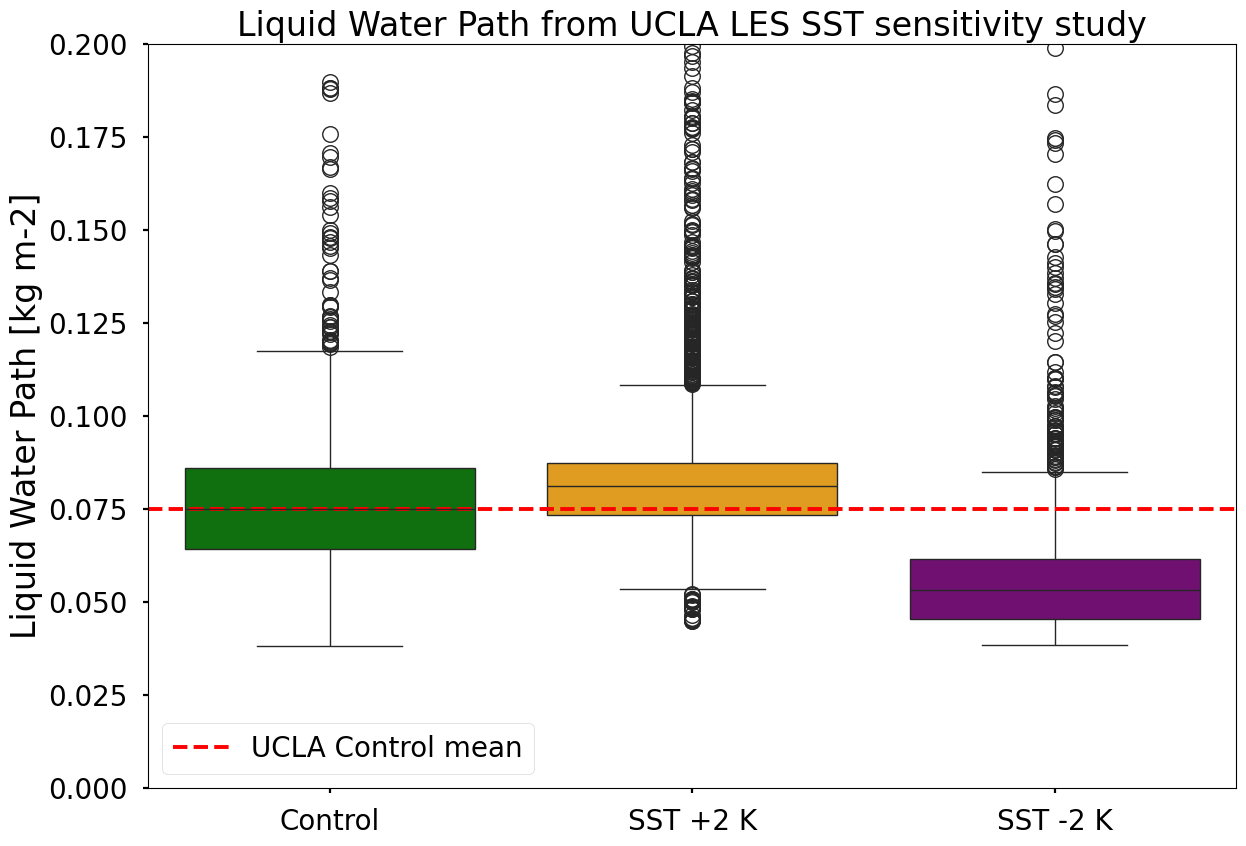

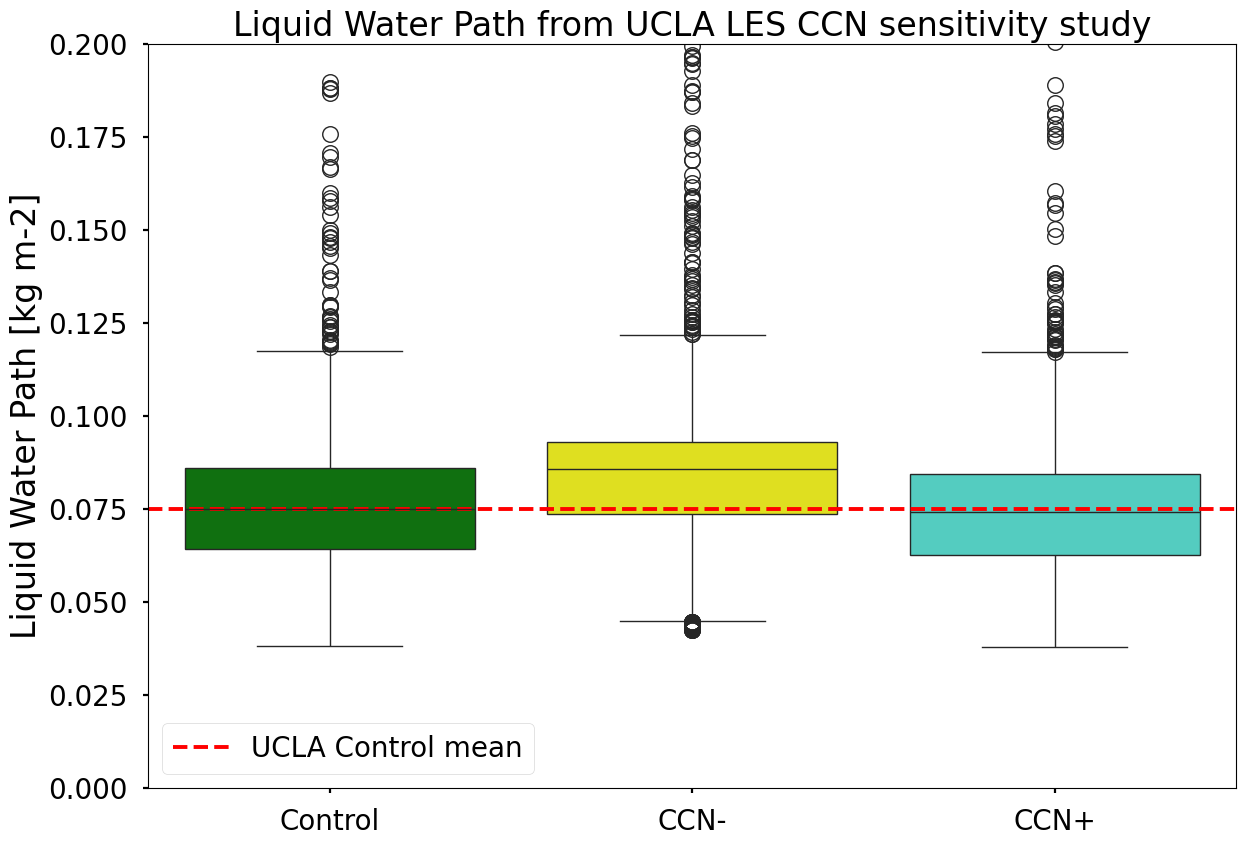

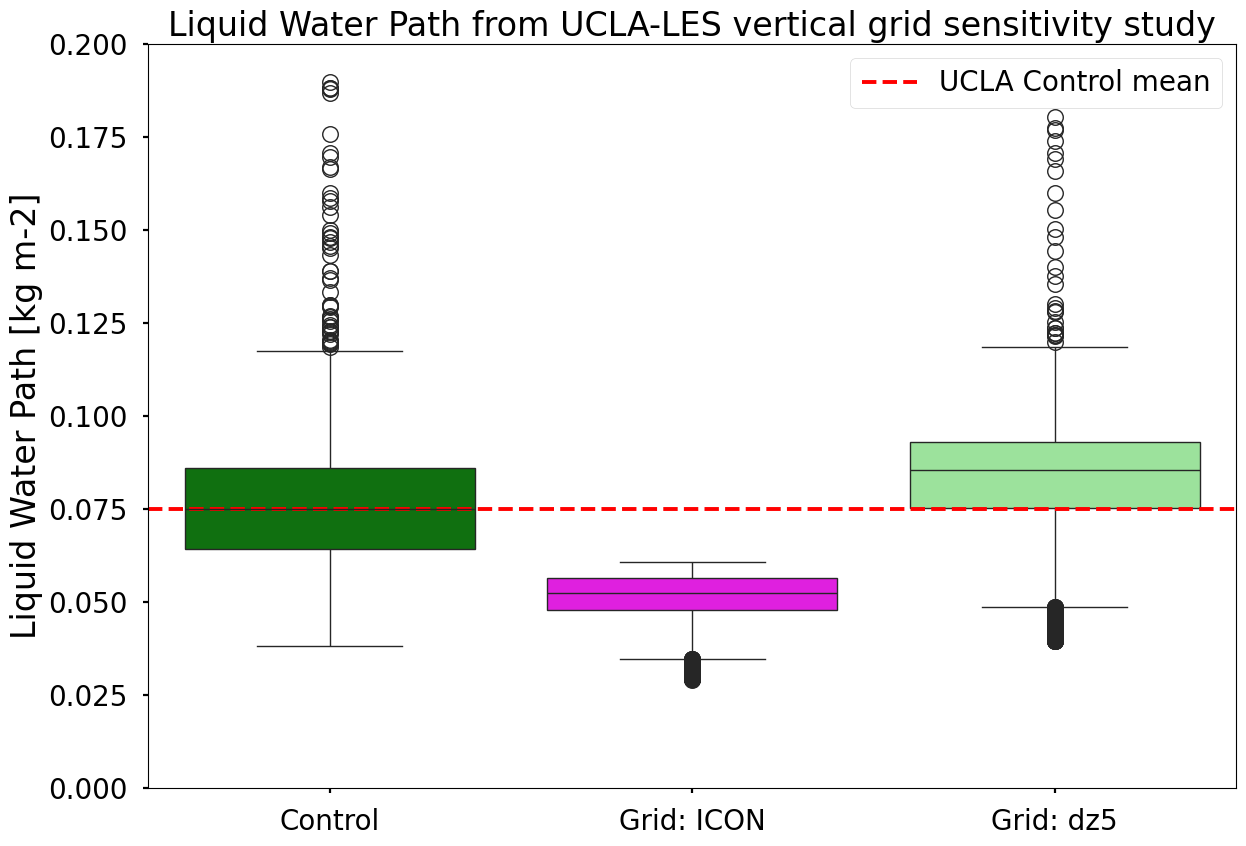

In [4]:
# LWP just for SST and CCN

################################################
# SST:

lwp_data = {"Control":remove_nans(controle_tsds["lwp_bar"].values/1000),\
             "SST +2 K":remove_nans(sstplus_tsds["lwp_bar"].values/1000),\
                                         "SST -2 K":remove_nans(sst_minus_tsds["lwp_bar"].values/1000),}

plt.figure()#figsize=(15,10))
plt.title("Liquid Water Path from UCLA LES SST sensitivity study", fontsize=24)
sns.boxplot(data=lwp_data, palette=[ "green", "orange", "purple"]) #, ax = d[2])
plt.axhline(np.nanmean(controle_tsds["lwp_bar"].values/1000),color="red", linestyle="dashed", label="UCLA Control mean")
plt.ylabel("Liquid Water Path [kg m-2]", fontsize=24)
plt.ylim(0,0.2)
plt.legend(fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.tight_layout()
plt.savefig(outputdir+"boxplot_LWP_just_SST_sens.png")

#####################################################
# CCN

lwp_data = {"Control":remove_nans(controle_tsds["lwp_bar"].values/1000),\
           "CCN-":remove_nans(ccn_minus_tsds["lwp_bar"].values/1000),\
           "CCN+":remove_nans(ccn_plus_tsds["lwp_bar"].values/1000),}

plt.figure()#figsize=(15,10))
plt.title("Liquid Water Path from UCLA LES CCN sensitivity study", fontsize=24)
sns.boxplot(data=lwp_data, palette=["green", "yellow",\
                                      "turquoise"]) #, ax = d[2])
plt.axhline(np.nanmean(controle_tsds["lwp_bar"].values/1000),color="red", linestyle="dashed", label="UCLA Control mean")
plt.ylabel("Liquid Water Path [kg m-2]", fontsize=24)
plt.ylim(0,0.2)
plt.legend(fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.tight_layout()
plt.savefig(outputdir+"boxplot_LWP_just_CCN_sens.png")

#####################################################
# DZ

lwp_data = { "Control":remove_nans(controle_tsds["lwp_bar"].values/1000),\
           "Grid: ICON":remove_nans(grid_icon_00_tsds["lwp_bar"].values/1000),\
           "Grid: dz5":remove_nans(grid5_00_tsds["lwp_bar"].values/1000),}

plt.figure()#figsize=(15,10))
plt.title("Liquid Water Path from UCLA-LES vertical grid sensitivity study", fontsize=24)
sns.boxplot(data=lwp_data, palette=["green", "magenta", "lightgreen"]) #, ax = d[2])
plt.axhline(np.nanmean(controle_tsds["lwp_bar"].values/1000),color="red", linestyle="dashed", label="UCLA Control mean")
plt.ylabel("Liquid Water Path [kg m-2]", fontsize=24)
plt.ylim(0,0.2)
plt.legend(fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.tight_layout()
plt.savefig(outputdir+"boxplot_LWP_just_DZ_sens.png")


print("mean of control: ", np.nanmean(remove_nans(controle_tsds["lwp_bar"].values/1000)))
print("mean of icon: ",np.nanmean(remove_nans(grid_icon_00_tsds["lwp_bar"].values/1000)))
print("mean of dz5: ", np.nanmean(remove_nans(grid5_00_tsds["lwp_bar"].values/1000)))
print("mean of controle: ", np.std(remove_nans(controle_tsds["lwp_bar"].values/1000)))
print("mean of icon: ",np.std(remove_nans(grid_icon_00_tsds["lwp_bar"].values/1000)))
print("mean of dz5: ", np.std(remove_nans(grid5_00_tsds["lwp_bar"].values/1000)))

[925. 925. 925. ... 905. 905. 905.]


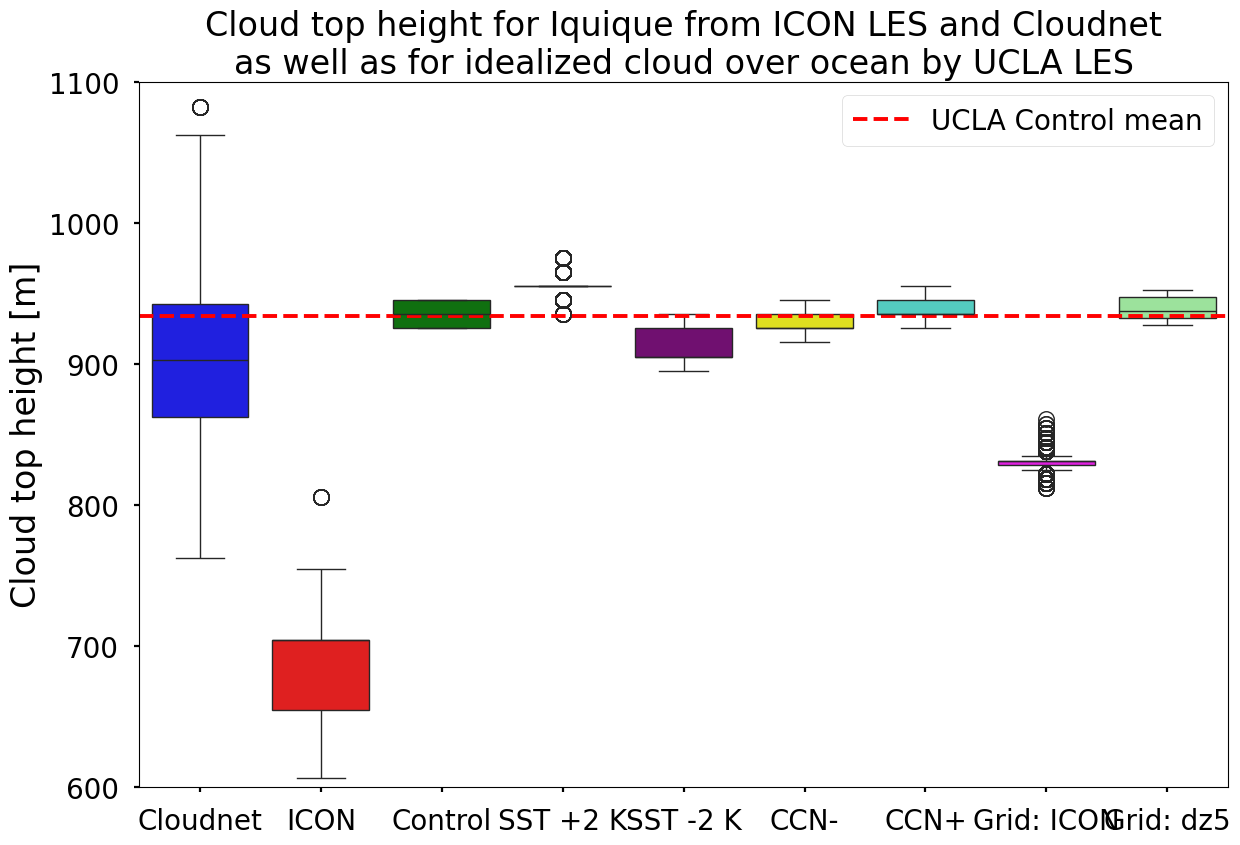

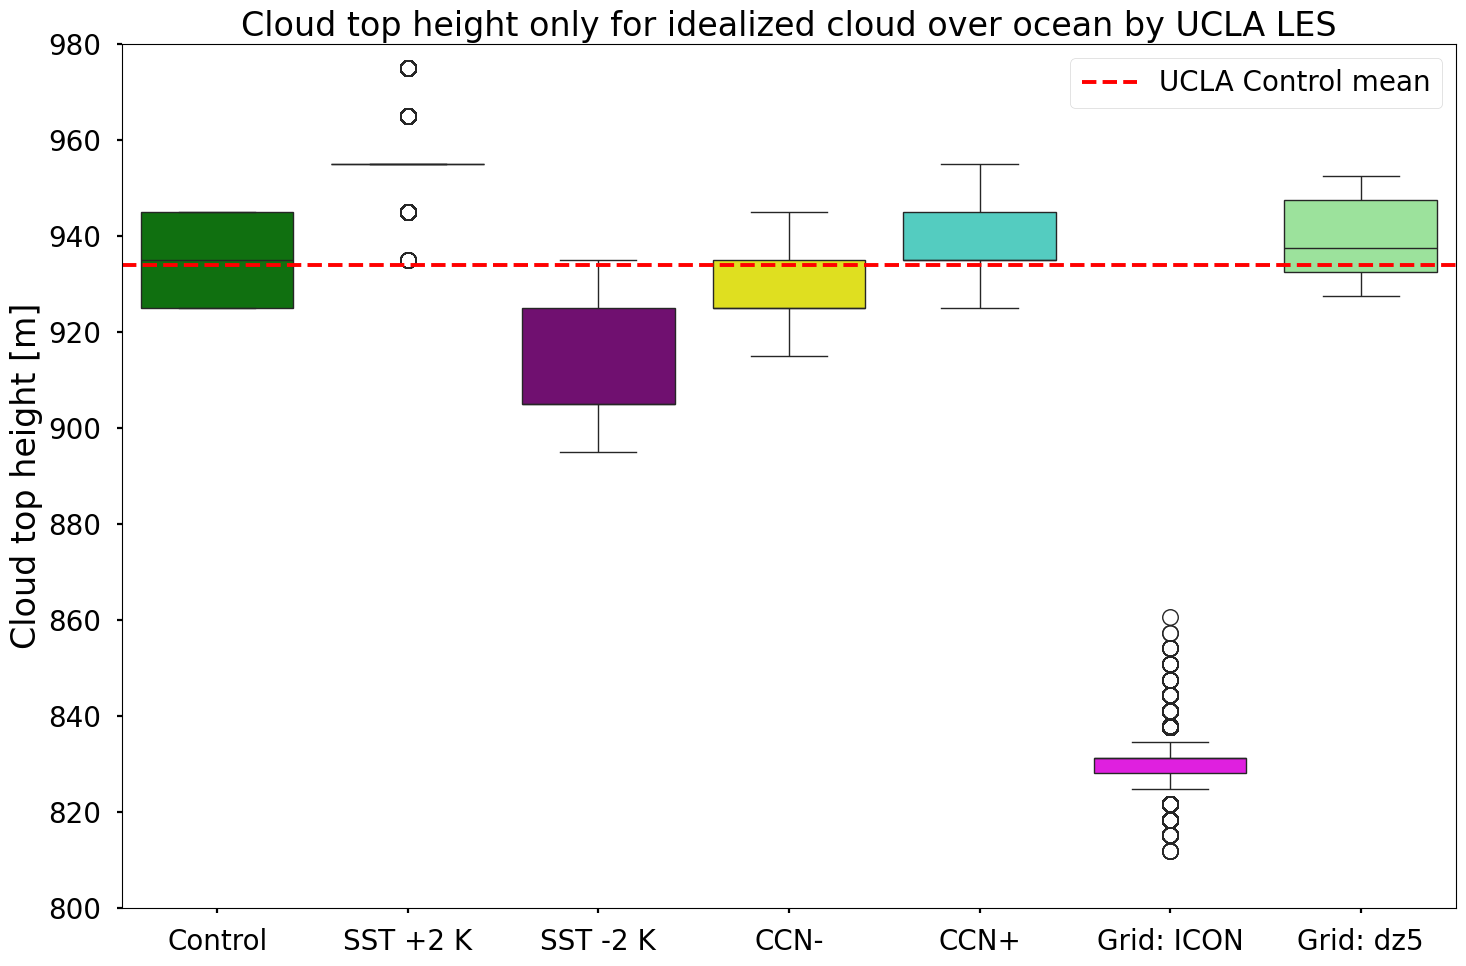

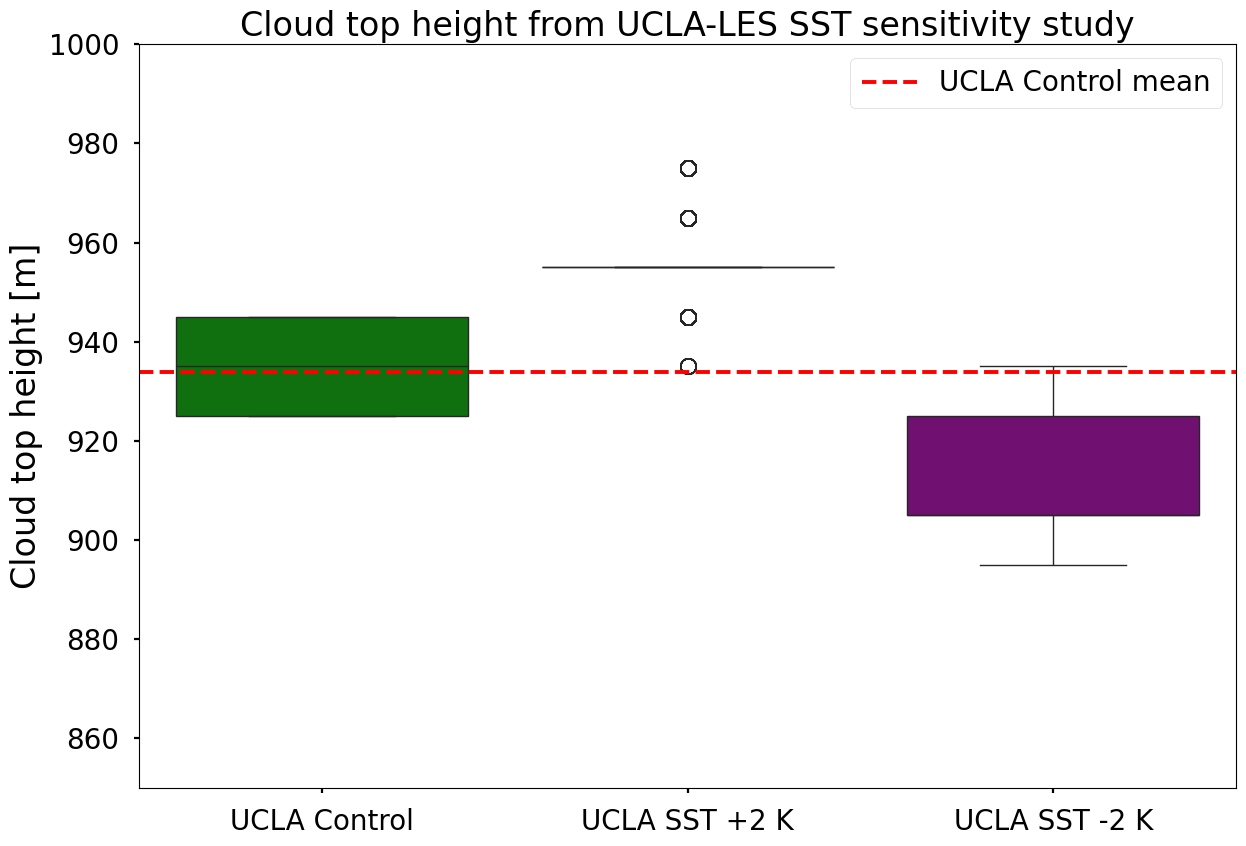

In [5]:
# Boxplot der Clout top height (PBL height?)



########################################
# pick timeframe of data:

begin_float=20180822.0
end_float=20180823.0
datetime_begin = str(convert_single_timestamp(begin_float))[:19]
datetime_end = str(convert_single_timestamp(end_float))[:19]
    
ds_cb = ds_icon.isel(ncells=0).sel(time=slice(begin_float,end_float))

#####################
# ALgorithm to derive cloudbases and cloudtops:

heights = ds_icon["z_mc"].isel(ncells=0).values
times = [convert_single_timestamp(date) for date in ds_cb["time"].values]

cloudbases_icon = []
cloudtops_icon = []
for i, timestep in enumerate(times):
    base_found = False
    top_found = False

    #print("\n\n",i, timestep, "\n")
    
    for j, height in enumerate(heights): 
        qc_value = ds_cb["qc"].values[i,j]
        if j > len(heights)-2:
            if not base_found:
                cloudbases_icon.append(np.nan)
                #print("base added1!!")
            if not top_found:
                cloudtops_icon.append(np.nan)
                #print("top added1!!!")
            break
            
        if qc_value>0 and ds_cb["qc"].values[i,j+1]>0 and ds_cb["qc"].values[i,j-1]==0 and ds_cb["qc"].values[i,j-2]==0 and not top_found:
            #print("first case (top): ",height)
            top_found = True
            cloudtops_icon.append(height)
            #print("base added2!!")
            
        elif qc_value==0 and ds_cb["qc"].values[i,j+1]==0 and ds_cb["qc"].values[i,j-1]>0 and ds_cb["qc"].values[i,j-2]>0 and not base_found:
            #print("second case (base): ",height)
            base_found = True
            cloudbases_icon.append(height)
            #print("top added2!!!")

##############################################################
# Wolkendicke berechnen!
h_icon = []
for i in range(len(cloudtops_icon)):
    h_icon.append(cloudtops_icon[i]- cloudbases_icon[i])

########################################
# Get cloud top heights or other data for PBL height:

cth_cloudnet = ds_class22["cloud_top_height"].isel(layer=0) # xr.DataArray
cth_icon = cloudtops_icon # List of values
cth_controle = controle_tsds["zc"] #xr.DataArray
cth_plus = sstplus_tsds["zc"] #xr.DataArray
cth_minus = sst_minus_tsds["zc"] #xr.DataArray
cth_ccn_plus = ccn_plus_tsds["zc"] #xr.DataArray
cth_ccn_minus = ccn_minus_tsds["zc"] #xr.DataArray
cth_grid_dz5 = grid5_00_tsds["zc"] #xr.DataArray
cth_grid_icon = grid_icon_00_tsds["zc"] #xr.DataArray

cloudtops = {"Cloudnet":cth_cloudnet.values, "ICON":cth_icon, "Control":cth_controle.values,\
             "SST +2 K":cth_plus.values, "SST -2 K":cth_minus.values, "CCN-": cth_ccn_minus.values,\
             "CCN+": cth_ccn_plus.values, "Grid: ICON": cth_grid_icon.values, "Grid: dz5": cth_grid_dz5.values}


print(cth_minus.values)

########################################
#tips = sns.load_dataset("tips")
#print(type(tips))
# plot a box plot
# sns.boxplot(x="smoker", y="total_bill", hue="day",data=tips)

plt.figure()#figsize=(15,10))
sns.boxplot(data=cloudtops, palette=["blue", "red", "green", "orange", "purple","yellow",\
                                      "turquoise", "magenta", "lightgreen"])# , whis=(0,100)) #, ax = d[2])
plt.title('Cloud top height for Iquique from ICON LES and Cloudnet\nas well as for idealized cloud over ocean by UCLA LES', fontsize=24)
plt.ylim(600, 1100)
plt.axhline(np.nanmean(cth_controle.values),color="red", linestyle="dashed", label="UCLA Control mean")
# plt.xlabel('Dataset') # give a label name to the x axis
plt.ylabel('Cloud top height [m]', fontsize=24) # give a label name to the x axis
plt.legend(fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.tight_layout()
plt.savefig(outputdir+"boxplot_cloudtops_7ucla_1ICON_1obs.png")

####
# 2nd Plot: only UCLA

cloudtops_red = {"Control":cth_controle.values,\
             "SST +2 K":cth_plus.values, "SST -2 K":cth_minus.values, "CCN-": cth_ccn_minus.values,\
             "CCN+": cth_ccn_plus.values, "Grid: ICON": cth_grid_icon.values, "Grid: dz5": cth_grid_dz5.values}
plt.figure(figsize=(15,10))
sns.boxplot(data=cloudtops_red, palette=["green", "orange", "purple","yellow",\
                                      "turquoise", "magenta", "lightgreen"]) #, ax = d[2])
plt.title('Cloud top height only for idealized cloud over ocean by UCLA LES', fontsize=24)
plt.ylim(800, 980)
plt.axhline(np.nanmean(cth_controle.values),color="red", linestyle="dashed", label="UCLA Control mean")
# plt.xlabel('Dataset') # give a label name to the x axis
plt.ylabel('Cloud top height [m]', fontsize=24) # give a label name to the x axis
plt.legend(fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.tight_layout()
plt.savefig(outputdir+"boxplot_cloudtops_only7ucla.png")

#################################
####
# Test plot

dummy_data = {"Cloudnet":cth_cloudnet.values, "ICON":cth_icon, "UCLA Control":cth_controle.values,\
             "UCLA SST +2 K":cth_plus.values, "UCLA SST -2 K":cth_minus.values, "CCN +":cth_cloudnet.values,\
              "CCN-":cth_cloudnet.values, "grid ICON":cth_cloudnet.values, "grid 5m":cth_cloudnet.values}
plt.figure()#figsize=(15,10)))
sns.boxplot(data=dummy_data, palette=["blue","red", "green", "orange", "purple", "yellow",\
                                      "turquoise", "magenta", "lightgreen"]) #, ax = d[2])
plt.title('Test plot', fontsize=24)
plt.ylim(550, 1100)
plt.axhline(np.nanmean(cth_controle.values),color="red", linestyle="dashed", label="UCLA Control mean")
# plt.xlabel('Dataset') # give a label name to the x axis
plt.ylabel('Cloud top height [m]', fontsize=24) # give a label name to the x axis
plt.legend(fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.tight_layout()
#plt.savefig(outputdir+"dummy.png")
plt.close()

#######################################

sst3_cloudtops = {"UCLA Control":cth_controle.values,\
             "UCLA SST +2 K":cth_plus.values, "UCLA SST -2 K":cth_minus.values}
plt.figure()#figsize=(15,10))
sns.boxplot(data=sst3_cloudtops, palette=[ "green", "orange", "purple"])# , whis=(0,100)) #, ax = d[2])
plt.title('Cloud top height from UCLA-LES SST sensitivity study', fontsize=24)
plt.ylim(850, 1000)
plt.axhline(np.nanmean(cth_controle.values),color="red", linestyle="dashed", label="UCLA Control mean")
# plt.xlabel('Dataset') # give a label name to the x axis
plt.ylabel('Cloud top height [m]', fontsize=24) # give a label name to the x axis
plt.legend(fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.tight_layout()
plt.savefig(outputdir+"boxplot_cloudtops_3ucla.png")


CTH Control: mean 933.90173
CTH ICON: mean 829.78827
CTH 5 m: mean 939.78174
CTH Control std:  7.874104
CTH ICON: std 5.8918285
CTH 5 m: std 7.2215033
CTH Control median:  935.0
CTH ICON: median 831.20013
CTH 5 m: median 937.5
LWP Control: mean 0.07489796
LWP ICON: mean 0.051769856
LWP 5 m: mean 0.08128667
LWP Control std: 0.016955055
LWP ICON std: 0.0058492064
LWP 5 m std: 0.01577693
LWP Control median: 0.074967824
LWP ICON median: 0.052464973
LWP 5 m median: 0.08537886
Cloud Base Height Control: mean 611.1163
Cloud Base Height ICON: mean 617.832
Cloud Base Height 5 m: mean 598.53107
Cloud Base Height Control std: 20.591722
Cloud Base Height ICON std: 17.491663
Cloud Base Height 5 m std: 45.850773
Cloud Base Height Control median: 605.0
Cloud Base Height ICON median: 620.86255
Cloud Base Height 5 m median: 597.5
Cloud Thickness Control: mean 322.78546
Cloud Thickness ICON: mean 211.95638
Cloud Thickness 5 m: mean 341.2507
Cloud Thickness Control std: 24.444311
Cloud Thickness ICON std

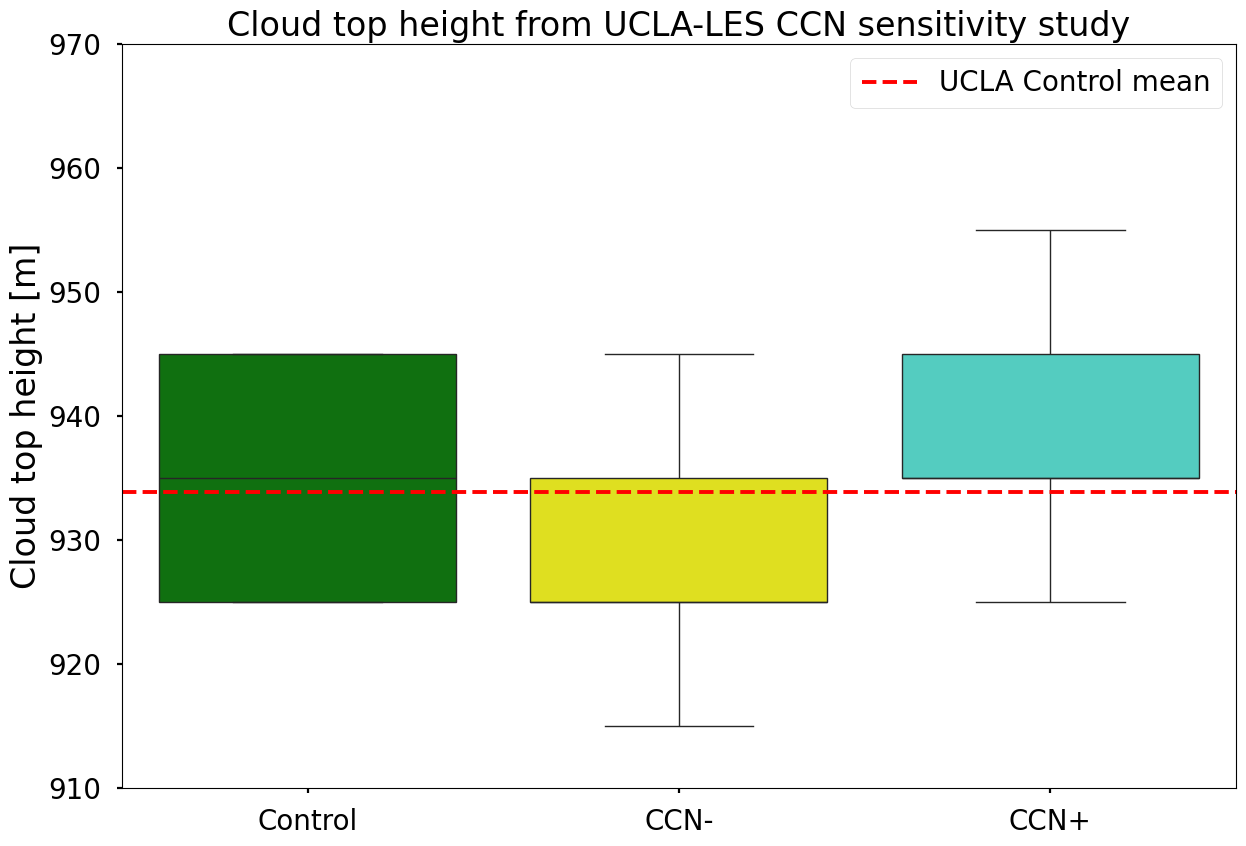

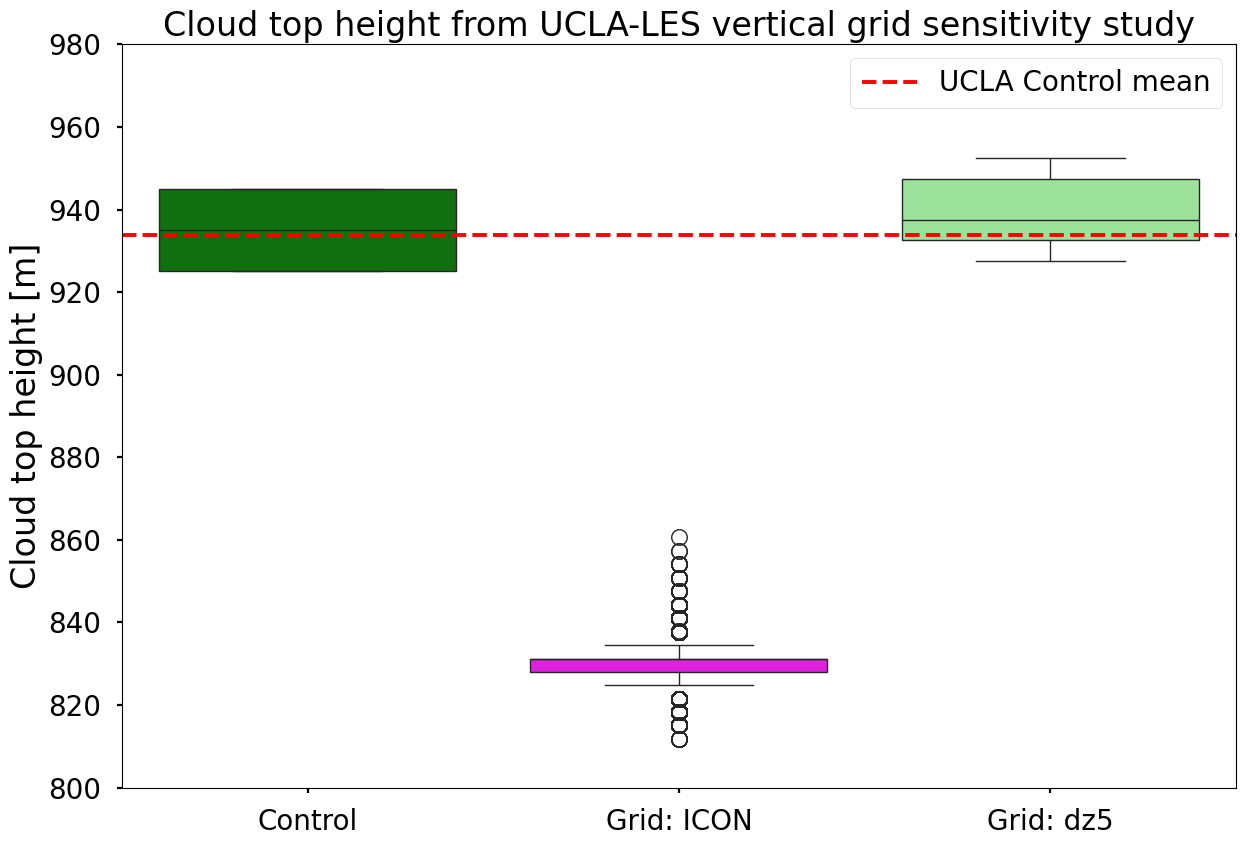

In [6]:
# Only CCN and DZ Cloud top heights:

####
# 2nd Plot: only UCLA

cloudtops_red = {"Control":cth_controle.values,\
                 "CCN-": cth_ccn_minus.values,\
             "CCN+": cth_ccn_plus.values}
plt.figure()
sns.boxplot(data=cloudtops_red, palette=["green","yellow",\
                                      "turquoise"]) #, ax = d[2])
plt.title('Cloud top height from UCLA-LES CCN sensitivity study', fontsize=24)
plt.ylim(910, 970)
plt.axhline(np.nanmean(cth_controle.values),color="red", linestyle="dashed", label="UCLA Control mean")
# plt.xlabel('Dataset') # give a label name to the x axis
plt.ylabel('Cloud top height [m]', fontsize=24) # give a label name to the x axis
plt.legend(fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.tight_layout()
plt.savefig(outputdir+"boxplot_cloudtops_CCN_sens.png")

####
# 2nd Plot: DZ

cloudtops_red = {"Control":cth_controle.values,\
 "Grid: ICON": cth_grid_icon.values, "Grid: dz5": cth_grid_dz5.values}
plt.figure() 
sns.boxplot(data=cloudtops_red, palette=["green",  "magenta", "lightgreen"]) #, ax = d[2])
plt.title('Cloud top height from UCLA-LES vertical grid sensitivity study', fontsize=24)
plt.ylim(800, 980)
plt.axhline(np.nanmean(cth_controle.values),color="red", linestyle="dashed", label="UCLA Control mean")
# plt.xlabel('Dataset') # give a label name to the x axis
plt.ylabel('Cloud top height [m]', fontsize=24)
plt.legend(fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.tight_layout()
plt.savefig(outputdir+"boxplot_cloudtops_DZ_sens.png")

##########################################################
# dz 5 statistics for table in thesis

# CTH:
print("CTH Control: mean", np.nanmean(cth_controle.values))
print("CTH ICON: mean", np.nanmean(cth_grid_icon.values))
print("CTH 5 m: mean", np.nanmean(cth_grid_dz5.values))
print("CTH Control std: ", np.std(cth_controle.values))
print("CTH ICON: std", np.std(cth_grid_icon.values))
print("CTH 5 m: std", np.std(cth_grid_dz5.values))
print("CTH Control median: ", np.median(cth_controle.values))
print("CTH ICON: median", np.median(cth_grid_icon.values))
print("CTH 5 m: median", np.median(cth_grid_dz5.values))

###
# LWP
print("LWP Control: mean", np.nanmean(controle_tsds["lwp_bar"].values / 1000))
print("LWP ICON: mean", np.nanmean(grid_icon_00_tsds["lwp_bar"].values / 1000))
print("LWP 5 m: mean", np.nanmean(grid5_00_tsds["lwp_bar"].values / 1000))
print("LWP Control std:", np.std(controle_tsds["lwp_bar"].values / 1000))
print("LWP ICON std:", np.std(grid_icon_00_tsds["lwp_bar"].values / 1000))
print("LWP 5 m std:", np.std(grid5_00_tsds["lwp_bar"].values / 1000))
print("LWP Control median:", np.median(controle_tsds["lwp_bar"].values / 1000))
print("LWP ICON median:", np.median(grid_icon_00_tsds["lwp_bar"].values / 1000))
print("LWP 5 m median:", np.median(grid5_00_tsds["lwp_bar"].values / 1000))

###
# Cloud base height:
print("Cloud Base Height Control: mean", np.nanmean(controle_tsds["zb"].values))
print("Cloud Base Height ICON: mean", np.nanmean(grid_icon_00_tsds["zb"].values))
print("Cloud Base Height 5 m: mean", np.nanmean(grid5_00_tsds["zb"].values))
print("Cloud Base Height Control std:", np.std(controle_tsds["zb"].values))
print("Cloud Base Height ICON std:", np.std(grid_icon_00_tsds["zb"].values))
print("Cloud Base Height 5 m std:", np.std(grid5_00_tsds["zb"].values))
print("Cloud Base Height Control median:", np.median(controle_tsds["zb"].values))
print("Cloud Base Height ICON median:", np.median(grid_icon_00_tsds["zb"].values))
print("Cloud Base Height 5 m median:", np.median(grid5_00_tsds["zb"].values))

###
# Cloud thickness h:
print("Cloud Thickness Control: mean", np.nanmean(cth_controle.values - controle_tsds["zb"].values))
print("Cloud Thickness ICON: mean", np.nanmean(cth_grid_icon.values - grid_icon_00_tsds["zb"].values))
print("Cloud Thickness 5 m: mean", np.nanmean(cth_grid_dz5.values - grid5_00_tsds["zb"].values))
print("Cloud Thickness Control std:", np.std(cth_controle.values - controle_tsds["zb"].values))
print("Cloud Thickness ICON std:", np.std(cth_grid_icon.values - grid_icon_00_tsds["zb"].values))
print("Cloud Thickness 5 m std:", np.std(cth_grid_dz5.values - grid5_00_tsds["zb"].values))
print("Cloud Thickness Control median:", np.median(cth_controle.values - controle_tsds["zb"].values))
print("Cloud Thickness ICON median:", np.median(cth_grid_icon.values - grid_icon_00_tsds["zb"].values))
print("Cloud Thickness 5 m median:", np.median(cth_grid_dz5.values - grid5_00_tsds["zb"].values))


remove_nans(ds_foghat_cloud22[clwvi].values mean:  0.07325974
controle_tsds[lwp].values/1000 mean:  0.07489796
cth_cloudnet.values mean:  958.104
cth_controle.values mean:  933.90173
cth_cloudnet.values std:  729.3621
cth_controle.values std:  7.874104
controle_tsds[zb].values mean:  611.1163
ds_class22[loud_base_height].isel(layer=0).values mean:  483.21515
cb std contr:  20.591722
cb std cloudnet:  115.814064


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


cloudnet_h.values mean:  474.88898
thickness mean:  322.78546
thickness std:  24.444311
cloudnet_h.values std:  738.32965


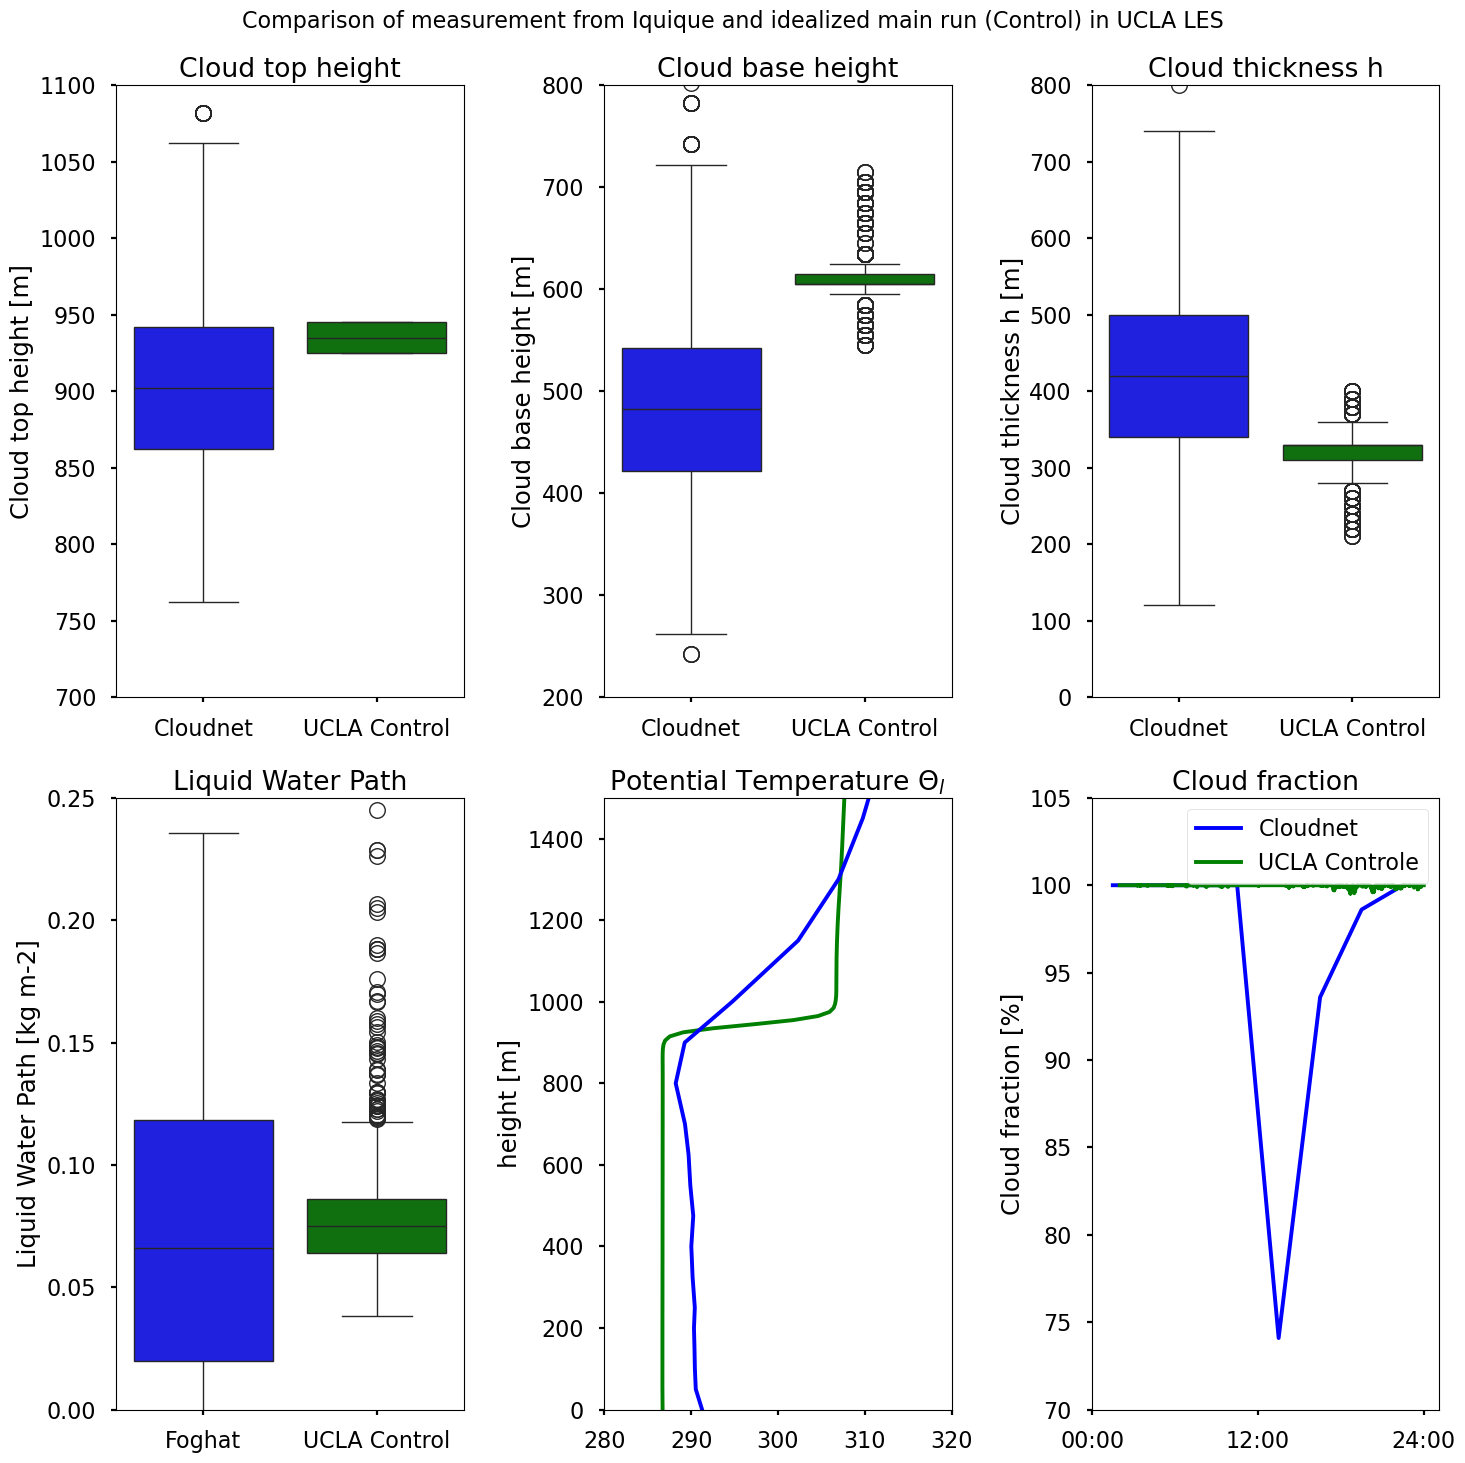

In [7]:
# Multipanel plot for relevance of Control run!

##############################################
# Single plots to choose from:

###
# 1st LWP => Calculate correlation, maybe have an LWP plot like for ICON
lwp_data2 = {"Foghat":remove_nans(ds_foghat_cloud22["clwvi"].values),"UCLA Control":remove_nans(controle_tsds["lwp_bar"].values/1000)}
# "ICON":remove_nans(lwp_icon.values)}
print("remove_nans(ds_foghat_cloud22[clwvi].values mean: ",np.nanmean(remove_nans(ds_foghat_cloud22["clwvi"].values)))
print("controle_tsds[lwp].values/1000 mean: ",np.nanmean(controle_tsds["lwp_bar"].values/1000))

plt.figure(figsize=(15,10))
plt.title("Liquid Water Path from Cloudnet at Iquique and UCLA LES Control run", fontsize=12) 
sns.boxplot(data=lwp_data2, palette=["blue", "green"]) #, ax = d[2])
plt.axhline(np.nanmean(controle_tsds["lwp_bar"].values/1000),color="red", linestyle="dashed", label="UCLA Control mean")
plt.ylabel("Liquid Water Path [kg m-2]", fontsize=12) 
plt.ylim(0,0.25)
plt.legend()
plt.tight_layout()
plt.close()

###
# 2nd Cloudtops => Calculate correlation, maybe have an LWP plot like for ICON
cloudtops2 = {"Cloudnet":cth_cloudnet.values, "UCLA Control":cth_controle.values}
print("cth_cloudnet.values mean: ",np.nanmean(cth_cloudnet.values))
print("cth_controle.values mean: ",np.nanmean(cth_controle.values))
print("cth_cloudnet.values std: ",np.nanstd(cth_cloudnet.values))
print("cth_controle.values std: ",np.nanstd(cth_controle.values))
# "ICON":cth_icon}
plt.figure(figsize=(15,10))
sns.boxplot(data=cloudtops2, palette=["blue", "green"])
plt.title('Cloud top height from Cloudnet in Iquique and UCLA LES Control run')
plt.ylim(700, 1100)
plt.axhline(np.nanmean(cth_controle.values),color="red", linestyle="dashed", label="UCLA Control mean")
# plt.xlabel('Dataset') # give a label name to the x axis
plt.ylabel('Cloud top height [m]', fontsize=12) 
plt.legend()
plt.tight_layout()
plt.close()

###
# 3rd Focs? => Calculate correlation, maybe have an LWP plot like for ICON

###
# 4th temperature profile; Richardson profile? XXX

###
# pbl height??? other measure?

###
# cloudbase:
cloudbases2 = {"Cloudnet":ds_class22["cloud_base_height"].isel(layer=0).values, "UCLA Control":controle_tsds["zb"].values}
print("controle_tsds[zb].values mean: ",np.nanmean(controle_tsds["zb"].values))
print("ds_class22[loud_base_height].isel(layer=0).values mean: ",np.nanmean(ds_class22["cloud_base_height"].isel(layer=0).values))
print("cb std contr: ",np.nanstd(controle_tsds["zb"].values))
print("cb std cloudnet: ",np.nanstd(ds_class22["cloud_base_height"].isel(layer=0).values))
plt.figure(figsize=(15,10))
sns.boxplot(data=cloudbases2, palette=["blue", "green"])
plt.title('Cloud base height from Cloudnet in Iquique and UCLA LES Control run')
plt.ylim(200, 800)
# plt.axhline(np.nanmean(cth_controle.values),color="red", linestyle="dashed", label="UCLA Control mean")
# plt.xlabel('Dataset') # give a label name to the x axis
plt.ylabel('Cloud base height [m]', fontsize=12) 
plt.legend()
# plt.tight_layout()
plt.close()

###
# Cloud thickness h:
cloudnet_h = ds_class22["cloud_top_height"].isel(layer=0) - ds_class22["cloud_base_height"].isel(layer=0)
cloud_thickness2 = {"Cloudnet":cloudnet_h.values, "UCLA Control":(controle_tsds["zc"].values-controle_tsds["zb"].values)}
print("cloudnet_h.values mean: ",np.nanmean(cloudnet_h.values))
print("thickness mean: ",np.nanmean((controle_tsds["zc"].values-controle_tsds["zb"].values)))
print("thickness std: ",np.nanstd((controle_tsds["zc"].values-controle_tsds["zb"].values)))
print("cloudnet_h.values std: ",np.nanstd(cloudnet_h.values))
plt.figure(figsize=(15,10))
sns.boxplot(data=cloud_thickness2, palette=["blue", "green"])
plt.title('Cloud thickness h from Cloudnet in Iquique and UCLA LES Control run')
plt.ylim(0, 800)
plt.ylabel('Cloud thickness h [m]', fontsize=12) 
plt.legend()
plt.close()

#############################################
# Four panel:
fig, axs = plt.subplots(2,3, figsize=(15, 15))
plt.suptitle("Comparison of measurement from Iquique and idealized main run (Control) in UCLA LES", fontsize=16)

# 1st Panel cloudtops:
sns.boxplot(data=cloudtops2, palette=["blue", "green"] , ax=axs[0,0])
axs[0,0].set_ylim(700, 1100)
axs[0,0].set_ylabel('Cloud top height [m]') 
axs[0,0].set_title('Cloud top height')

# 2nd Panel LWP:
sns.boxplot(data=lwp_data2, palette=["blue", "green"], ax=axs[1,0])
axs[1,0].set_ylim(0, 0.25)
axs[1,0].set_ylabel("Liquid Water Path [kg m-2]")
axs[1,0].set_title("Liquid Water Path")

# 3rd Panel:
sns.boxplot(data=cloudbases2, palette=["blue", "green"], ax=axs[0,1])
axs[0,1].set_ylim(200, 800)
axs[0,1].set_ylabel('Cloud base height [m]')
axs[0,1].set_title("Cloud base height")

# 4th panel:
sns.boxplot(data=cloud_thickness2, palette=["blue", "green"], ax=axs[0,2])
axs[0,2].set_ylim(0, 800)
axs[0,2].set_ylabel("Cloud thickness h [m]")
axs[0,2].set_title("Cloud thickness h")

# 5th panel:
axs[1,1].plot(controle_psds["t"].mean("time").values, controle_psds["zt"].values, color="green", label="UCLA LES Controle")
axs[1,1].plot(ds_theta_v4["theta_l"].mean("time").values, ds_theta_v4["height"].values, color="blue", label="Foghat")
axs[1,1].set_ylim(0,1500)
axs[1,1].set_xlim(280,320)
axs[1,1].set_ylabel("height [m]")
axs[1,1].set_title("Potential Temperature $\Theta_l$")

# 6th panel:
focs_cloudnet = [100.0, 100.0, 100.0, 100.0, 74.09470752, 93.59331476, 98.60724234, 100.0] 
                 #100.0, 100.0, 100.0, 100.0, 100.0, 22.22222222, 98.32402235, 100.0]
dates = [np.datetime64('2018-08-22T01:30:00'), np.datetime64('2018-08-22T04:30:00'), np.datetime64('2018-08-22T07:30:00'),\
         np.datetime64('2018-08-22T10:30:00'), np.datetime64('2018-08-22T13:30:00'), np.datetime64('2018-08-22T16:30:00'),\
         np.datetime64('2018-08-22T19:30:00'), np.datetime64('2018-08-22T22:30:00')]
         #, np.datetime64('2018-08-23T01:30:00'),\
         #np.datetime64('2018-08-23T04:30:00'), np.datetime64('2018-08-23T07:30:00'), np.datetime64('2018-08-23T10:30:00'),\
         #np.datetime64('2018-08-23T13:30:00'), np.datetime64('2018-08-23T16:30:00'), np.datetime64('2018-08-23T19:30:00'),\
         #np.datetime64('2018-08-23T22:30:00')]
axs[1,2].plot(dates, focs_cloudnet, color="blue", label="Cloudnet")
axs[1,2].plot(controle_time, controle_tsds["cfrac"].values*100, color="green", label="UCLA Controle")
axs[1,2].set_ylim(70,105)
axs[1,2].set_xticks([np.datetime64('2018-08-22T00:00:00'), np.datetime64('2018-08-22T12:00:00'), np.datetime64('2018-08-23T00:00:00')],
                   ["00:00", "12:00", "24:00"])
axs[1,2].set_title("Cloud fraction")
axs[1,2].set_ylabel("Cloud fraction [%]")
axs[1,2].legend()

plt.tight_layout()
plt.savefig(outputdir+"Control_and_Cloudnet_multipanel.png")



SST-Sensitivität:  0.006980625396184208  kg m-2 K-1
SST-Sensitivität:  10.060594584359023 m K-1


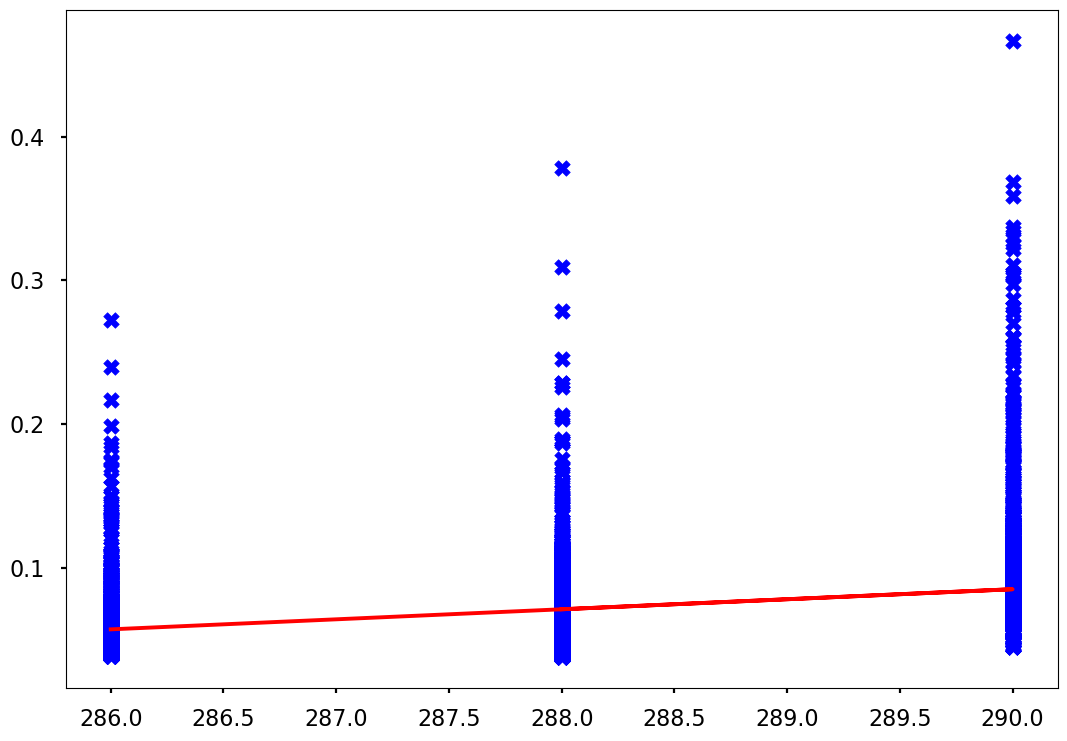

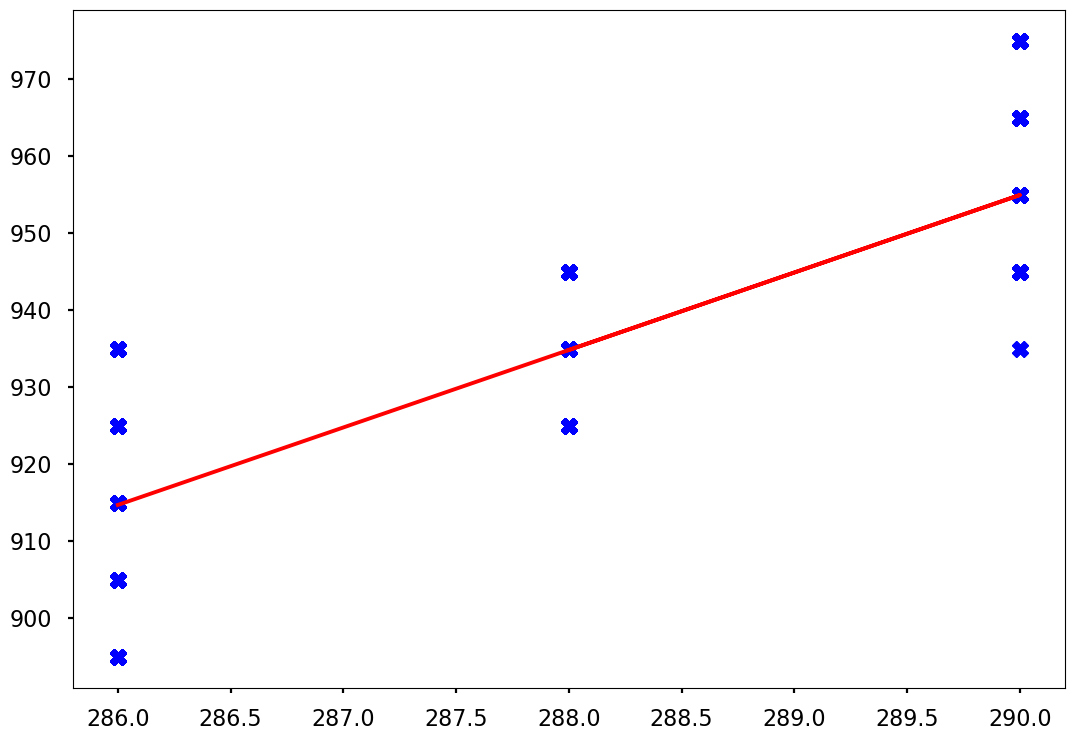

In [8]:
# Quantifiziere die Änderung in LWP und zi basierend auf SST:
# dzi/dsst; dLwp/dsst
###############################################################################

def calculate_covariance(array_1, array_2):
    if len(array_1)!=len(array_2):
        print("Arrays haven’t got same dimensions: covariance calculation failed!")
        return 1
    mean_1 = np.nanmean(array_1)
    mean_2 = np.nanmean(array_2)
    summe = 0
    numel = 0
    for i in range(len(array_1)):
        if not(np.isnan(array_1[i]) or np.isnan(array_2[i])):
            summe = summe+(array_1[i]-mean_1)*(array_2[i]-mean_2)
            numel = numel+1
    covariance = summe/(numel-1)
    if np.isnan(covariance):
        covariance=0
    return covariance
    
###############################################################################
def calculate_regression_linear(array_1, array_2):
    #See that array_1 is the x-value for this regression...
    a = calculate_covariance(array_1, array_2)/calculate_covariance(\
    array_1, array_1)
    b = np.nanmean(array_2)-a*np.nanmean(array_1)
    regression_plot = np.zeros(len(array_1))
    for i in range(len(regression_plot)):
        regression_plot[i] = a * array_1[i] + b
    return regression_plot, a

###############################################################################


lwp_data = {"Foghat":remove_nans(ds_foghat_cloud22["clwvi"].values), "ICON":remove_nans(lwp_icon.values),\
             "UCLA Control":remove_nans(controle_tsds["lwp_bar"].values/1000),\
             "UCLA SST +2 K":remove_nans(sstplus_tsds["lwp_bar"].values/1000),\
                                         "UCLA SST -2 K":remove_nans(sst_minus_tsds["lwp_bar"].values/1000)}
cloudtops = {"Cloudnet":cth_cloudnet.values, "ICON":cth_icon, "UCLA Control":cth_controle.values,\
             "UCLA SST +2 K":cth_plus.values, "UCLA SST -2 K":cth_minus.values}

###
# LWP(SST):
lwps = result_array = np.concatenate((lwp_data["UCLA Control"], lwp_data["UCLA SST +2 K"], lwp_data["UCLA SST -2 K"]))
ssts = np.concatenate((np.array([288]*len(lwp_data["UCLA Control"])), np.array([290]*len(lwp_data["UCLA SST +2 K"])),\
                       np.array([286]*len(lwp_data["UCLA SST -2 K"]))))
regression_plot, a_lwp = calculate_regression_linear(ssts, lwps)
print("SST-Sensitivität: ",a_lwp, " kg m-2 K-1")
plt.plot(ssts, regression_plot, color="red")
plt.scatter(ssts, lwps, color="blue", marker="X")

###
# CTH(SST):
cths = result_array = np.concatenate((cloudtops["UCLA Control"], cloudtops["UCLA SST +2 K"], cloudtops["UCLA SST -2 K"]))
regression_plot, a_cth = calculate_regression_linear(ssts, cths)
print("SST-Sensitivität: ",a_cth, "m K-1")
plt.figure()
plt.plot(ssts, regression_plot, color="red")
plt.scatter(ssts, cths, color="blue", marker="X")

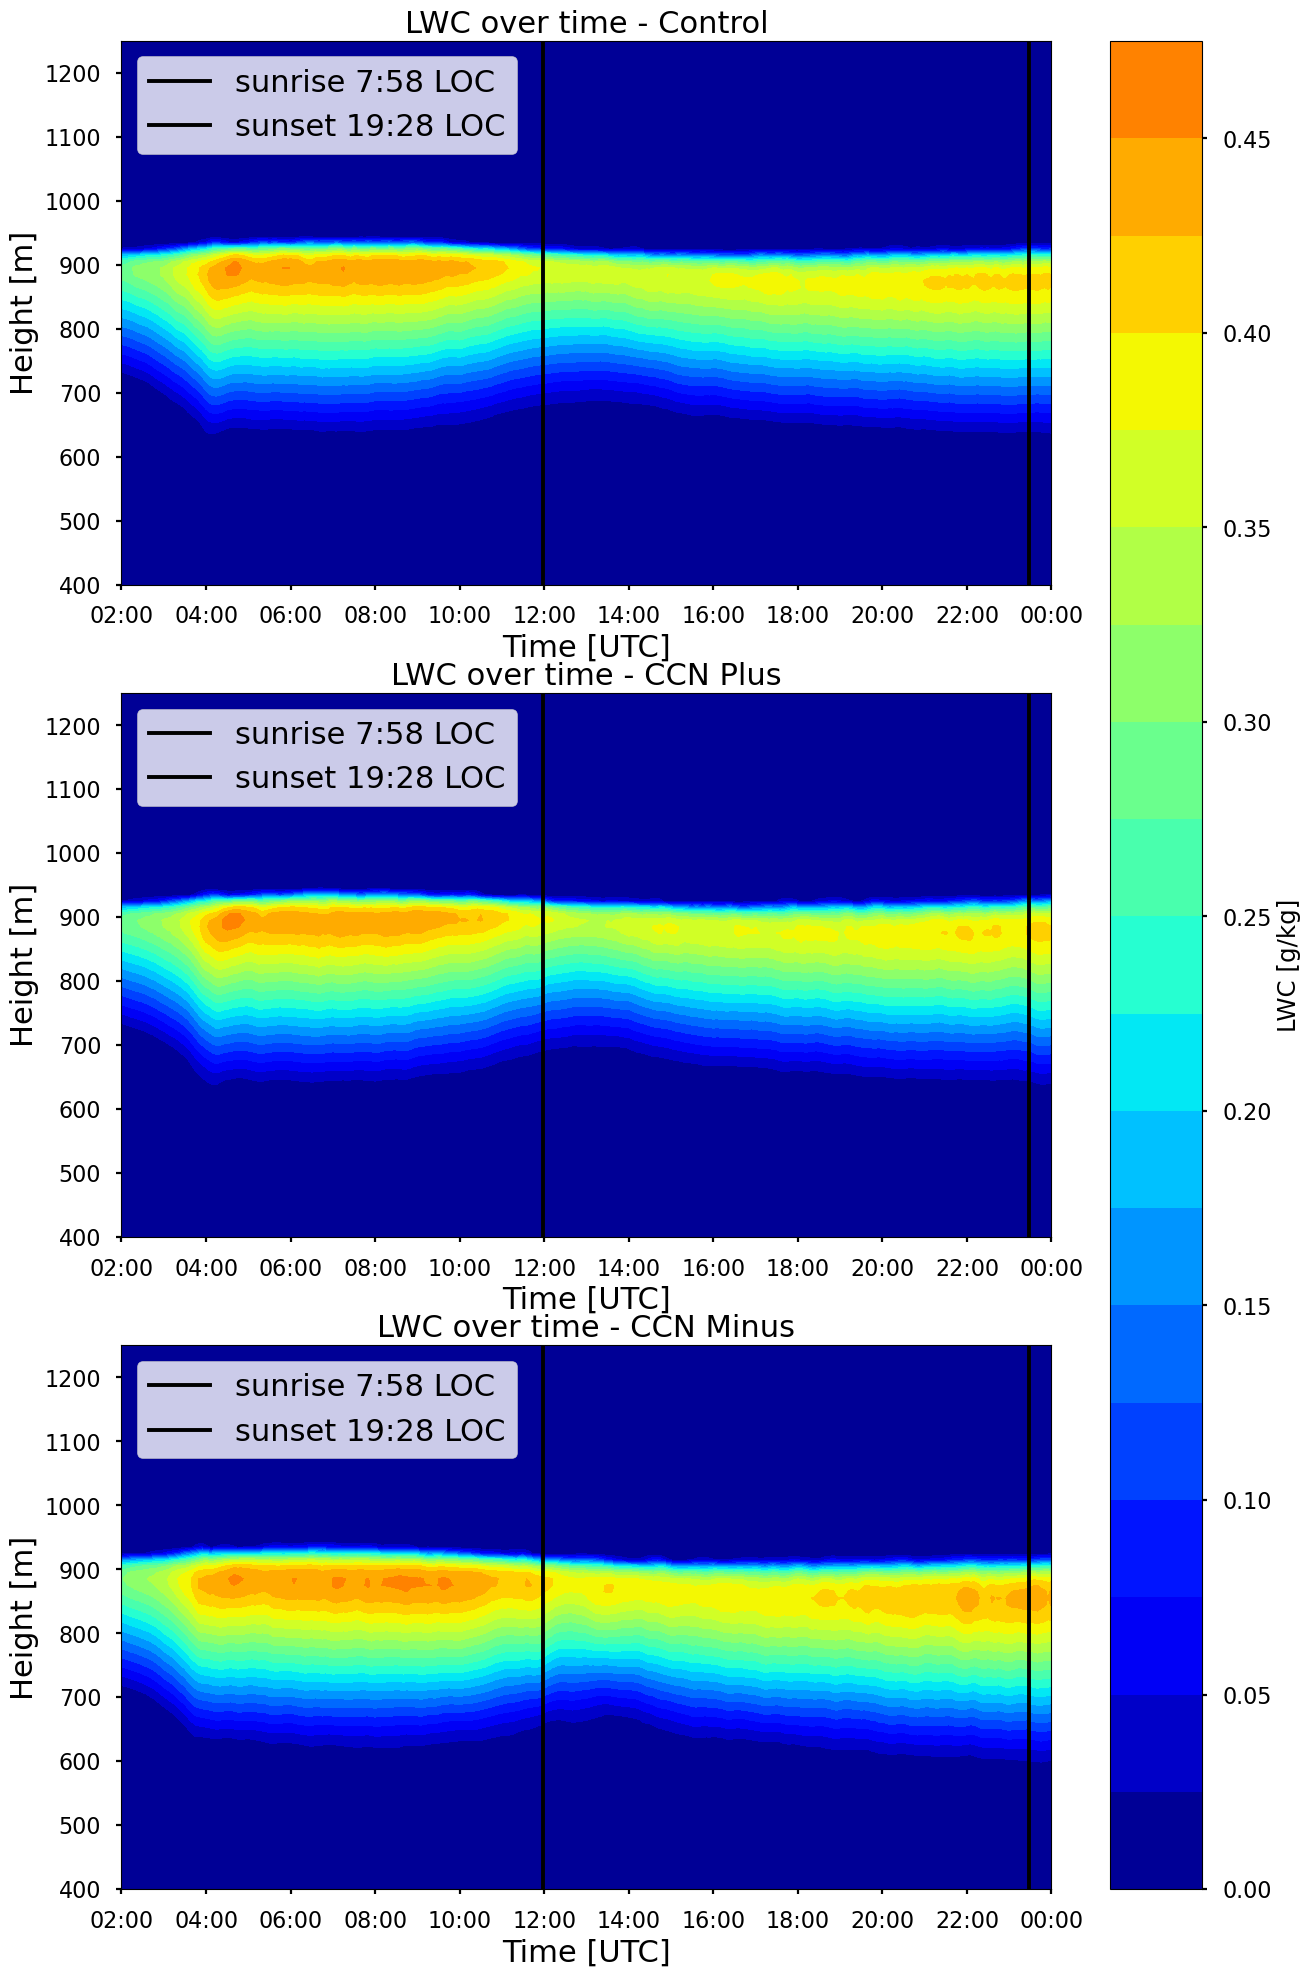

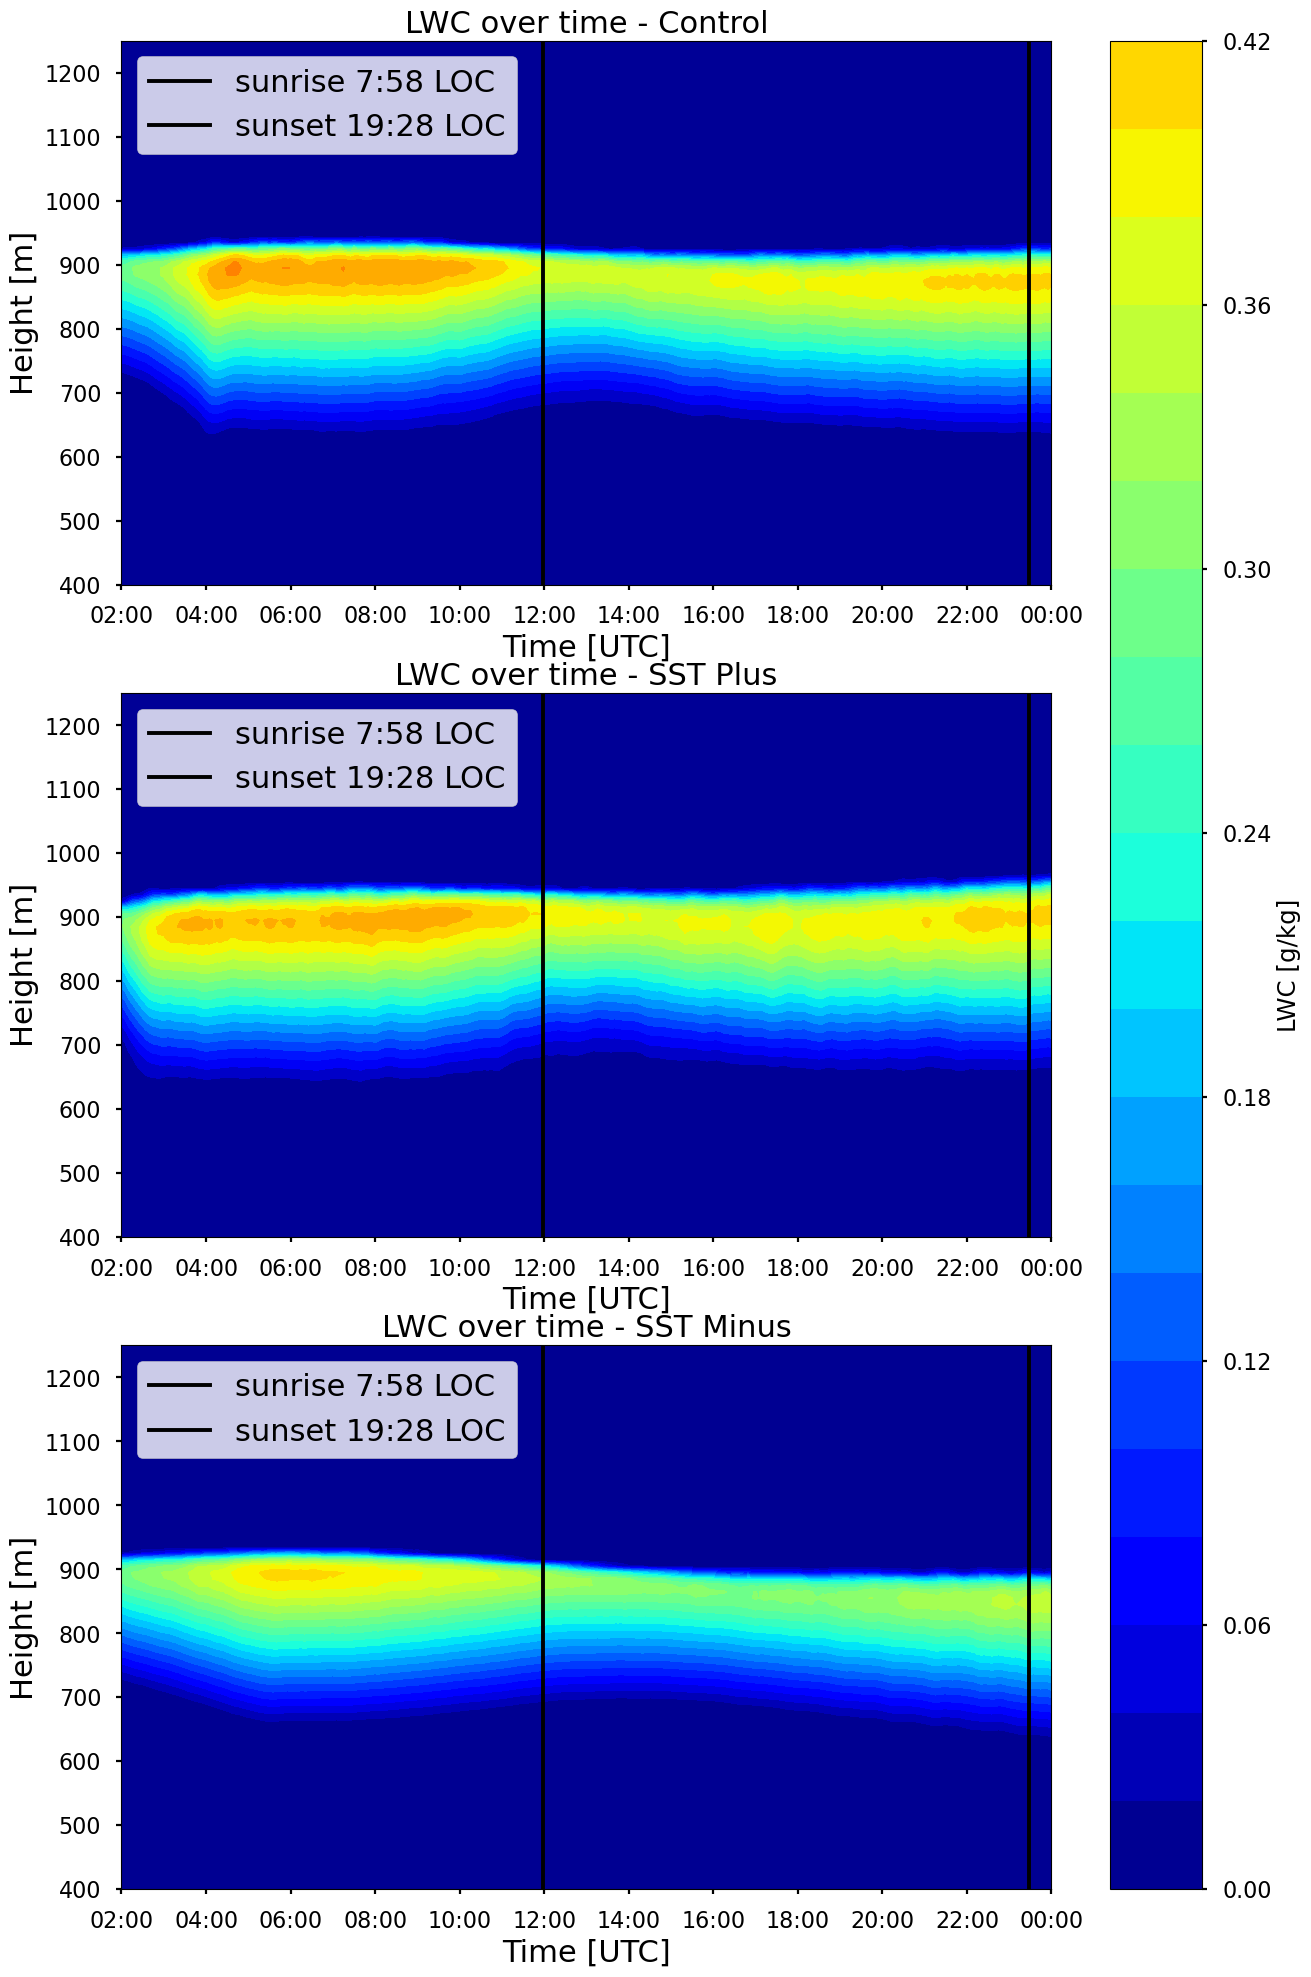

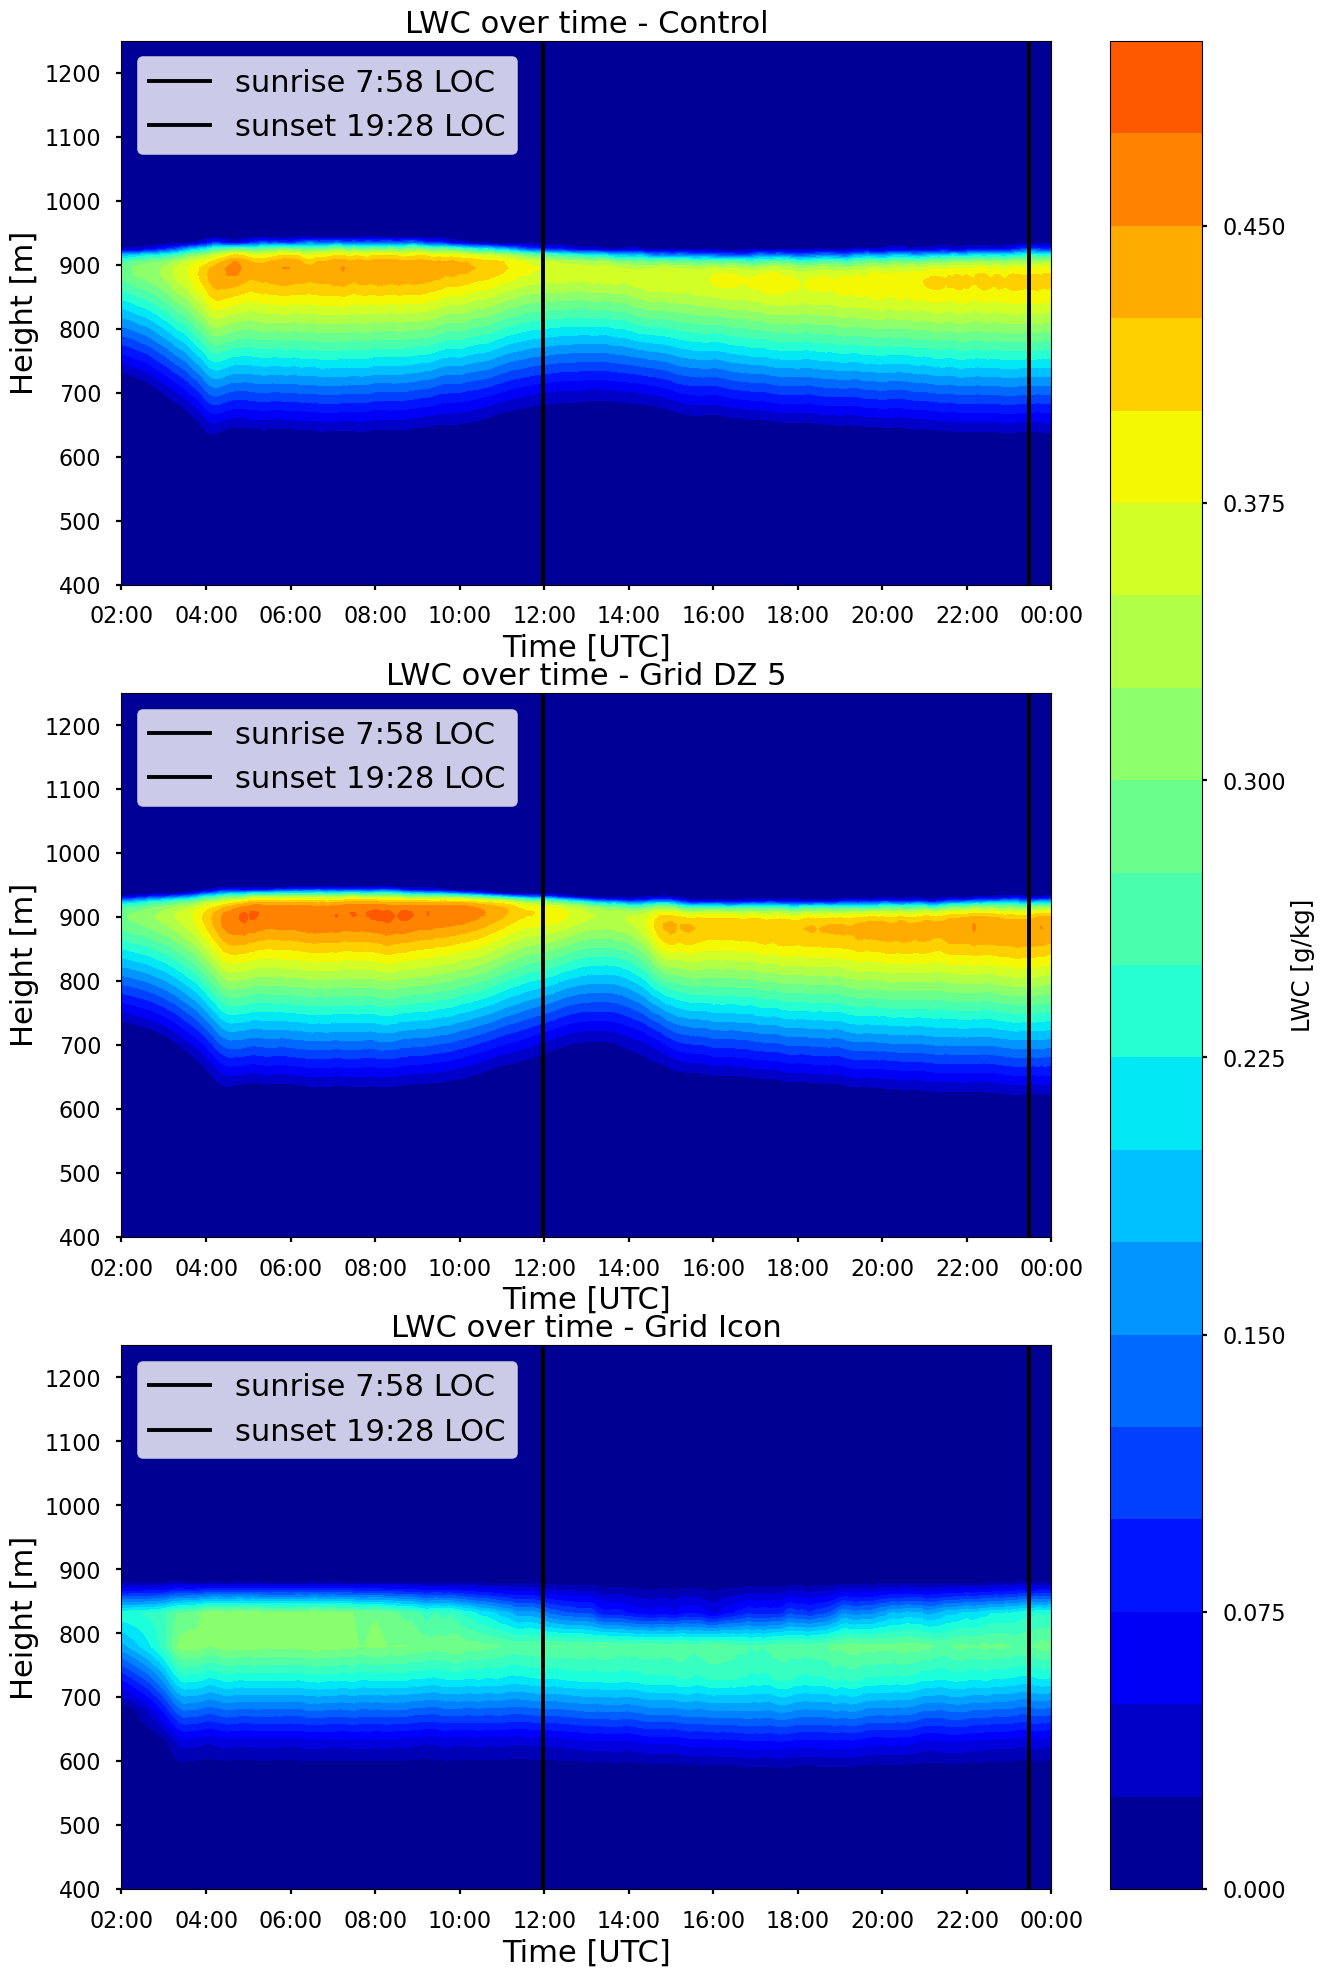

In [9]:
# Plot Funktion
def plot_lwc_over_time(ax, ps_ds, name):
    ucla_times = ucla_time2useful_time(ps_ds["time"].values)
    c = ax.contourf(ucla_times, ps_ds["zt"], ps_ds["l"].T, levels=20, vmin=0, vmax=0.6, cmap="jet")
    ax.set_ylim(400, 1250)
    ax.set_ylabel("Height [m]", fontsize=22)
    ax.set_title("LWC over time - " + name, fontsize=22)
    ax.xaxis.set_major_formatter(myFmt)
    ax.axvline(np.datetime64("2018-08-22T11:58:00"), color="black",label="sunrise 7:58 LOC")
    ax.axvline(np.datetime64("2018-08-22T23:28:00"), color="black",label="sunset 19:28 LOC")
    ax.legend(fontsize=22)
    return c

# Plotten der Multi-Panel Plots

# 1. Figure: controle, ccn plus, ccn minus
fig1, axes1 = plt.subplots(3, 1, figsize=(15, 24))

plot_lwc_over_time(axes1[0], controle_psds, "Control")
plot_lwc_over_time(axes1[1], ds_ccn_plus, "CCN Plus")
c1 = plot_lwc_over_time(axes1[2], ds_ccn_minus, "CCN Minus")
fig1.colorbar(c1, ax=axes1[:], label="LWC [g/kg]")

for ax in axes1:
    ax.set_xlabel("Time [UTC]", fontsize=22)

#plt.tight_layout()
plt.savefig(outputdir + "MultiPanel_LWC_Plots_CCNP.png")
plt.show()

# 2. Figure: controle, sst plus, sst minus
fig2, axes2 = plt.subplots(3, 1, figsize=(15, 24))

plot_lwc_over_time(axes2[0], controle_psds, "Control")
plot_lwc_over_time(axes2[1], sstplus_psds, "SST Plus")
c2 = plot_lwc_over_time(axes2[2], sst_minus_psds, "SST Minus")
fig2.colorbar(c2, ax=axes2[:], label="LWC [g/kg]")

for ax in axes2:
    ax.set_xlabel("Time [UTC]", fontsize=22)

#plt.tight_layout()
plt.savefig(outputdir + "MultiPanel_LWC_Plots_SST.png")
plt.show()

# 3. Figure: controle, grid dz 5, grid icon
fig3, axes3 = plt.subplots(3, 1, figsize=(15, 24))

plot_lwc_over_time(axes3[0], controle_psds, "Control")
c3 = plot_lwc_over_time(axes3[1], grid5_00_psds, "Grid DZ 5")
plot_lwc_over_time(axes3[2], grid_icon_00_psds, "Grid Icon")
fig3.colorbar(c3, ax=axes3[:], label="LWC [g/kg]")

for ax in axes3:
    ax.set_xlabel("Time [UTC]", fontsize=22)

#plt.tight_layout()
plt.savefig(outputdir + "MultiPanel_LWC_Plots_GRID.png")
plt.show()

#########################
# Make x labels beautiful

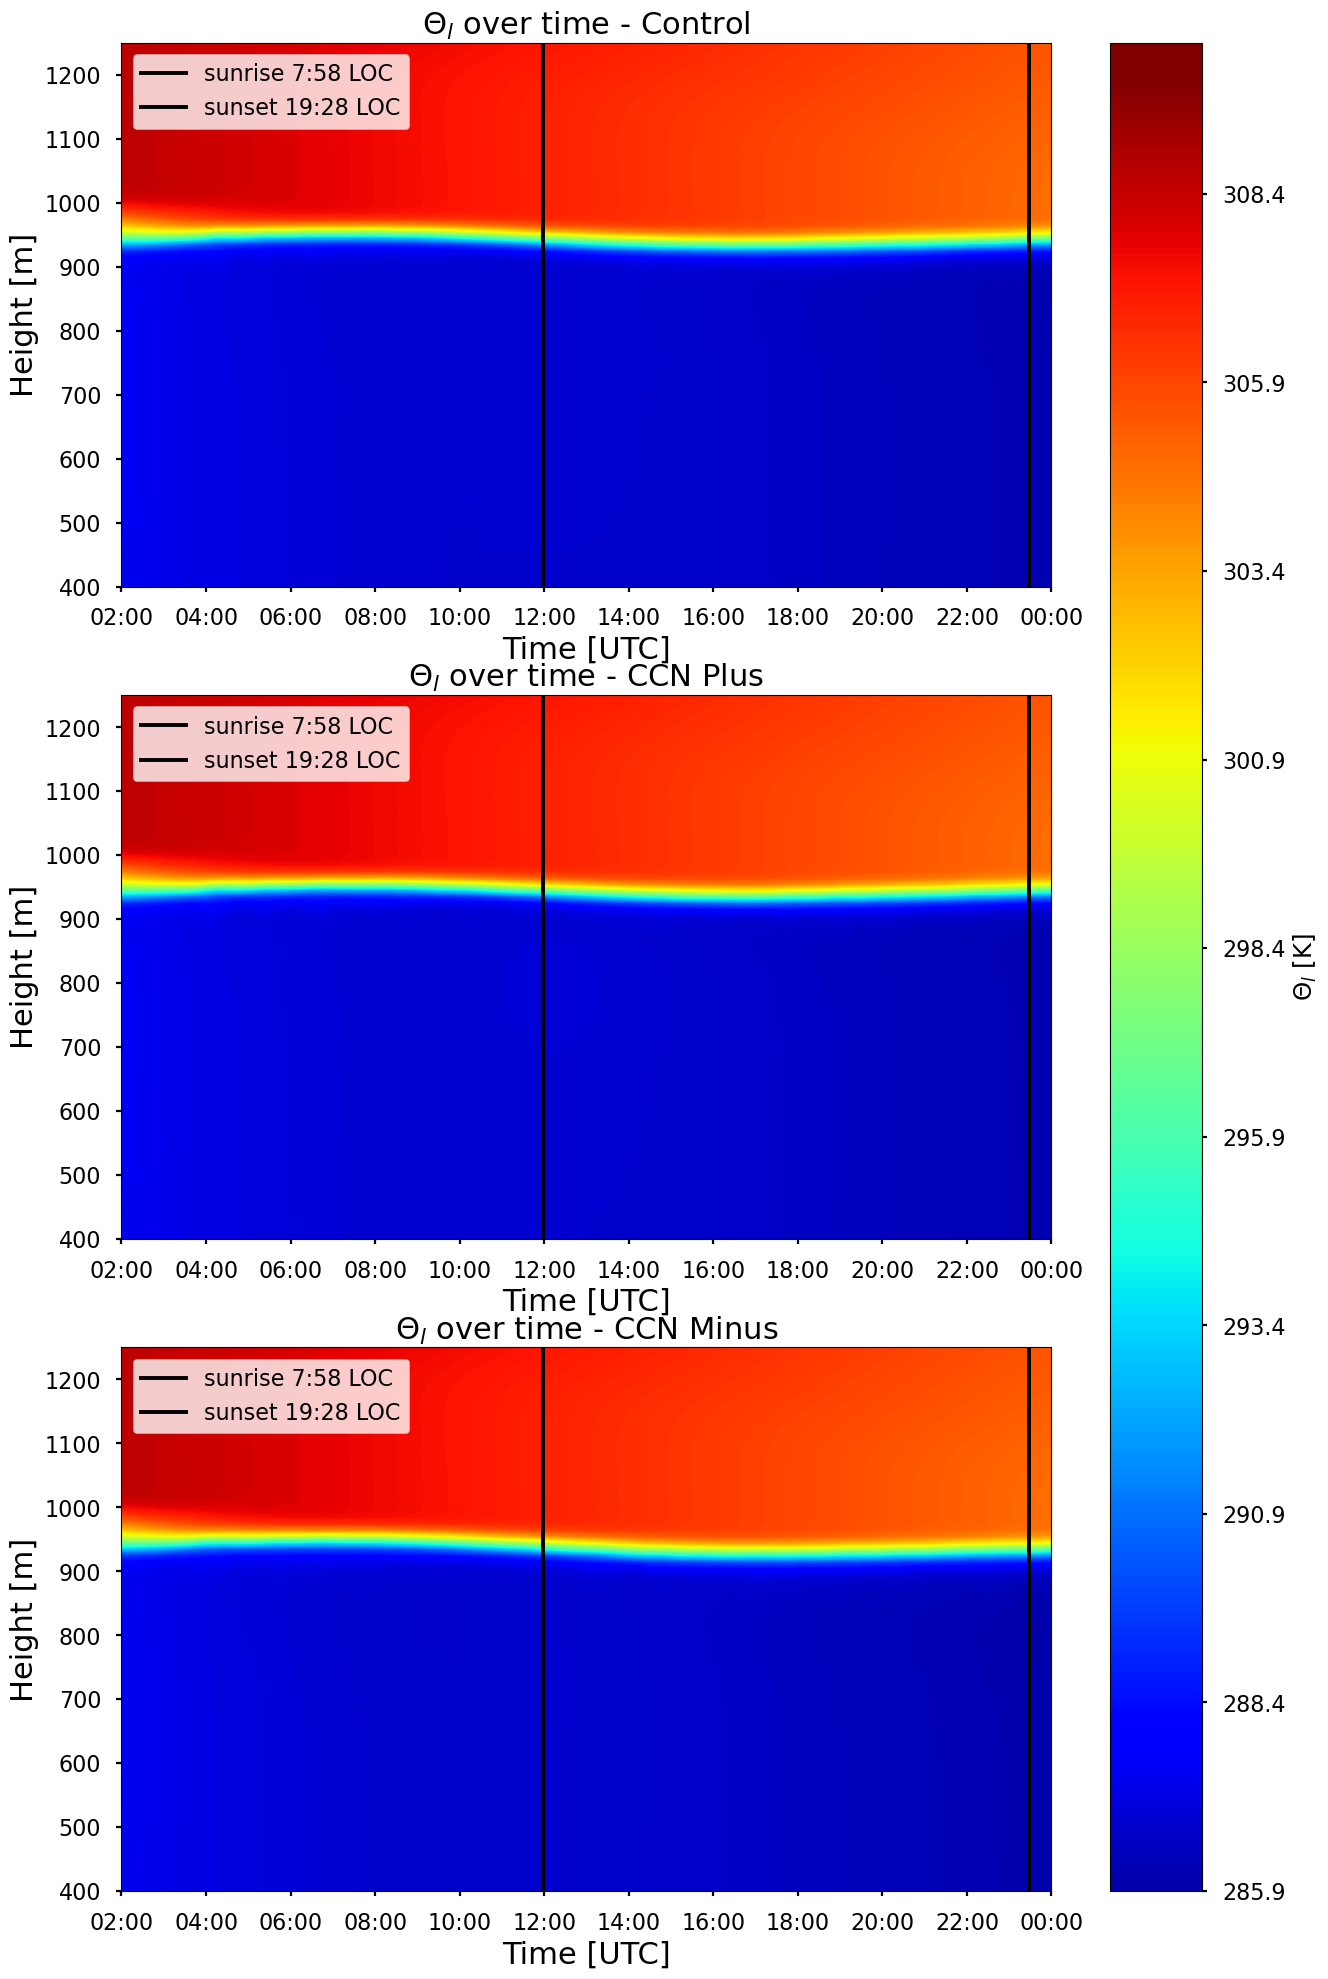

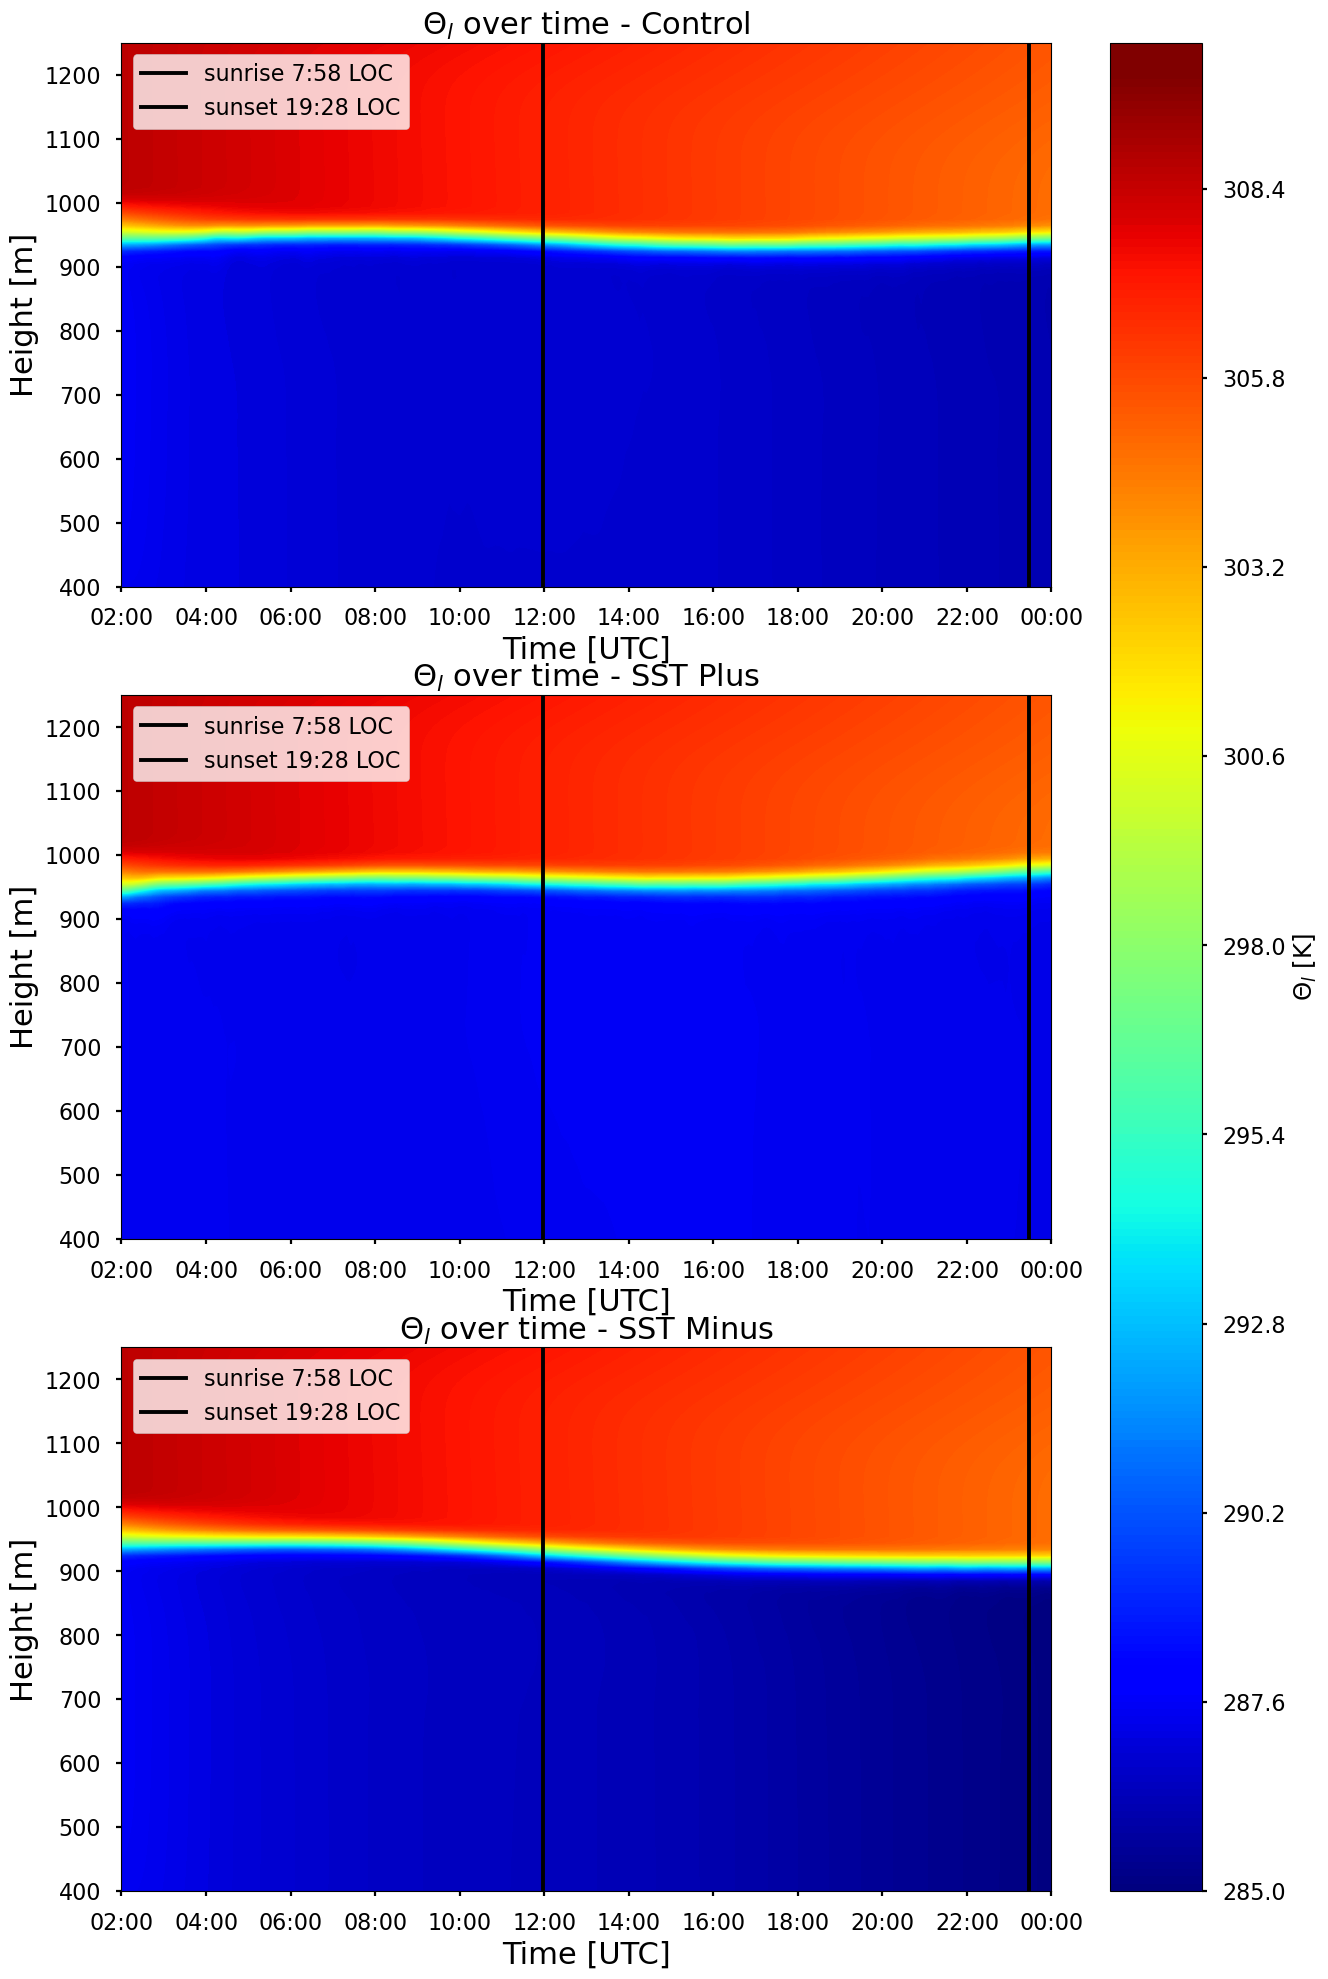

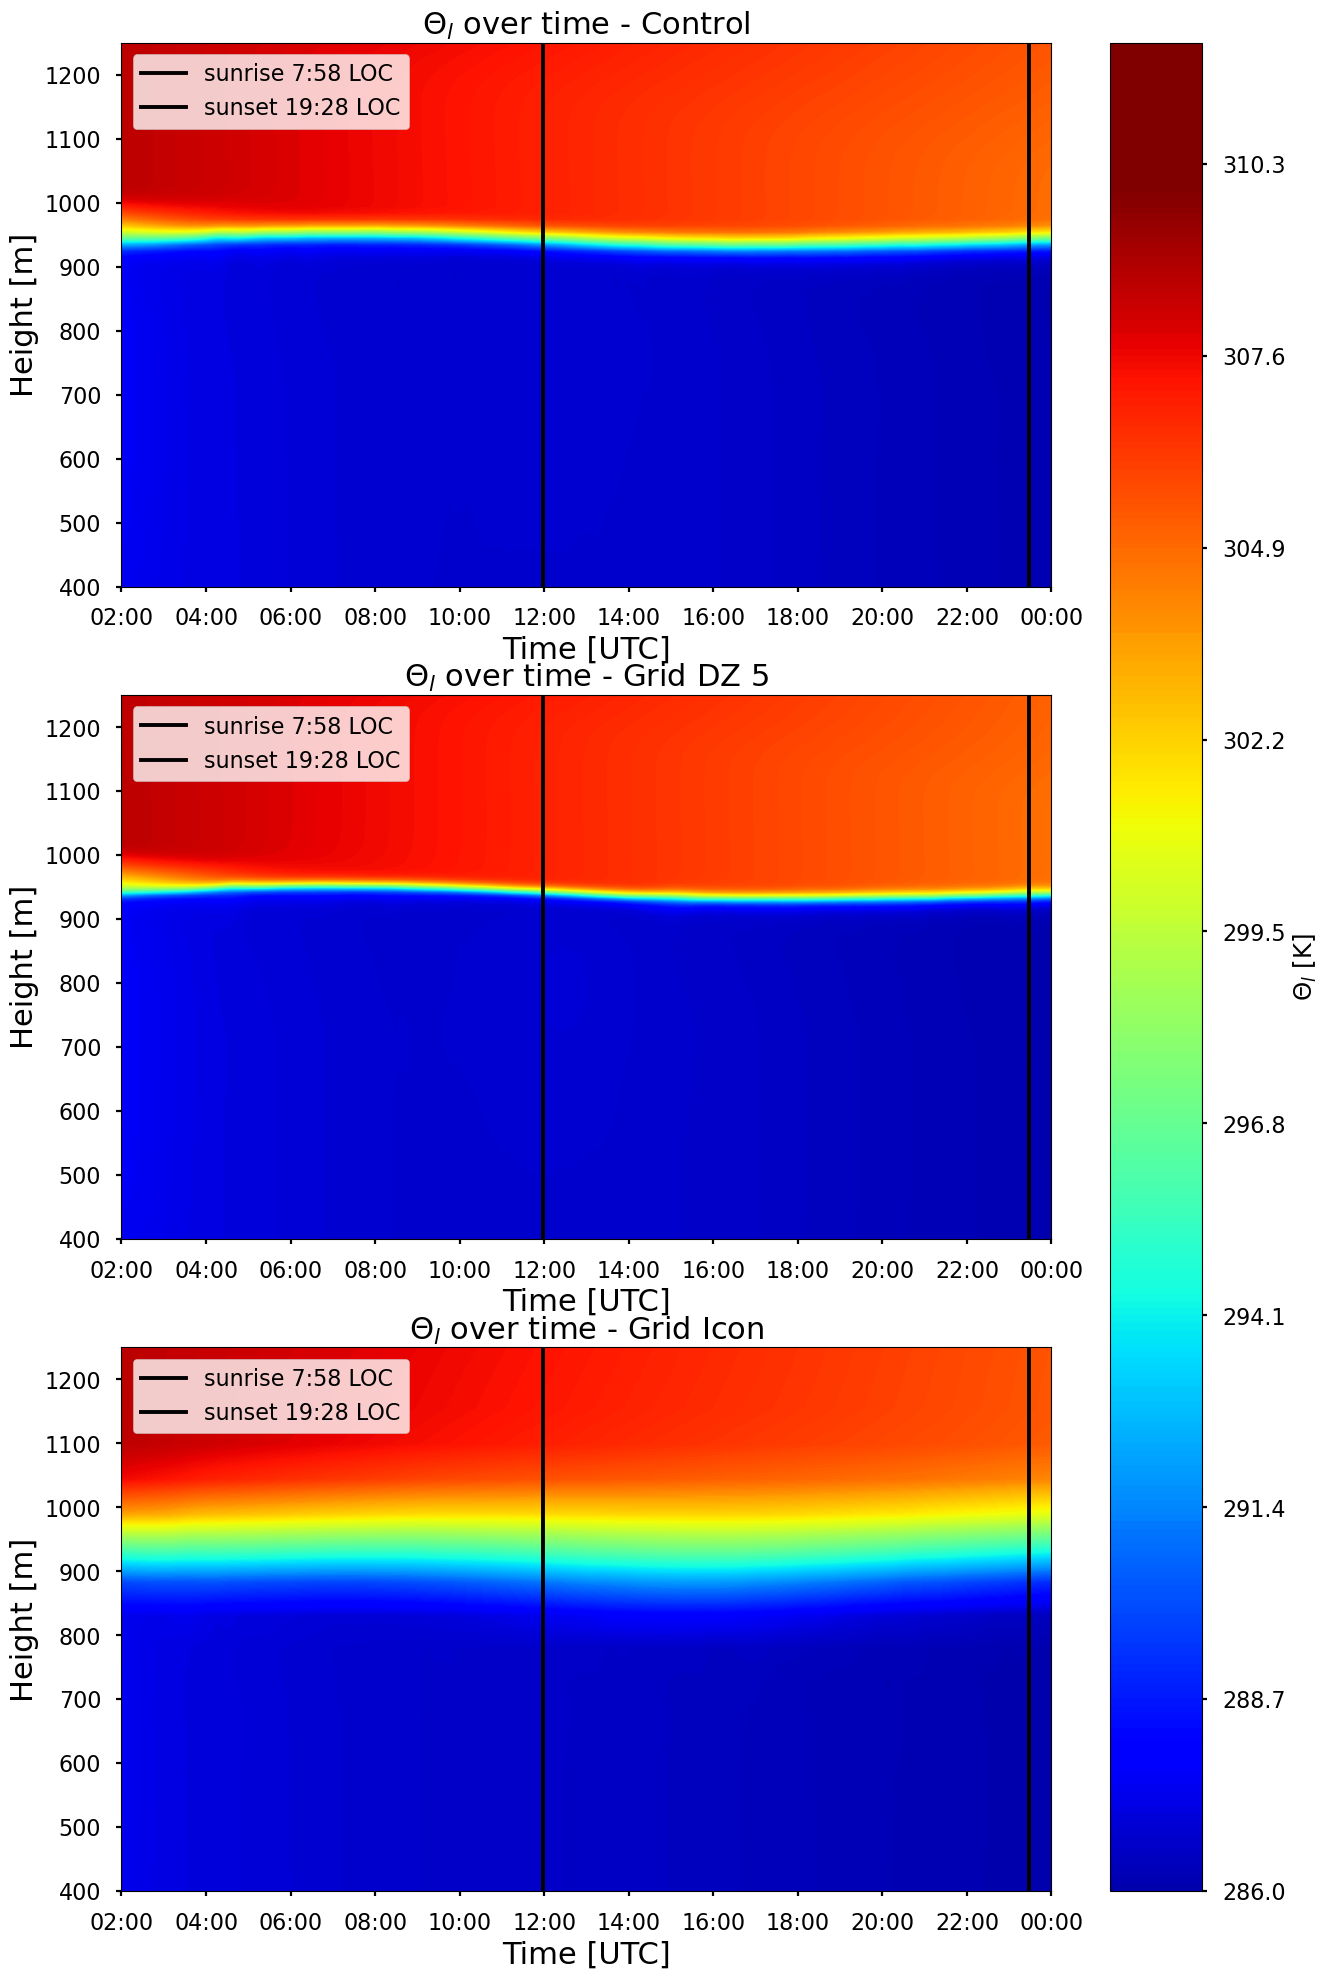

In [10]:
# Theta_l

# Plot Funktion
def plot_lwc_over_time(ax, ps_ds, name):
    ucla_times = ucla_time2useful_time(ps_ds["time"].values)
    c = ax.contourf(ucla_times, ps_ds["zt"], ps_ds["t"].T, levels=280, cmap="jet", vmin=285, vmax=310)
    ax.set_ylim(400, 1250)
    ax.set_ylabel("Height [m]", fontsize=22)
    ax.set_title("$\Theta_l$ over time - " + name, fontsize=22)
    ax.xaxis.set_major_formatter(myFmt)
    ax.axvline(np.datetime64("2018-08-22T11:58:00"), color="black",label="sunrise 7:58 LOC")
    ax.axvline(np.datetime64("2018-08-22T23:28:00"), color="black",label="sunset 19:28 LOC")
    ax.legend()
    return c

# Plotten der Multi-Panel Plots

# 1. Figure: controle, ccn plus, ccn minus
fig1, axes1 = plt.subplots(3, 1, figsize=(15, 24))

plot_lwc_over_time(axes1[0], controle_psds, "Control")
plot_lwc_over_time(axes1[1], ds_ccn_plus, "CCN Plus")
c1 = plot_lwc_over_time(axes1[2], ds_ccn_minus, "CCN Minus")
fig1.colorbar(c1, ax=axes1[:], label="$\Theta_l$ [K]")

for ax in axes1:
    ax.set_xlabel("Time [UTC]", fontsize=22)

#plt.tight_layout()
plt.savefig(outputdir + "MultiPanel_Theta_l_Plots_CCNP.png")
plt.show()

# 2. Figure: controle, sst plus, sst minus
fig2, axes2 = plt.subplots(3, 1, figsize=(15, 24))

plot_lwc_over_time(axes2[0], controle_psds, "Control")
plot_lwc_over_time(axes2[1], sstplus_psds, "SST Plus")
c2 = plot_lwc_over_time(axes2[2], sst_minus_psds, "SST Minus")
fig2.colorbar(c2, ax=axes2[:], label="$\Theta_l$ [K]")

for ax in axes2:
    ax.set_xlabel("Time [UTC]", fontsize=22)

#plt.tight_layout()
plt.savefig(outputdir + "MultiPanel_Theta_l_Plots_SST.png")
plt.show()

# 3. Figure: controle, grid dz 5, grid icon
fig3, axes3 = plt.subplots(3, 1, figsize=(15, 24))

plot_lwc_over_time(axes3[0], controle_psds, "Control")
plot_lwc_over_time(axes3[1], grid5_00_psds, "Grid DZ 5")
c3 = plot_lwc_over_time(axes3[2], grid_icon_00_psds, "Grid Icon")
fig3.colorbar(c3, ax=axes3[:], label="$\Theta_l$ [K]")

for ax in axes3:
    ax.set_xlabel("Time [UTC]", fontsize=22)

#plt.tight_layout()
plt.savefig(outputdir + "MultiPanel_Theta_l_Plots_GRID.png")
plt.show()

#########################
# Make x labels beautiful

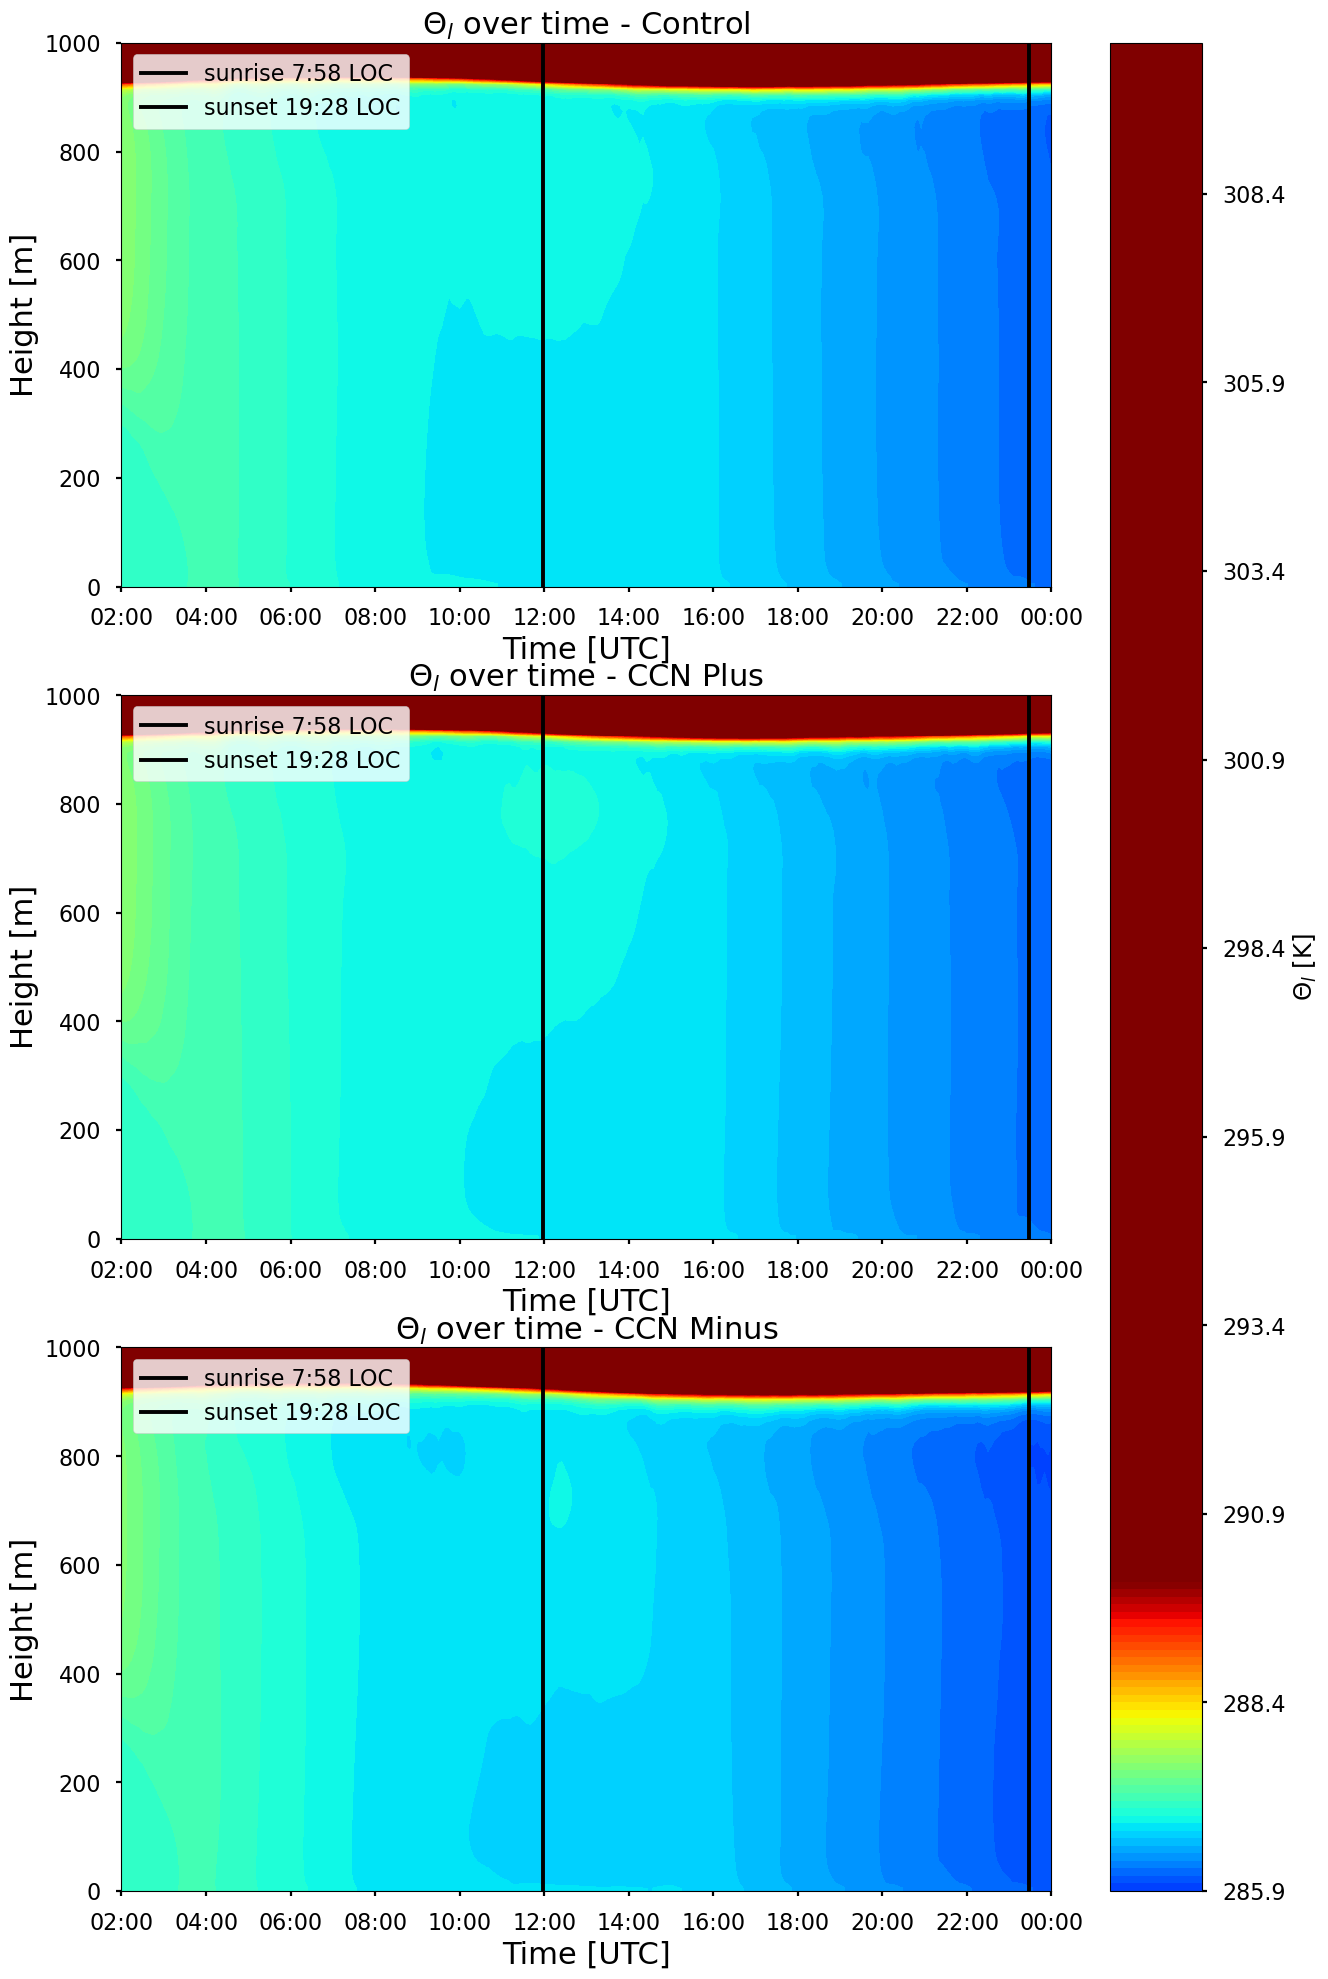

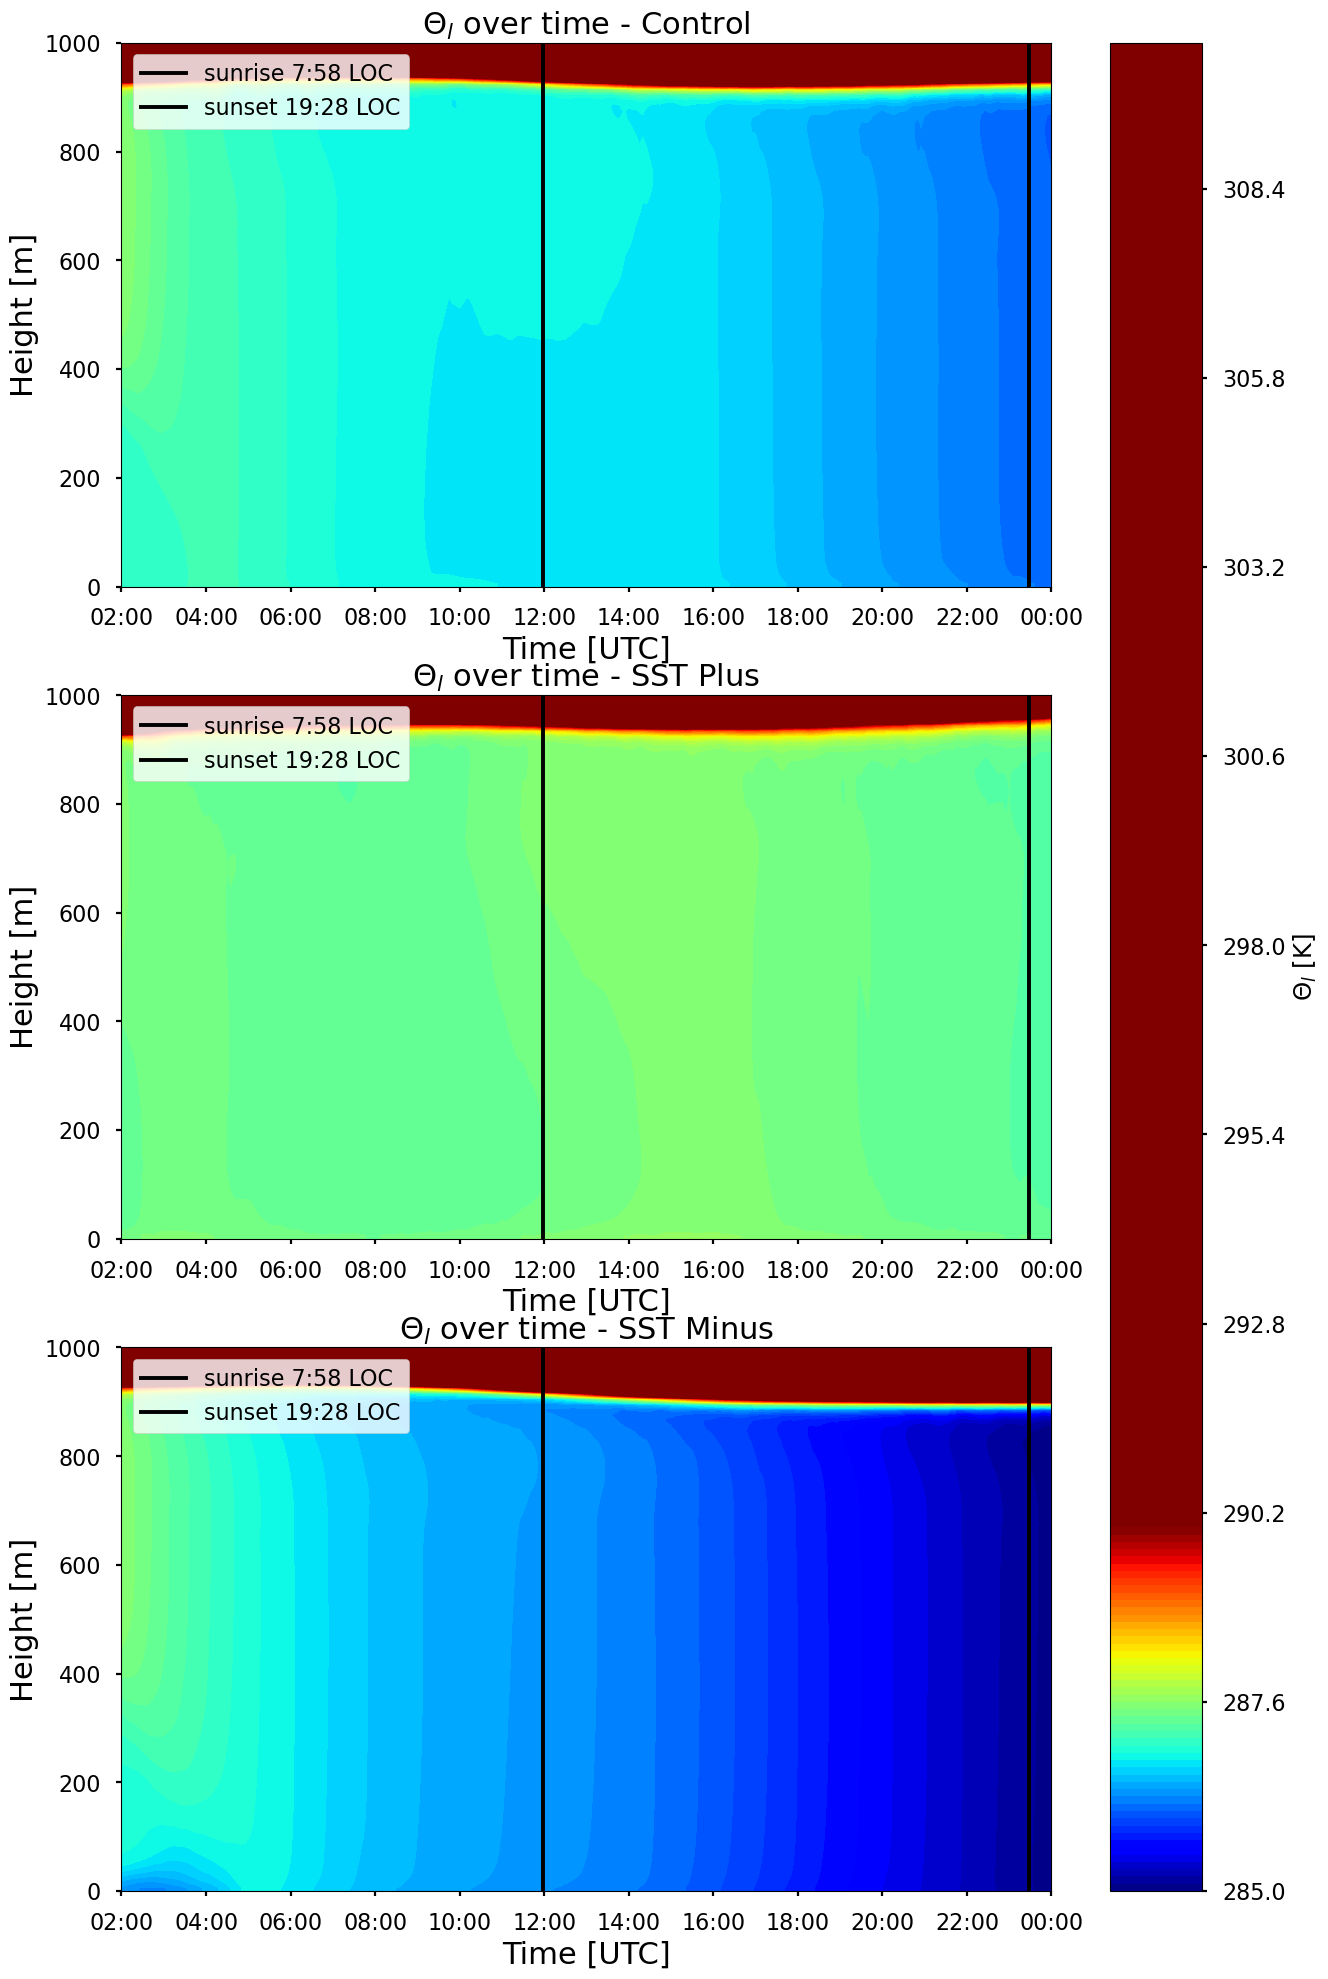

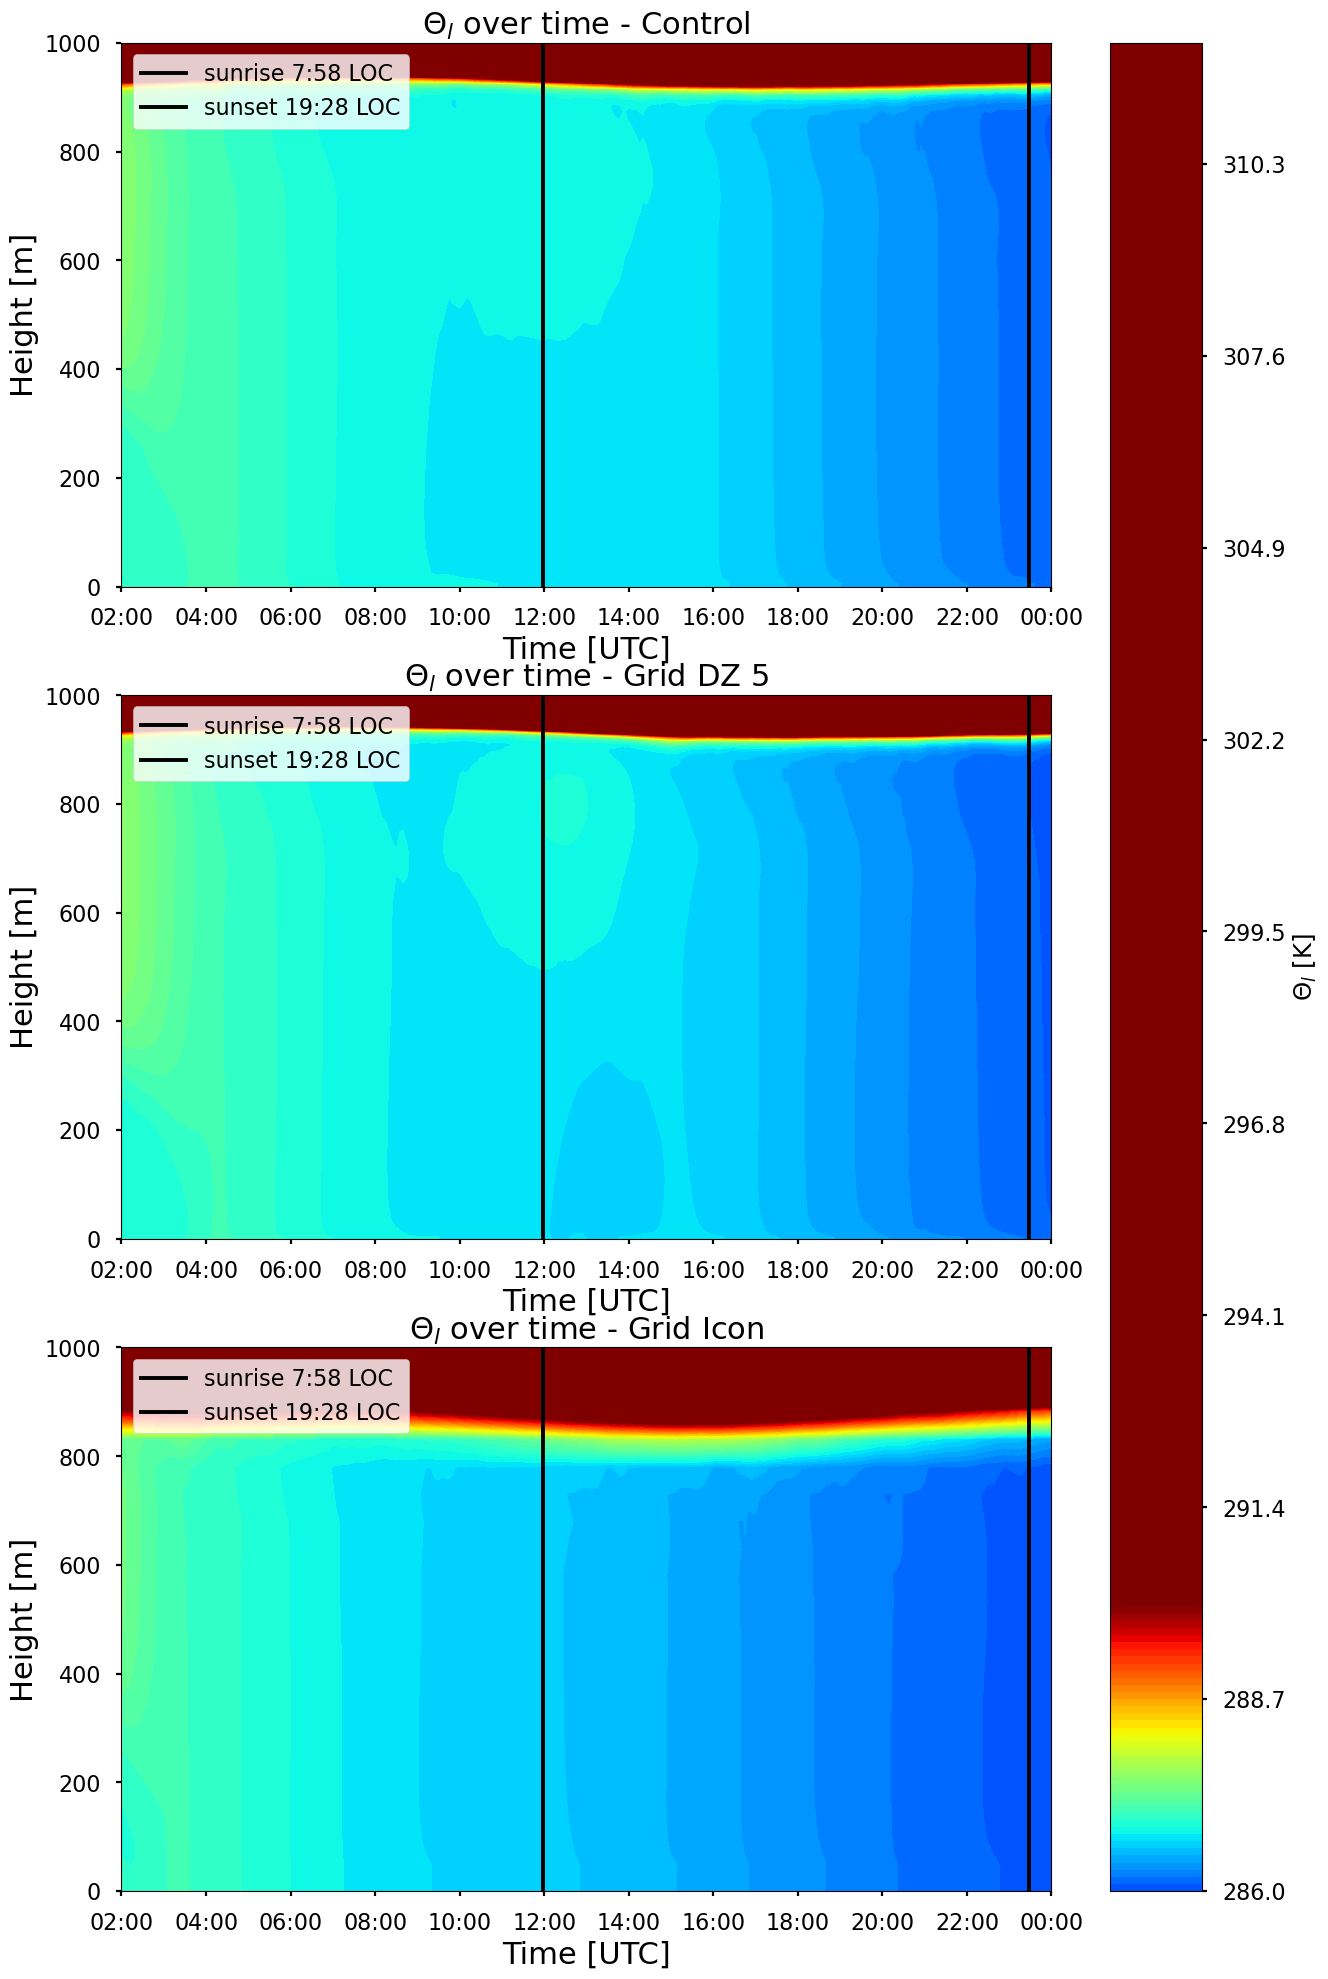

In [11]:
# Theta_l BOUNDARY LAYER HIGHLY RESOLVED!

# Plot Funktion
def plot_lwc_over_time(ax, ps_ds, name):
    ucla_times = ucla_time2useful_time(ps_ds["time"].values)
    c = ax.contourf(ucla_times, ps_ds["zt"], ps_ds["t"].T, levels=280, cmap="jet", vmin=285, vmax=290)
    ax.set_ylim(0, 1000)
    ax.set_ylabel("Height [m]", fontsize=22)
    ax.set_title("$\Theta_l$ over time - " + name, fontsize=22)
    ax.xaxis.set_major_formatter(myFmt)
    ax.axvline(np.datetime64("2018-08-22T11:58:00"), color="black",label="sunrise 7:58 LOC")
    ax.axvline(np.datetime64("2018-08-22T23:28:00"), color="black",label="sunset 19:28 LOC")
    ax.legend()
    return c

# Plotten der Multi-Panel Plots

# 1. Figure: controle, ccn plus, ccn minus
fig1, axes1 = plt.subplots(3, 1, figsize=(15, 24))

plot_lwc_over_time(axes1[0], controle_psds, "Control")
plot_lwc_over_time(axes1[1], ds_ccn_plus, "CCN Plus")
c1 = plot_lwc_over_time(axes1[2], ds_ccn_minus, "CCN Minus")
fig1.colorbar(c1, ax=axes1[:], label="$\Theta_l$ [K]", extend="neither") 

for ax in axes1:
    ax.set_xlabel("Time [UTC]", fontsize=22)

#plt.tight_layout()
plt.savefig(outputdir + "BL_MultiPanel_Theta_l_Plots_CCNP.png")
plt.show()

# 2. Figure: controle, sst plus, sst minus
fig2, axes2 = plt.subplots(3, 1, figsize=(15, 24))

plot_lwc_over_time(axes2[0], controle_psds, "Control")
plot_lwc_over_time(axes2[1], sstplus_psds, "SST Plus")
c2 = plot_lwc_over_time(axes2[2], sst_minus_psds, "SST Minus")
fig2.colorbar(c2, ax=axes2[:], label="$\Theta_l$ [K]", extend="neither") 

for ax in axes2:
    ax.set_xlabel("Time [UTC]", fontsize=22)

#plt.tight_layout()
plt.savefig(outputdir + "BL_MultiPanel_Theta_l_Plots_SST.png")
plt.show()

# 3. Figure: controle, grid dz 5, grid icon
fig3, axes3 = plt.subplots(3, 1, figsize=(15, 24))

plot_lwc_over_time(axes3[0], controle_psds, "Control")
plot_lwc_over_time(axes3[1], grid5_00_psds, "Grid DZ 5")
c3 = plot_lwc_over_time(axes3[2], grid_icon_00_psds, "Grid Icon")
fig3.colorbar(c3, ax=axes3[:], label="$\Theta_l$ [K]", extend="neither") 

for ax in axes3:
    ax.set_xlabel("Time [UTC]", fontsize=22)

#plt.tight_layout()
plt.savefig(outputdir + "BL_MultiPanel_Theta_l_Plots_GRID.png")
plt.show()

#########################
# Make x labels beautiful

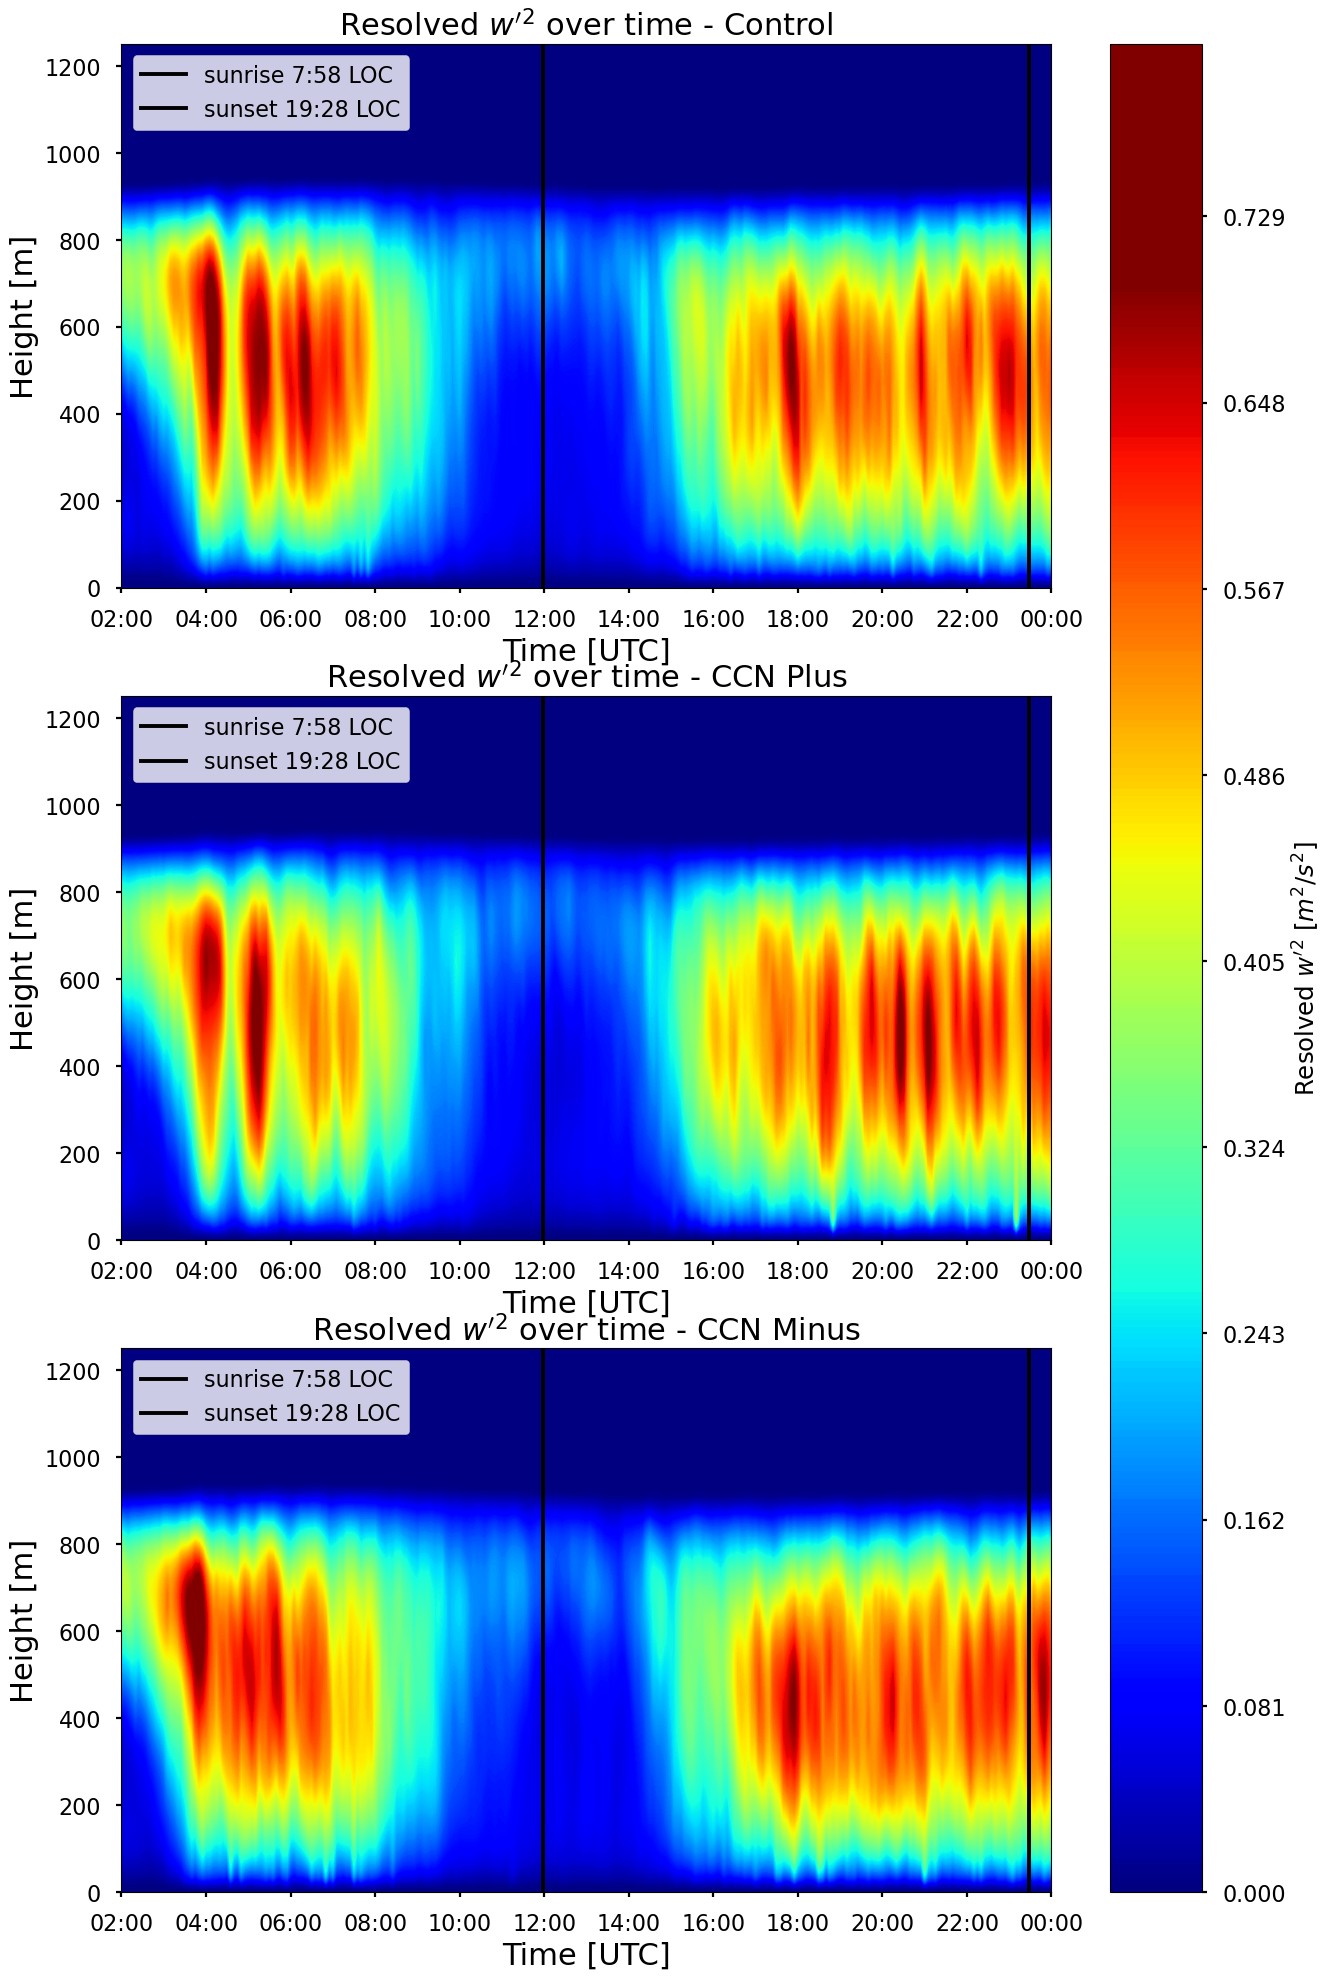

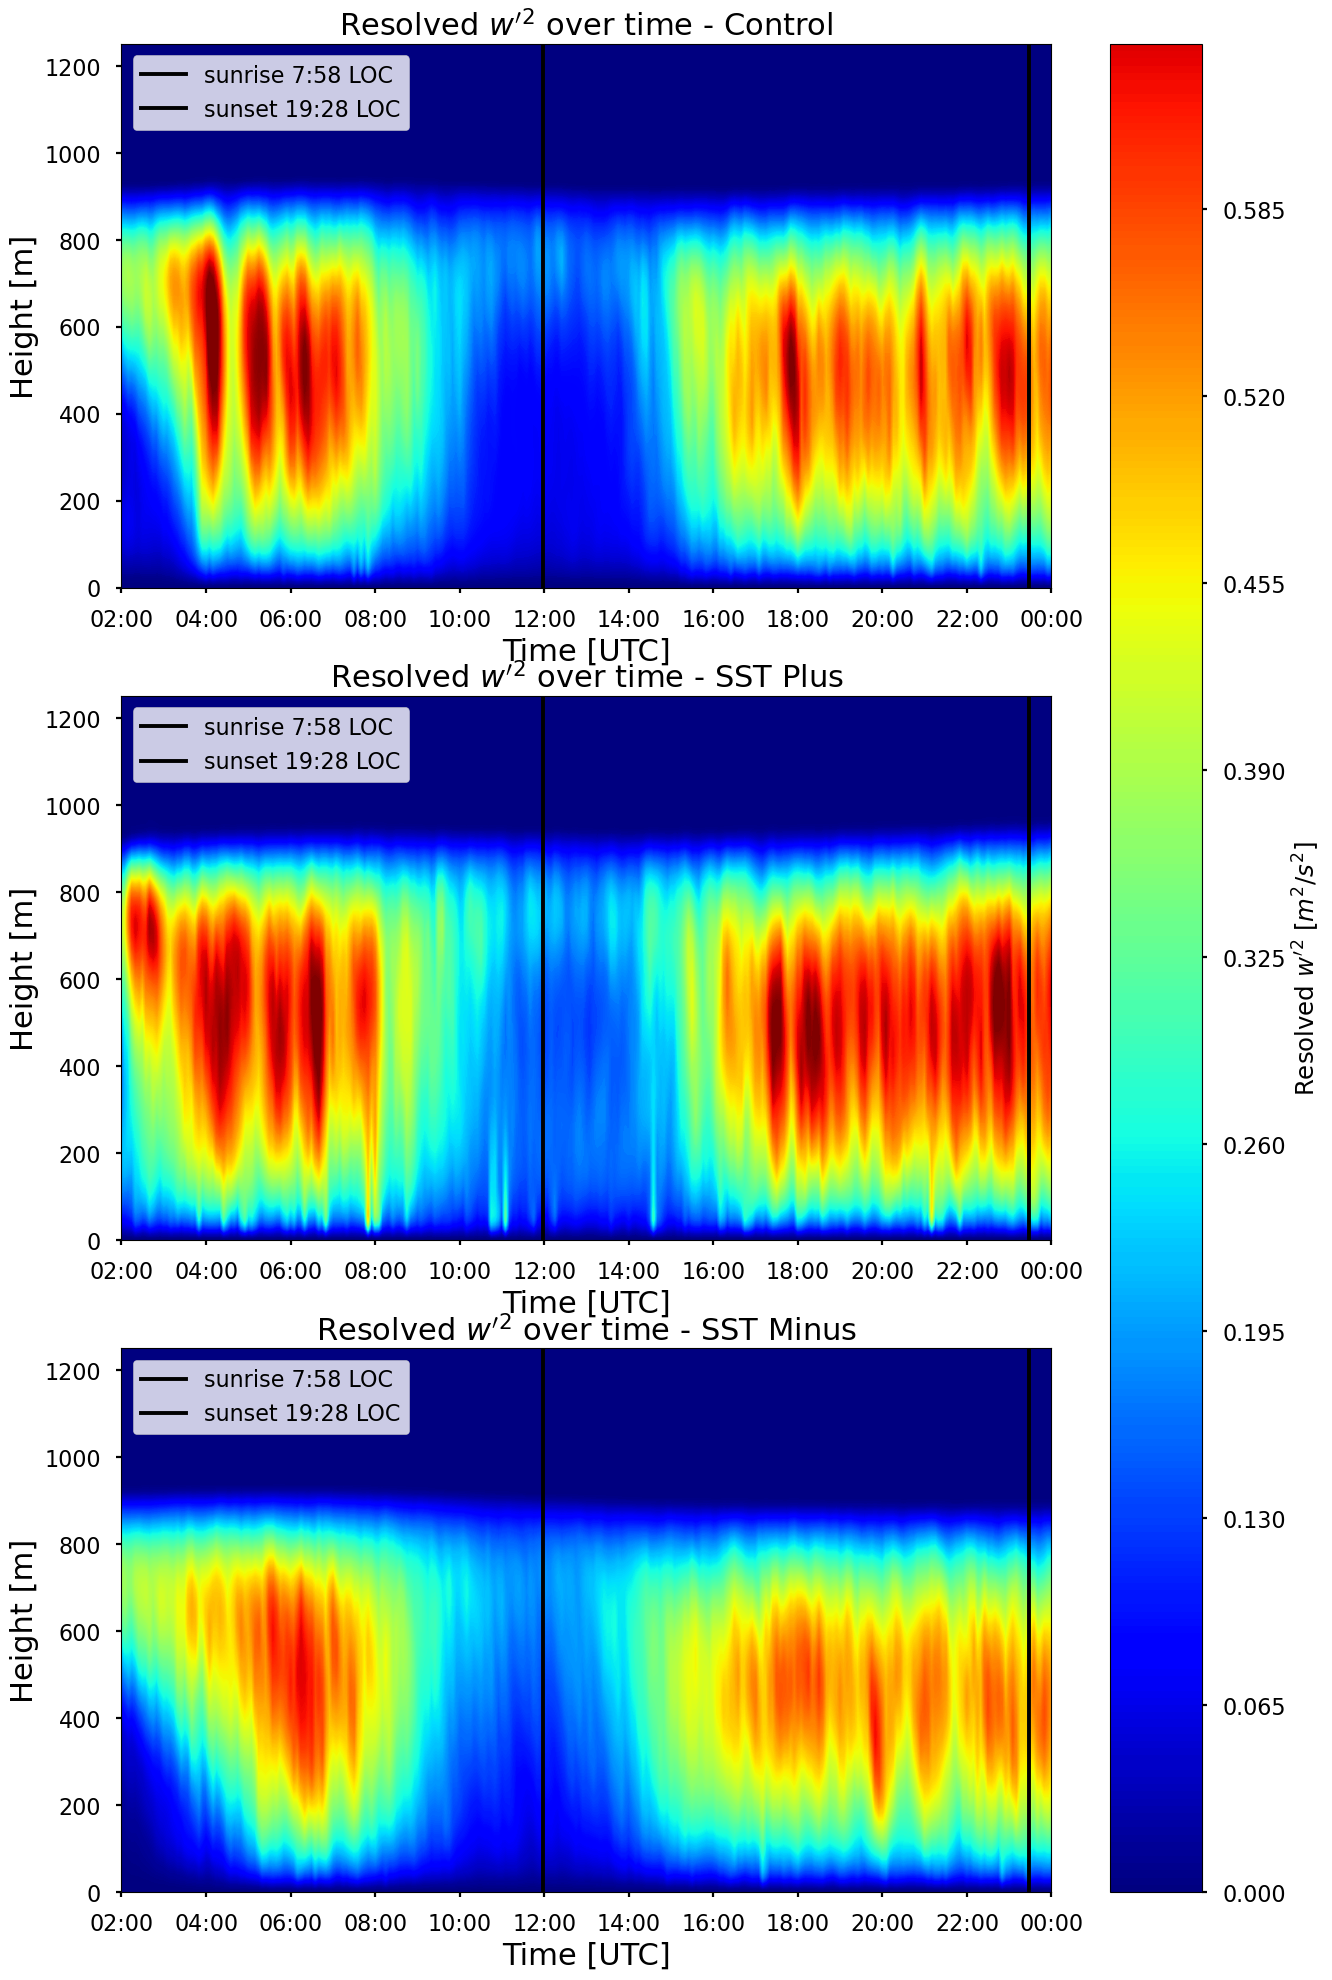

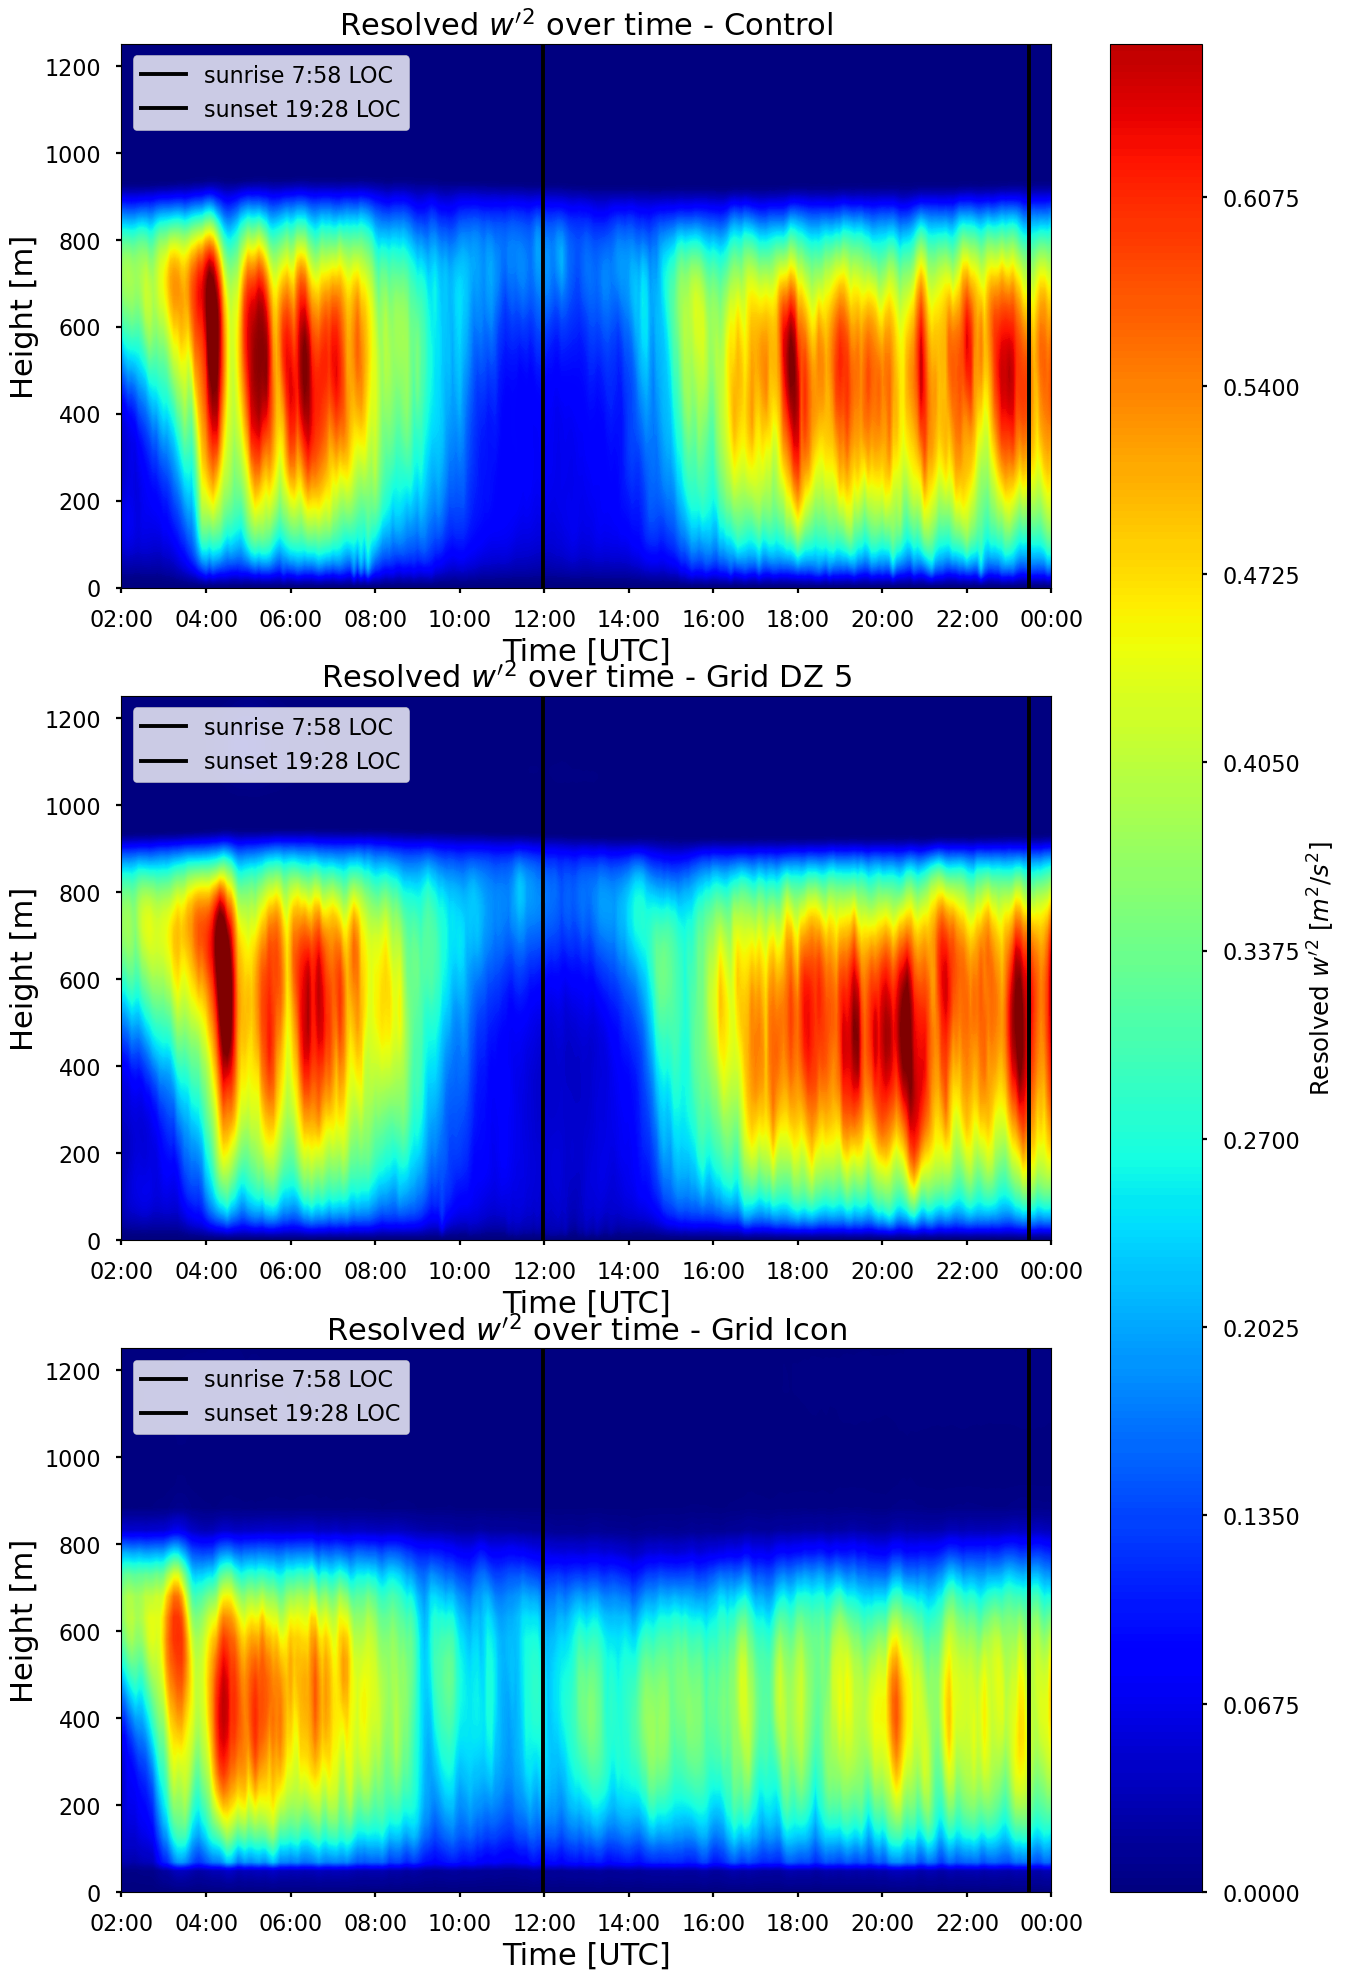

In [12]:
# Calculate w'^2
def calculate_w_squared_resolved(ds):
    return ds['tot_ww'] - ds['sfs_ww']

# Updated plot function for w'^2
def plot_w_squared_over_time(ax, ps_ds, name):
    ucla_times = ucla_time2useful_time(ps_ds["time"].values)
    w_squared_resolved = calculate_w_squared_resolved(ps_ds)
    c = ax.contourf(ucla_times, ps_ds["zt"], w_squared_resolved.T, levels=280, cmap="jet", vmin=0, vmax=0.7)
    ax.set_ylim(0, 1250)  # Set lower limit to 0
    ax.set_ylabel("Height [m]", fontsize=22)
    ax.set_title("Resolved $w'^2$ over time - " + name, fontsize=22)
    ax.xaxis.set_major_formatter(myFmt)
    ax.axvline(np.datetime64("2018-08-22T11:58:00"), color="black",label="sunrise 7:58 LOC")
    ax.axvline(np.datetime64("2018-08-22T23:28:00"), color="black",label="sunset 19:28 LOC")
    ax.legend()
    return c

# 1. Figure: controle, ccn plus, ccn minus
fig1, axes1 = plt.subplots(3, 1, figsize=(15, 24))

plot_w_squared_over_time(axes1[0], controle_psds, "Control")
plot_w_squared_over_time(axes1[1], ds_ccn_plus, "CCN Plus")
c1 = plot_w_squared_over_time(axes1[2], ds_ccn_minus, "CCN Minus")
fig1.colorbar(c1, ax=axes1[:], label="Resolved $w'^2$ [$m^2/s^2$]")

for ax in axes1:
    ax.set_xlabel("Time [UTC]", fontsize=22)

#plt.tight_layout()
plt.savefig(outputdir + "MultiPanel_Resolved_w_squared_CCNP.png")
plt.show()

# 2. Figure: controle, sst plus, sst minus
fig2, axes2 = plt.subplots(3, 1, figsize=(15, 24))

plot_w_squared_over_time(axes2[0], controle_psds, "Control")
plot_w_squared_over_time(axes2[1], sstplus_psds, "SST Plus")
c2 = plot_w_squared_over_time(axes2[2], sst_minus_psds, "SST Minus")
fig2.colorbar(c2, ax=axes2[:], label="Resolved $w'^2$ [$m^2/s^2$]")

for ax in axes2:
    ax.set_xlabel("Time [UTC]", fontsize=22)

#plt.tight_layout()
plt.savefig(outputdir + "MultiPanel_Resolved_w_squared_SST.png")
plt.show()

# 3. Figure: controle, grid dz 5, grid icon
fig3, axes3 = plt.subplots(3, 1, figsize=(15, 24))

plot_w_squared_over_time(axes3[0], controle_psds, "Control")
plot_w_squared_over_time(axes3[1], grid5_00_psds, "Grid DZ 5")
c3 = plot_w_squared_over_time(axes3[2], grid_icon_00_psds, "Grid Icon")
fig3.colorbar(c3, ax=axes3[:], label="Resolved $w'^2$ [$m^2/s^2$]")

for ax in axes3:
    ax.set_xlabel("Time [UTC]", fontsize=22)

#plt.tight_layout()
plt.savefig(outputdir + "MultiPanel_Resolved_w_squared_GRID.png")
plt.show()

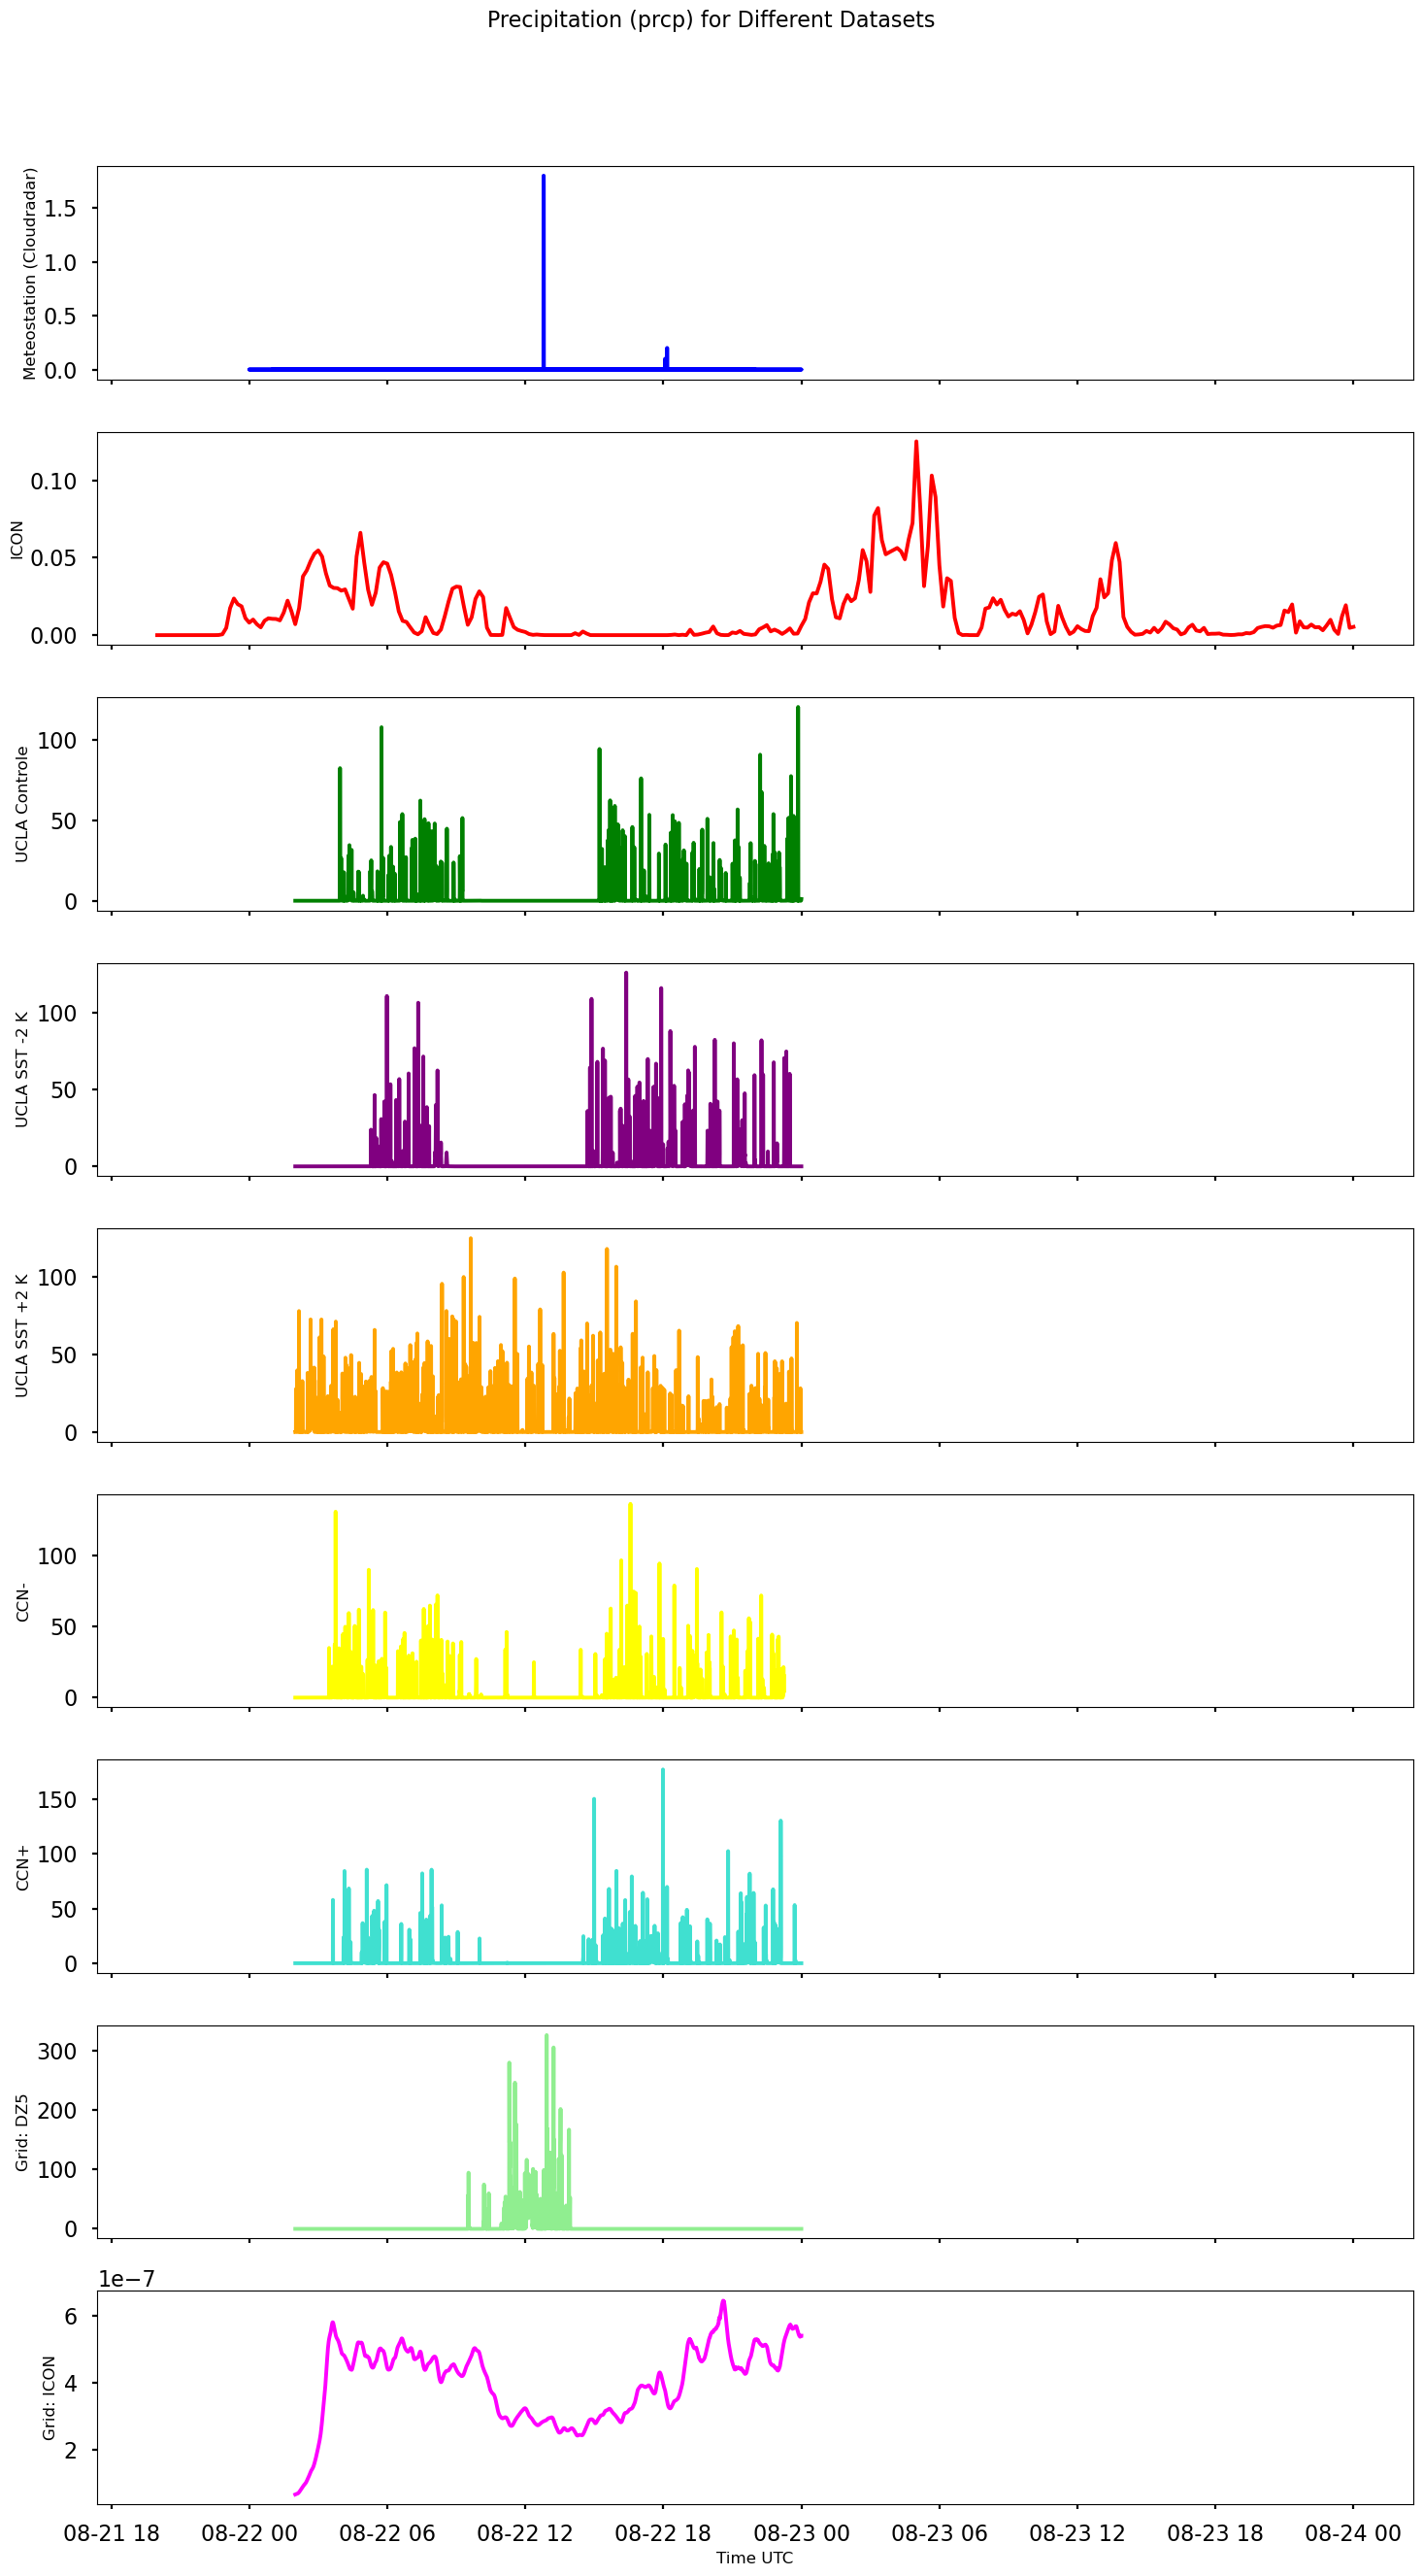

Average Control:  1.530291186645627
Average CCN-:  1.7822826281189919
Average CCN+:  1.6871204506605864
Average CCN- deviation:  0.3377323388122022
Average CCN+ deviation:  0.15682940545957536


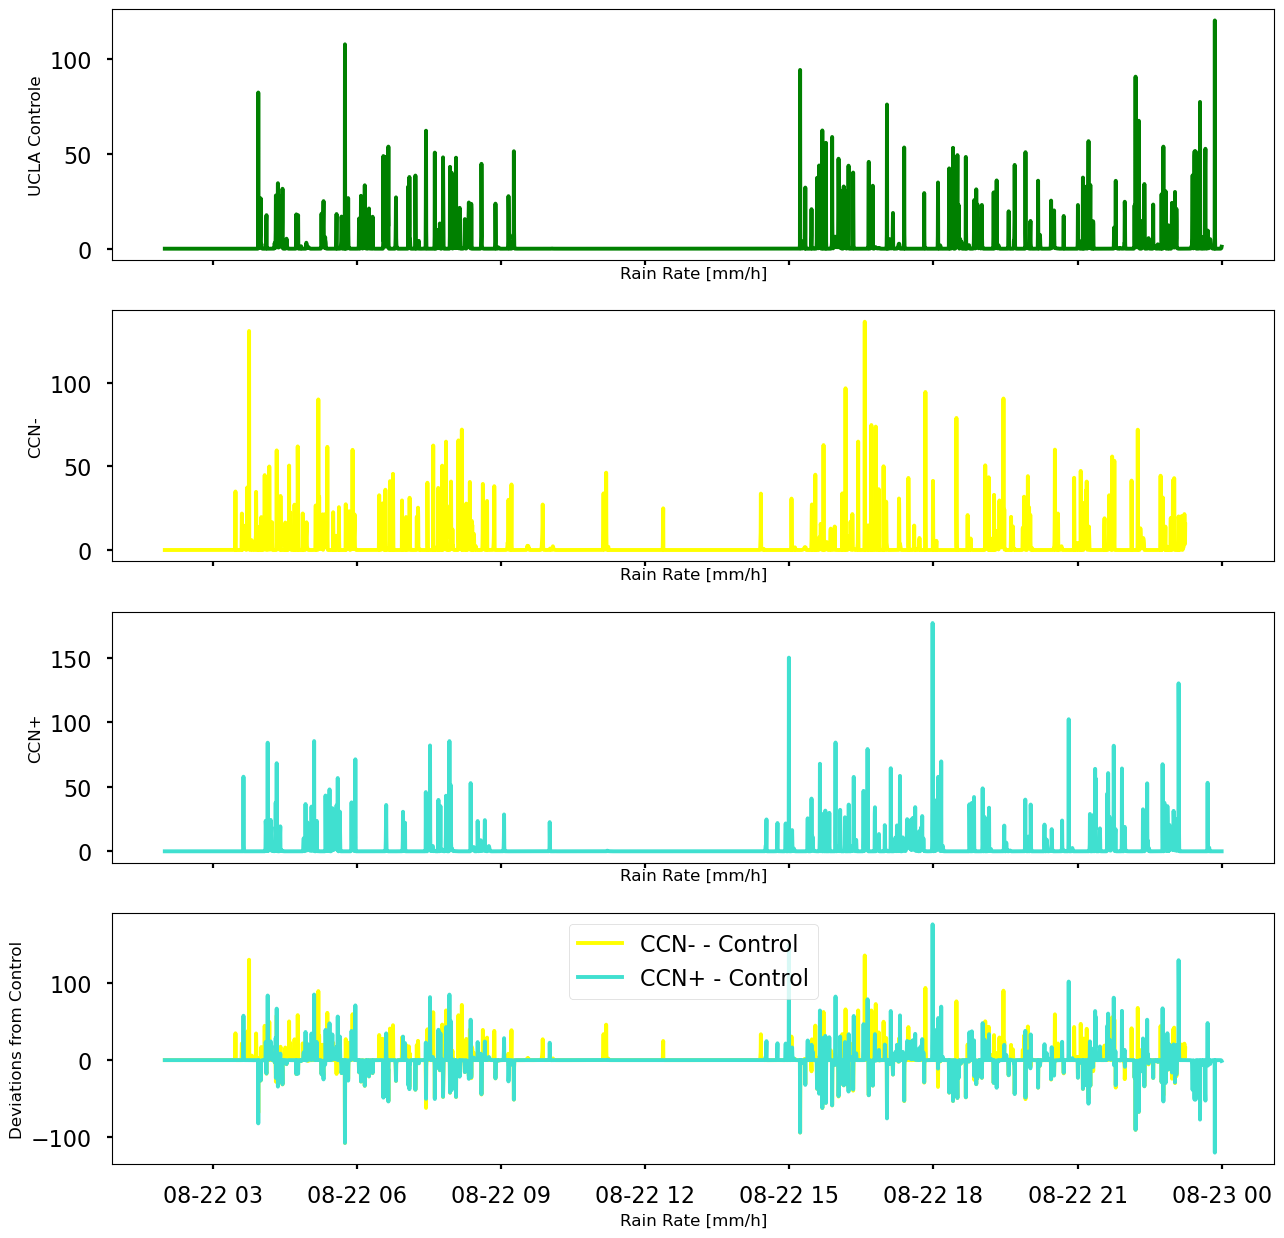

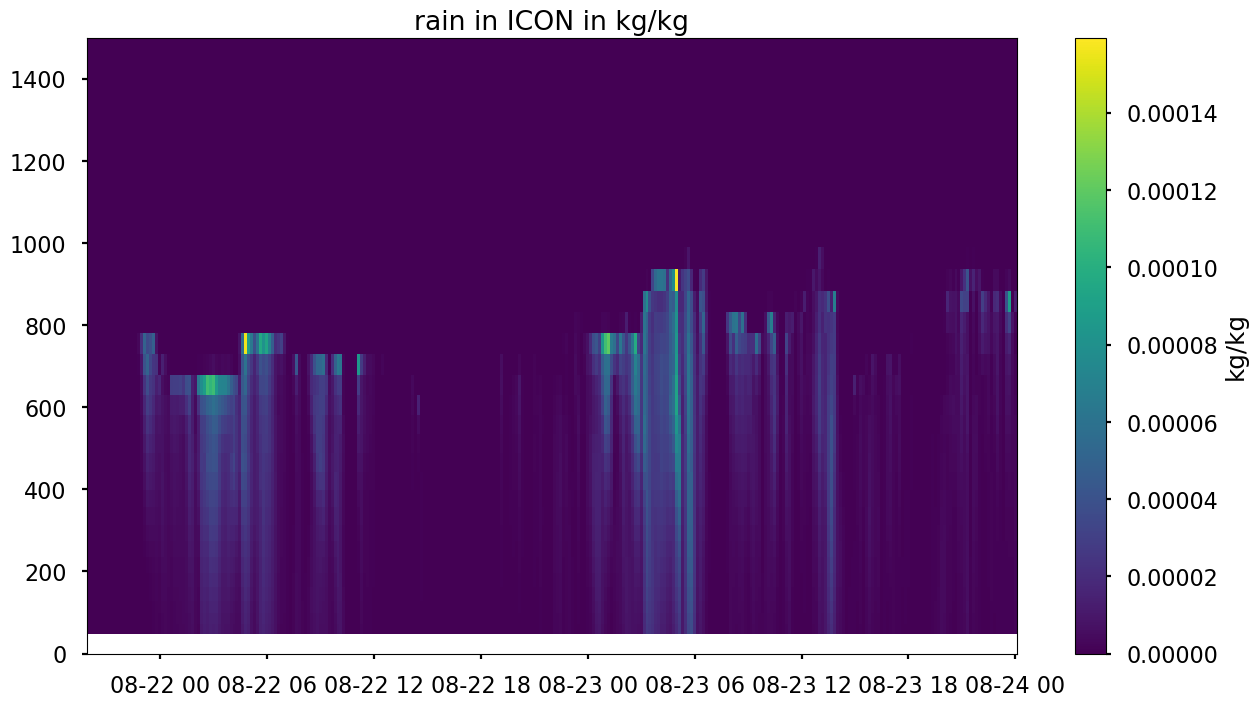

In [13]:
# Niederschlag:

##############################################
# Observations from cloud radar meteo station:

import glob

path ="/home/qwertz/obs_data_MA/joyrad94/22/"
files = glob.glob(path+"joyrad94_iqq_compact_20180822*.nc")

for i, file in enumerate(files):
    ds = xr.open_dataset(file)
    if i == 0: 
        ds_rr = ds # ["RR"]
    else:
        ds_rr = xr.concat([ds_rr, ds], dim="time")

#############################################
# Units:

# kg/kg * m/s muss mit 1.2*3600 multipliziert werden um zu mm/h zu kommen
factor =1.2*3600

############################################
# Obs Zeit:

time_array = ds_rr["time"]
# Referenzdatum: 01.01.2001, 00:00:00 als np.datetime64
ref_time = np.datetime64('2001-01-01T00:00:00', 's')
datetime_array = ref_time + time_array.values.astype('timedelta64[s]')
desired_day = np.datetime64('2018-08-22T00:00:00', 's') # Gewünschter Tag: 22.08.2018
# Zeit des Tages extrahieren (Zeitpunkte - Tagesanfang) und auf den gewünschten Tag umlegen
time_of_day = datetime_array - datetime_array.astype('datetime64[D]')  # Zeitanteil des Tages
times_on_desired_day = desired_day + time_of_day

# Ausgabe der Zeiten
# print(times_on_desired_day)
# for i, (time1, time2) in enumerate(zip(time_array.values, times_on_desired_day)):
    # if i%100==0:
        # print(i, " : ", time1, " == ", time2)
# print(i)

##############################################

# Erstellen einer Figur mit mehreren Subplots
fig, axes = plt.subplots(nrows=9, ncols=1, figsize=(15, 28), sharex=True)

# Titel für die gesamte Figur
fig.suptitle("Precipitation (prcp) for Different Datasets", fontsize=16)

# Plot für jeden Datensatz in einem eigenen Subplot
# axes[0].plot(ds_foghat_prcp["time"], ds_foghat_prcp["prw"], color="blue")
# axes[0].set_ylabel("Foghat", fontsize=12)

axes[0].plot(times_on_desired_day, ds_rr["RR"], color="blue")
axes[0].set_ylabel("Meteostation (Cloudradar)", fontsize=12)
axes[0].set_xlabel("RR [mm/h]", fontsize=12) 

# Durch die vertikale Integration, habe ich den Gesamtwassergehalt in kg/m**2
# für eine Regenrate in mm/h müsste, ich aber noch mit einer Fallgeschwindigkeit multiplizieren m/h => kg/m und h == mm/h 
icon_times_np2 = [convert_single_timestamp(value) for value in ds_icon["time"].values]
axes[1].plot(icon_times_np2, ds_icon["qr"].isel(ncells=0).sum("height")*100, color="red")
##############################################
# ICON LES:
# qr: height and time in kg/kg specific rain content
#####################################
axes[1].set_ylabel("ICON", fontsize=12) # unit kg/kg specific rain content

# Add sunset and sunrise, lines:
# ax.axvline(np.datetime64("2018-08-22T11:58:00"), color="black",label="sunrise 7:58 LOC")
# ax.axvline(np.datetime64("2018-08-22T23:28:00"), color="black",label="sunset 19:28 LOC")

axes[2].plot(controle_time, controle_tsds["prcp"].values*factor, color="green")
axes[2].set_ylabel("UCLA Controle", fontsize=12)
axes[2].set_xlabel("Rain Rate [mm/h]", fontsize=12)
#####################################
# UCLA:
# unit: kg/kg m/s Was soll das sein?
# Surface precipitation rate
# probably derived from these ps dataset variables:
#   rr       (time, zt) float32 191kB ... Rain Water in g/kg
#    prc_r    (time, zm) float32 191kB ... Rain precipitation flux (kg/kg m/s wie oben)
##############################

axes[3].plot(controle_time, sst_minus_tsds["prcp"].values*factor, color="purple")
axes[3].set_ylabel("UCLA SST -2 K", fontsize=12)
axes[3].set_xlabel("Rain Rate [mm/h]", fontsize=12)

axes[4].plot(controle_time, sstplus_tsds["prcp"].values*factor, color="orange")
axes[4].set_ylabel("UCLA SST +2 K", fontsize=12)
axes[4].set_xlabel("Rain Rate [mm/h]", fontsize=12)

axes[5].plot(ccn_new_time, ccn_minus_tsds["prcp"].values*factor, color="yellow")
axes[5].set_ylabel("CCN-", fontsize=12)
axes[5].set_xlabel("Rain Rate [mm/h]", fontsize=12)

axes[6].plot(controle_time, ccn_plus_tsds["prcp"].values*factor, color="turquoise")
axes[6].set_ylabel("CCN+", fontsize=12)
axes[6].set_xlabel("Rain Rate [mm/h]", fontsize=12)

axes[7].plot(controle_time, grid5_00_tsds["prcp"].values*factor, color="lightgreen")
axes[7].set_ylabel("Grid: DZ5", fontsize=12)
axes[7].set_xlabel("Rain Rate [mm/h]", fontsize=12)

axes[8].plot(controle_time, grid_icon_00_tsds["prcp"].values*factor, color="magenta")
axes[8].set_ylabel("Grid: ICON", fontsize=12)
axes[8].set_xlabel("Rain Rate [mm/h]", fontsize=12)

# Gemeinsame x-Achsenbeschriftung
plt.xlabel("Time UTC", fontsize=12)

# Y-Achsenbeschriftung für alle Subplots
for ax in axes:
    # ax.set_ylim(0, max(controle_tsds["prcp"].max(), sst_minus_tsds["prcp"].max(), 
    #                    sstplus_tsds["prcp"].max(), grid5_00_tsds["prcp"].max(),
    #                    grid_icon_00_tsds["prcp"].max()))
    ax.label_outer()  # Verstecke x-Achsenbeschriftungen für alle außer den unteren Plot

# Abstand zwischen den Subplots anpassen
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Speichern des Plots als Bilddatei (optional)
# plt.savefig(outputdir+"precipitation_multipanel_plot.png")

# Plot anzeigen
plt.show()

###############################################
# Just CCN:

fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(15, 15), sharex=True)
axes[0].plot(controle_time, controle_tsds["prcp"].values*factor, color="green")
axes[0].set_ylabel("UCLA Controle", fontsize=12)
axes[0].set_xlabel("Rain Rate [mm/h]", fontsize=12)
axes[1].plot(ccn_new_time, ccn_minus_tsds["prcp"].values*factor, color="yellow")
axes[1].set_ylabel("CCN-", fontsize=12)
axes[1].set_xlabel("Rain Rate [mm/h]", fontsize=12)
axes[2].plot(controle_time, ccn_plus_tsds["prcp"].values*factor, color="turquoise")
axes[2].set_ylabel("CCN+", fontsize=12)
axes[2].set_xlabel("Rain Rate [mm/h]", fontsize=12)

axes[3].plot(ccn_new_time, (ccn_minus_tsds["prcp"].values-controle_tsds["prcp"].values[:5099])*factor, color="yellow", label="CCN- - Control")
axes[3].plot(controle_time, (ccn_plus_tsds["prcp"].values-controle_tsds["prcp"].values)*factor, color="turquoise", label="CCN+ - Control")
axes[3].set_ylabel("Deviations from Control", fontsize=12)
axes[3].set_xlabel("Rain Rate [mm/h]", fontsize=12)
plt.legend()

print("Average Control: ", np.nanmean(controle_tsds["prcp"].values)*factor)
print("Average CCN-: ", np.nanmean(ccn_minus_tsds["prcp"].values)*factor)
print("Average CCN+: ", np.nanmean(ccn_plus_tsds["prcp"].values)*factor)

print("Average CCN- deviation: ", np.nanmean(ccn_minus_tsds["prcp"].values-controle_tsds["prcp"].values[:5099])*factor)
print("Average CCN+ deviation: ", np.nanmean(ccn_plus_tsds["prcp"].values-controle_tsds["prcp"].values)*factor)

################################################
# Plot precipitation from ICON
# Plot precipitation from obs! (Joyrad, Halo, Cloudnet???)


# => Cloudnet scheint so gut wie keinen Regen zu enthalten: das Maximum liegt bei 1.75 mm/h und sieht nach Messfehler aus.
# Laut CLoudnet plots in quicklook browser sollte es aber am 22. abends ab 20:00 bis mitternacht und am 23. zwischen 3 und 9 Uhr regnen...

# => ICON LES scheint keinen Regen zu enthalten - die Werte für kg/kg sind über die gesamte Atmosphärensäule summiert
# und ergeben dann mit 100 multipliziert Werte um die 0.06...

# In UCLA LES auf der anderen Seite scheint Regen im Bereich von kg/kg m/s um die 0.02 der Standard zu sein,
# was mir wie ernsthafter Niederschlag vorkommt...

###############################
# GIbt es einen Fehler in den Zeiteinheiten von joyrad RR???
# Wie kriege ich diese Werte überhaupt auf vergleichbare Einheiten...????

# Mindestens für den CCN-Fall wäre es halt super interessant zu sehen, ob es einen Effekt auf den Regen gibt...
# 

plt.figure(figsize=(15,8))
plt.title("rain in ICON in kg/kg")
plt.pcolormesh(icon_times_np2,ds_icon["z_mc"], ds_icon["qr"].isel(ncells=0).values.T)
plt.ylim(0,1500)
plt.colorbar(label="kg/kg")

In [14]:
# Plots of temperature, moisture and saturation by hour
'''
import numpy as np
import matplotlib.pyplot as plt

# Definiere den Zeitraum für die Zeitstufen
timesteps = np.arange(np.datetime64("2000-01-01T03:00:00"), np.datetime64("2000-01-01T23:59:59"), 3600)

################################
# Funktion zum Extrahieren von q, T und RH aus den Datensätzen
def read_t_and_q_and_rh_from_ds(ds, timestep):
    reduced_ds = ds.sel(time=slice(timestep - 1800, timestep + 1800)).mean("time")
    qs_by_height = reduced_ds["q"].values
    ts_by_height = reduced_ds["t"].values
    RHs_by_height = reduced_ds["RH"].values
    return qs_by_height, ts_by_height, RHs_by_height, reduced_ds

################################
# Namen für die drei Datensätze
names = ["dz 5m", "dz 10m", "dz ICON"]

# Schleife über alle Zeitstufen
for timestep in timesteps:
    # Erstelle eine Figur mit 3x3 Subplots
    fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 18))
    fig.suptitle(f"Water Vapor Mixing Ratio, Temperature, and Relative Humidity at {str(timestep)}", fontsize=16)
    
    # Schleife über die drei Datensätze
    for i, ds in enumerate([grid5_00_psds, controle_psds, grid_icon_00_psds]):
        # Lese die relevanten Werte aus dem Datensatz
        qs_by_height, ts_by_height, RHs_by_height, reduced_ds = read_t_and_q_and_rh_from_ds(ds, timestep)

        # Erste Spalte: Wasserdampf-Mischungsverhältnis (q)
        axes[i, 0].plot(qs_by_height, reduced_ds["zt"], color='b')
        axes[i, 0].set_ylim(0, 1500)
        axes[i, 0].set_xlim(0, 8.5)
        axes[i, 0].set_title(f"{names[i]} - Water Vapor Mixing Ratio (q)")
        axes[i, 0].set_xlabel("q (kg/kg)")
        axes[i, 0].set_ylabel("Height (m)")

        # Zweite Spalte: Temperatur (T)
        axes[i, 1].plot(ts_by_height, reduced_ds["zt"], color='r')
        axes[i, 1].set_ylim(0, 1500)
        axes[i, 1].set_xlim(285, 315)
        axes[i, 1].set_title(f"{names[i]} - Temperature (T)")
        axes[i, 1].set_xlabel("Temperature (K)")
        axes[i, 1].set_ylabel("Height (m)")

        # Dritte Spalte: Relative Luftfeuchtigkeit (RH)
        axes[i, 2].plot(RHs_by_height*100, reduced_ds["zt"], color='g')
        axes[i, 2].set_ylim(0, 1500)
        axes[i, 2].set_xlim(0, 105)
        axes[i, 2].set_title(f"{names[i]} - Relative Humidity (RH)")
        axes[i, 2].set_xlabel("Relative Humidity (%)")
        axes[i, 2].set_ylabel("Height (m)")

    # Optimierung des Layouts
    plt.tight_layout(rect=[0, 0, 1, 0.95])  # Platz für den Suptitle lassen
    # Speichern des Multipanel-Plots
    plt.savefig(outputdir + f"Multipanel_{str(timestep)}.png")
    plt.close(fig)

#######################################################
# Ändere den angegebenen Zeitstempel oben von 2000-01-01 zu 2018-.08-22
# Wahlweise auch als Multipanel eines einzigen Datensatzes mit verschiedenen Zeitschritten
# Sieh es dir noch ein paarmal wie eben als Film an und überlege dir, was für Schlüsse hieraus zu ziehen sind...

'''

'\nimport numpy as np\nimport matplotlib.pyplot as plt\n\n# Definiere den Zeitraum für die Zeitstufen\ntimesteps = np.arange(np.datetime64("2000-01-01T03:00:00"), np.datetime64("2000-01-01T23:59:59"), 3600)\n\n################################\n# Funktion zum Extrahieren von q, T und RH aus den Datensätzen\ndef read_t_and_q_and_rh_from_ds(ds, timestep):\n    reduced_ds = ds.sel(time=slice(timestep - 1800, timestep + 1800)).mean("time")\n    qs_by_height = reduced_ds["q"].values\n    ts_by_height = reduced_ds["t"].values\n    RHs_by_height = reduced_ds["RH"].values\n    return qs_by_height, ts_by_height, RHs_by_height, reduced_ds\n\n################################\n# Namen für die drei Datensätze\nnames = ["dz 5m", "dz 10m", "dz ICON"]\n\n# Schleife über alle Zeitstufen\nfor timestep in timesteps:\n    # Erstelle eine Figur mit 3x3 Subplots\n    fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 18))\n    fig.suptitle(f"Water Vapor Mixing Ratio, Temperature, and Relative Humidity a

In [15]:
# Ein Multipanel pro Simulation:

import numpy as np
import matplotlib.pyplot as plt

# Funktion zum Extrahieren von q, T und RH aus den Datensätzen
def read_t_and_q_and_rh_from_ds(ds, timestep):
    reduced_ds = ds.sel(time=slice(timestep - 1800, timestep + 1800)).mean("time")
    qs_by_height = reduced_ds["q"].values
    ts_by_height = reduced_ds["t"].values
    RHs_by_height = reduced_ds["RH"].values
    return qs_by_height, ts_by_height, RHs_by_height, reduced_ds

# Namen für die drei Datensätze
names = ["dz 5m", "dz 10m", "dz ICON"]

# Definiere die Zeitschritte: erster, mittlerer und letzter Zeitschritt
first_timestep = np.datetime64("2000-01-01T03:00:00")
middle_timestep = np.datetime64("2000-01-01T12:00:00")
last_timestep = np.datetime64("2000-01-01T23:00:00")

timesteps = [first_timestep, middle_timestep, last_timestep]

# Datensätze der drei Simulationen
datasets = [grid5_00_psds, controle_psds, grid_icon_00_psds]

# Schleife über die drei Datensätze
for i, ds in enumerate(datasets):
    fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 18))
    fig.suptitle(f"{names[i]} - Profiles at First, Middle, and Last Timestep", fontsize=16)

    # Schleife über die Zeitschritte (früh, mittel, spät)
    for j, timestep in enumerate(timesteps):
        # Lese die relevanten Werte aus dem Datensatz
        qs_by_height, ts_by_height, RHs_by_height, reduced_ds = read_t_and_q_and_rh_from_ds(ds, timestep)

        # Erste Spalte: Wasserdampf-Mischungsverhältnis (q)
        axes[j, 0].plot(qs_by_height, reduced_ds["zt"], color='b')
        axes[j, 0].set_ylim(0, 1500)
        axes[j, 0].set_xlim(0, 8.5)
        axes[j, 0].set_title(f"{str(timestep)[11:]} UTC - Water Vapor Mixing Ratio (q)")
        axes[j, 0].set_xlabel("q (kg/kg)")
        axes[j, 0].set_ylabel("Height (m)")

        # Zweite Spalte: Temperatur (T)
        axes[j, 1].plot(ts_by_height, reduced_ds["zt"], color='r')
        axes[j, 1].set_ylim(0, 1500)
        axes[j, 1].set_xlim(285, 315)
        axes[j, 1].set_title(f"{str(timestep)[11:]} UTC - Temperature (T)")
        axes[j, 1].set_xlabel("Temperature (K)")
        axes[j, 1].set_ylabel("Height (m)")

        # Dritte Spalte: Relative Luftfeuchtigkeit (RH)
        axes[j, 2].plot(RHs_by_height * 100, reduced_ds["zt"], color='g')
        axes[j, 2].set_ylim(0, 1500)
        axes[j, 2].set_xlim(0, 105)
        axes[j, 2].set_title(f"{str(timestep)[11:]} UTC - Relative Humidity (RH)")
        axes[j, 2].set_xlabel("Relative Humidity (%)")
        axes[j, 2].set_ylabel("Height (m)")

    # Optimierung des Layouts
    plt.tight_layout(rect=[0, 0, 1, 0.95])  # Platz für den Suptitle lassen
    # Speichern des Multipanel-Plots
    plt.savefig(outputdir + f"Multipanel_{names[i]}_First_Mid_Last_Timestep.png")
    plt.close(fig)


In [16]:
# New Plot version:

# Ein Multipanel pro Simulation:

import numpy as np
import matplotlib.pyplot as plt

# Funktion zum Extrahieren von q, T und RH aus den Datensätzen
def read_t_and_q_and_rh_from_ds(ds, timestep):
    reduced_ds = ds.sel(time=slice(timestep - 1800, timestep + 1800)).mean("time")
    qs_by_height = reduced_ds["q"].values
    ts_by_height = reduced_ds["t"].values
    RHs_by_height = reduced_ds["RH"].values
    return qs_by_height, ts_by_height, RHs_by_height, reduced_ds

# Namen für die drei Datensätze
names = ["dz 5m", "dz 10m", "dz ICON"]

# Definiere die Zeitschritte: erster, mittlerer und letzter Zeitschritt
first_timestep = np.datetime64("2000-01-01T03:00:00")
middle_timestep = np.datetime64("2000-01-01T12:00:00")
last_timestep = np.datetime64("2000-01-01T23:00:00")

timesteps = [first_timestep, middle_timestep, last_timestep]

# Datensätze der drei Simulationen
datasets = [grid5_00_psds, controle_psds, grid_icon_00_psds]
colors = ["limegreen", "cyan", "gold"]

# Schleife über die drei Datensätze
for i, ds in enumerate(datasets):
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(30, 10))
    fig.suptitle(f"{names[i]} - Profiles at First, Middle, and Last Timestep", fontsize=16)

    # Schleife über die Zeitschritte (früh, mittel, spät)
    for j, timestep in enumerate(timesteps):
        # Lese die relevanten Werte aus dem Datensatz
        qs_by_height, ts_by_height, RHs_by_height, reduced_ds = read_t_and_q_and_rh_from_ds(ds, timestep)

        # Erste Spalte: Wasserdampf-Mischungsverhältnis (q)
        axes[0].plot(qs_by_height, reduced_ds["zt"], color=colors[j], label=str(timestep)[11:], linewidth=1.5)
        # axes[0].scatter(qs_by_height, reduced_ds["zt"], color=colors[j], linewidth=0.1, marker="X")
        axes[0].set_ylim(0, 1250)
        axes[0].set_xlim(0, 8.5)
        axes[0].set_title("Water Vapor Mixing Ratio (q)")
        axes[0].set_xlabel("q (kg/kg)")
        axes[0].set_ylabel("Height (m)")
        axes[0].legend()

        # Zweite Spalte: Temperatur (T)
        axes[1].plot(ts_by_height, reduced_ds["zt"], color=colors[j], label=str(timestep)[11:], linewidth=1.5)
        # axes[1].scatter(ts_by_height, reduced_ds["zt"], color=colors[j], linewidth=0.1, marker="X")
        axes[1].set_ylim(0, 1250)
        axes[1].set_xlim(285, 310)
        axes[1].set_title("Temperature (T)")
        axes[1].set_xlabel("Temperature (K)")
        axes[1].set_ylabel("Height (m)")
        axes[1].legend()

        # Dritte Spalte: Relative Luftfeuchtigkeit (RH)
        axes[2].plot(RHs_by_height * 100, reduced_ds["zt"], color=colors[j], label=str(timestep)[11:], linewidth=1.5)
        # axes[2].scatter(RHs_by_height * 100, reduced_ds["zt"], color=colors[j], linewidth=0.1, marker="X")
        axes[2].set_ylim(0, 1250)
        axes[2].set_xlim(0, 105)
        axes[2].set_title("Relative Humidity (RH)")
        axes[2].set_xlabel("Relative Humidity (%)")
        axes[2].set_ylabel("Height (m)")
        axes[2].legend()

    

    # Optimierung des Layouts
    plt.tight_layout(rect=[0, 0, 1, 0.95])  # Platz für den Suptitle lassen
    # Speichern des Multipanel-Plots
    plt.savefig(outputdir + f"Just_three_{names[i]}_.png")
    plt.close(fig)


In [17]:
# Multipanels für CCN: 

import numpy as np
import matplotlib.pyplot as plt

# Funktion zum Extrahieren von q, T und RH aus den Datensätzen
def read_t_and_q_and_rh_from_ds(ds, timestep):
    reduced_ds = ds.sel(time=slice(timestep - 1800, timestep + 1800)).mean("time")
    qs_by_height = reduced_ds["q"].values
    ts_by_height = reduced_ds["t"].values
    RHs_by_height = reduced_ds["RH"].values
    return qs_by_height, ts_by_height, RHs_by_height, reduced_ds

##############################################
# Namen für die drei Datensätze (# Multipanels für CCN)
names = ["CCN minus", "Controle", "CCN plus"]
datasets = [ds_ccn_minus, controle_psds, ds_ccn_plus]
##############################################

# Definiere die Zeitschritte: erster, mittlerer und letzter Zeitschritt
first_timestep = np.datetime64("2000-01-01T03:00:00")
middle_timestep = np.datetime64("2000-01-01T12:00:00")
last_timestep = np.datetime64("2000-01-01T23:00:00")

timesteps = [first_timestep, middle_timestep, last_timestep]

# Datensätze der drei Simulationen
colors = ["limegreen", "cyan", "gold"]

# Schleife über die drei Datensätze
for i, ds in enumerate(datasets):
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(30, 10))
    fig.suptitle(f"{names[i]} - Profiles at First, Middle, and Last Timestep", fontsize=16)

    # Schleife über die Zeitschritte (früh, mittel, spät)
    for j, timestep in enumerate(timesteps):
        # Lese die relevanten Werte aus dem Datensatz
        qs_by_height, ts_by_height, RHs_by_height, reduced_ds = read_t_and_q_and_rh_from_ds(ds, timestep)

        # Erste Spalte: Wasserdampf-Mischungsverhältnis (q)
        axes[0].plot(qs_by_height, reduced_ds["zt"], color=colors[j], label=str(timestep)[11:], linewidth=1.5)
        # axes[0].scatter(qs_by_height, reduced_ds["zt"], color=colors[j], linewidth=0.1, marker="X")
        axes[0].set_ylim(0, 1250)
        axes[0].set_xlim(0, 8.5)
        axes[0].set_title("Water Vapor Mixing Ratio (q)")
        axes[0].set_xlabel("q (kg/kg)")
        axes[0].set_ylabel("Height (m)")
        axes[0].legend()

        # Zweite Spalte: Temperatur (T)
        axes[1].plot(ts_by_height, reduced_ds["zt"], color=colors[j], label=str(timestep)[11:], linewidth=1.5)
        # axes[1].scatter(ts_by_height, reduced_ds["zt"], color=colors[j], linewidth=0.1, marker="X")
        axes[1].set_ylim(0, 1250)
        axes[1].set_xlim(285, 310)
        axes[1].set_title("Temperature (T)")
        axes[1].set_xlabel("Temperature (K)")
        axes[1].set_ylabel("Height (m)")
        axes[1].legend()

        # Dritte Spalte: Relative Luftfeuchtigkeit (RH)
        axes[2].plot(RHs_by_height * 100, reduced_ds["zt"], color=colors[j], label=str(timestep)[11:], linewidth=1.5)
        # axes[2].scatter(RHs_by_height * 100, reduced_ds["zt"], color=colors[j], linewidth=0.1, marker="X")
        axes[2].set_ylim(0, 1250)
        axes[2].set_xlim(0, 105)
        axes[2].set_title("Relative Humidity (RH)")
        axes[2].set_xlabel("Relative Humidity (%)")
        axes[2].set_ylabel("Height (m)")
        axes[2].legend()

    

    # Optimierung des Layouts
    plt.tight_layout(rect=[0, 0, 1, 0.95])  # Platz für den Suptitle lassen
    # Speichern des Multipanel-Plots
    plt.savefig(outputdir + f"Just_three_{names[i]}_.png")
    plt.close(fig)


In [18]:
# Multipanels für SST: 

import numpy as np
import matplotlib.pyplot as plt

# Funktion zum Extrahieren von q, T und RH aus den Datensätzen
def read_t_and_q_and_rh_from_ds(ds, timestep):
    reduced_ds = ds.sel(time=slice(timestep - 1800, timestep + 1800)).mean("time")
    qs_by_height = reduced_ds["q"].values
    ts_by_height = reduced_ds["t"].values
    RHs_by_height = reduced_ds["RH"].values
    return qs_by_height, ts_by_height, RHs_by_height, reduced_ds

##############################################
# Namen für die drei Datensätze (# Multipanels für SST)
names = ["SST minus", "Controle", "SST plus"]
datasets = [sst_minus_psds, controle_psds, sstplus_psds]
##############################################

# Definiere die Zeitschritte: erster, mittlerer und letzter Zeitschritt
first_timestep = np.datetime64("2000-01-01T03:00:00")
middle_timestep = np.datetime64("2000-01-01T12:00:00")
last_timestep = np.datetime64("2000-01-01T23:00:00")

timesteps = [first_timestep, middle_timestep, last_timestep]

# Datensätze der drei Simulationen
colors = ["limegreen", "cyan", "gold"]

# Schleife über die drei Datensätze
for i, ds in enumerate(datasets):
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(30, 10))
    fig.suptitle(f"{names[i]} - Profiles at First, Middle, and Last Timestep", fontsize=16)

    # Schleife über die Zeitschritte (früh, mittel, spät)
    for j, timestep in enumerate(timesteps):
        # Lese die relevanten Werte aus dem Datensatz
        qs_by_height, ts_by_height, RHs_by_height, reduced_ds = read_t_and_q_and_rh_from_ds(ds, timestep)

        # Erste Spalte: Wasserdampf-Mischungsverhältnis (q)
        axes[0].plot(qs_by_height, reduced_ds["zt"], color=colors[j], label=str(timestep)[11:], linewidth=1.5)
        # axes[0].scatter(qs_by_height, reduced_ds["zt"], color=colors[j], linewidth=0.1, marker="X")
        axes[0].set_ylim(0, 1250)
        axes[0].set_xlim(0, 8.5)
        axes[0].set_title("Water Vapor Mixing Ratio (q)")
        axes[0].set_xlabel("q (kg/kg)")
        axes[0].set_ylabel("Height (m)")
        axes[0].legend()

        # Zweite Spalte: Temperatur (T)
        axes[1].plot(ts_by_height, reduced_ds["zt"], color=colors[j], label=str(timestep)[11:], linewidth=1.5)
        # axes[1].scatter(ts_by_height, reduced_ds["zt"], color=colors[j], linewidth=0.1, marker="X")
        axes[1].set_ylim(0, 1250)
        axes[1].set_xlim(285, 310)
        axes[1].set_title("Temperature (T)")
        axes[1].set_xlabel("Temperature (K)")
        axes[1].set_ylabel("Height (m)")
        axes[1].legend()

        # Dritte Spalte: Relative Luftfeuchtigkeit (RH)
        axes[2].plot(RHs_by_height * 100, reduced_ds["zt"], color=colors[j], label=str(timestep)[11:], linewidth=1.5)
        # axes[2].scatter(RHs_by_height * 100, reduced_ds["zt"], color=colors[j], linewidth=0.1, marker="X")
        axes[2].set_ylim(0, 1250)
        axes[2].set_xlim(0, 105)
        axes[2].set_title("Relative Humidity (RH)")
        axes[2].set_xlabel("Relative Humidity (%)")
        axes[2].set_ylabel("Height (m)")
        axes[2].legend()

    

    # Optimierung des Layouts
    plt.tight_layout(rect=[0, 0, 1, 0.95])  # Platz für den Suptitle lassen
    # Speichern des Multipanel-Plots
    plt.savefig(outputdir + f"Just_three_{names[i]}_.png")
    plt.close(fig)


In [19]:
# Statistiken zu SST sensitivity:

# Cloud Top Height (CTH) Statistiken
print("CTH Control mean:", np.nanmean(controle_tsds["zc"].values))
print("CTH SST +2 K mean:", np.nanmean(sstplus_tsds["zc"].values))
print("CTH SST -2 K mean:", np.nanmean(sst_minus_tsds["zc"].values))
print("CTH Control std:", np.std(controle_tsds["zc"].values))
print("CTH SST +2 K std:", np.std(sstplus_tsds["zc"].values))
print("CTH SST -2 K std:", np.std(sst_minus_tsds["zc"].values))
print("CTH Control median:", np.median(controle_tsds["zc"].values))
print("CTH SST +2 K median:", np.median(sstplus_tsds["zc"].values))
print("CTH SST -2 K median:", np.median(sst_minus_tsds["zc"].values))

# Liquid Water Path (LWP) Statistiken
print("LWP Control mean:", np.nanmean(controle_tsds["lwp_bar"].values / 1000))
print("LWP SST +2 K mean:", np.nanmean(sstplus_tsds["lwp_bar"].values / 1000))
print("LWP SST -2 K mean:", np.nanmean(sst_minus_tsds["lwp_bar"].values / 1000))
print("LWP Control std:", np.std(controle_tsds["lwp_bar"].values / 1000))
print("LWP SST +2 K std:", np.std(sstplus_tsds["lwp_bar"].values / 1000))
print("LWP SST -2 K std:", np.std(sst_minus_tsds["lwp_bar"].values / 1000))
print("LWP Control median:", np.median(controle_tsds["lwp_bar"].values / 1000))
print("LWP SST +2 K median:", np.median(sstplus_tsds["lwp_bar"].values / 1000))
print("LWP SST -2 K median:", np.median(sst_minus_tsds["lwp_bar"].values / 1000))

# Cloud Base Height (CBH) Statistiken
print("CBH Control mean:", np.nanmean(controle_tsds["zb"].values))
print("CBH SST +2 K mean:", np.nanmean(sstplus_tsds["zb"].values))
print("CBH SST -2 K mean:", np.nanmean(sst_minus_tsds["zb"].values))
print("CBH Control std:", np.std(controle_tsds["zb"].values))
print("CBH SST +2 K std:", np.std(sstplus_tsds["zb"].values))
print("CBH SST -2 K std:", np.std(sst_minus_tsds["zb"].values))
print("CBH Control median:", np.median(controle_tsds["zb"].values))
print("CBH SST +2 K median:", np.median(sstplus_tsds["zb"].values))
print("CBH SST -2 K median:", np.median(sst_minus_tsds["zb"].values))

# Cloud Thickness (h) Statistiken (als Differenz CTH - CBH)
print("Cloud Thickness Control mean:", np.nanmean(controle_tsds["zc"].values - controle_tsds["zb"].values))
print("Cloud Thickness SST +2 K mean:", np.nanmean(sstplus_tsds["zc"].values - sstplus_tsds["zb"].values))
print("Cloud Thickness SST -2 K mean:", np.nanmean(sst_minus_tsds["zc"].values - sst_minus_tsds["zb"].values))
print("Cloud Thickness Control std:", np.std(controle_tsds["zc"].values - controle_tsds["zb"].values))
print("Cloud Thickness SST +2 K std:", np.std(sstplus_tsds["zc"].values - sstplus_tsds["zb"].values))
print("Cloud Thickness SST -2 K std:", np.std(sst_minus_tsds["zc"].values - sst_minus_tsds["zb"].values))
print("Cloud Thickness Control median:", np.median(controle_tsds["zc"].values - controle_tsds["zb"].values))
print("Cloud Thickness SST +2 K median:", np.median(sstplus_tsds["zc"].values - sstplus_tsds["zb"].values))
print("Cloud Thickness SST -2 K median:", np.median(sst_minus_tsds["zc"].values - sst_minus_tsds["zb"].values))


CTH Control mean: 933.90173
CTH SST +2 K mean: 955.43365
CTH SST -2 K mean: 915.1912
CTH Control std: 7.874104
CTH SST +2 K std: 7.0985565
CTH SST -2 K std: 13.357897
CTH Control median: 935.0
CTH SST +2 K median: 955.0
CTH SST -2 K median: 905.0
LWP Control mean: 0.07489796
LWP SST +2 K mean: 0.083341405
LWP SST -2 K mean: 0.055418912
LWP Control std: 0.016955055
LWP SST +2 K std: 0.02353596
LWP SST -2 K std: 0.013860771
LWP Control median: 0.074967824
LWP SST +2 K median: 0.081029706
LWP SST -2 K median: 0.053186078
CBH Control mean: 611.1163
CBH SST +2 K mean: 610.7944
CBH SST -2 K mean: 657.04694
CBH Control std: 20.591722
CBH SST +2 K std: 18.163622
CBH SST -2 K std: 24.844803
CBH Control median: 605.0
CBH SST +2 K median: 615.0
CBH SST -2 K median: 655.0
Cloud Thickness Control mean: 322.78546
Cloud Thickness SST +2 K mean: 344.63928
Cloud Thickness SST -2 K mean: 258.1443
Cloud Thickness Control std: 24.444311
Cloud Thickness SST +2 K std: 17.771818
Cloud Thickness SST -2 K std:

<xarray.DataArray 'cfrac' (time: 5281)> Size: 21kB
array([1., 1., 1., ..., 1., 1., 1.], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 42kB 2000-01-01T02:00:00 ... 2000-01-02
Attributes:
    longname:  Cloud fraction
    units:     -


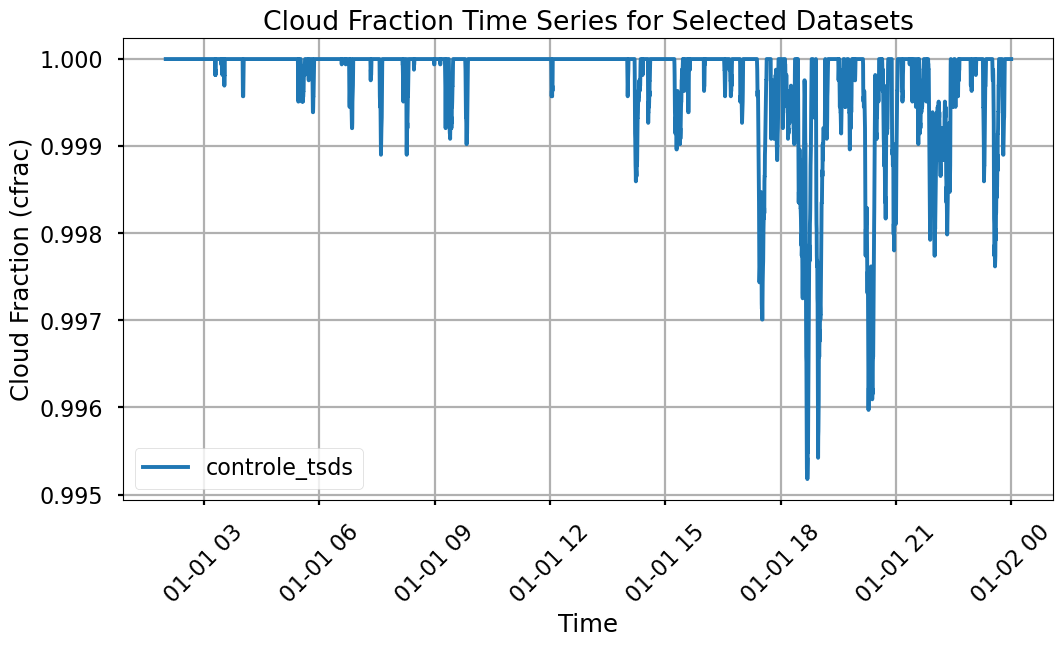

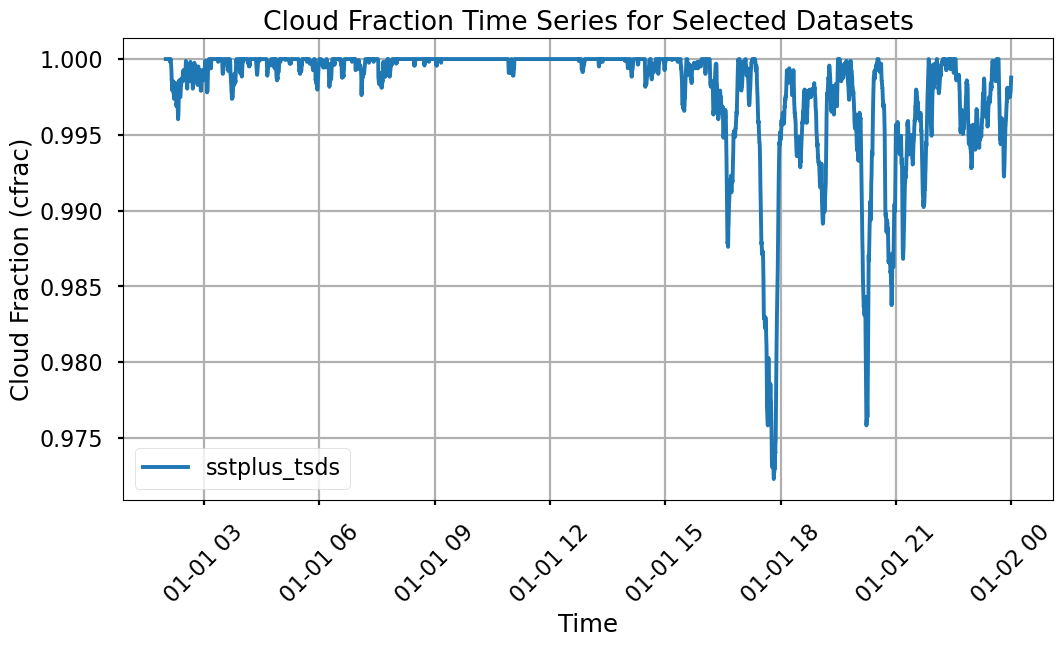

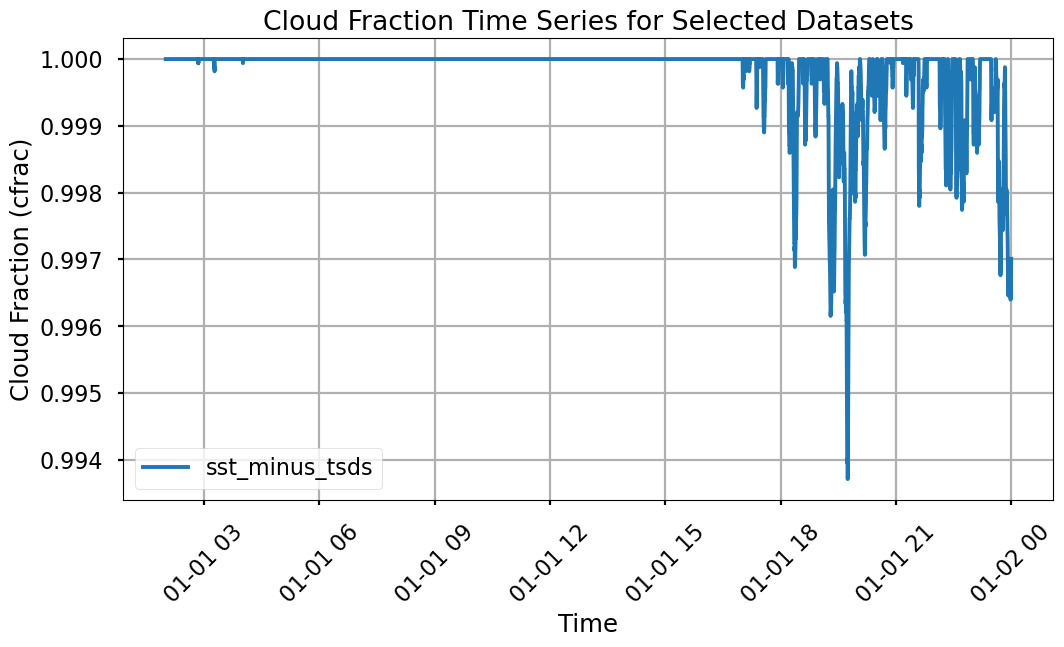

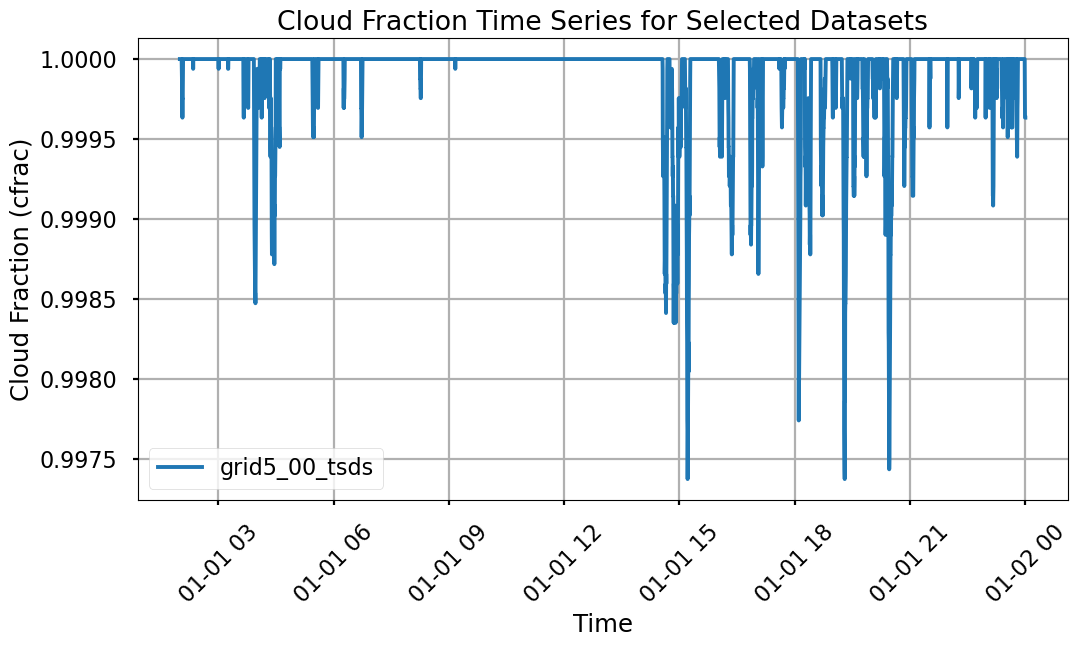

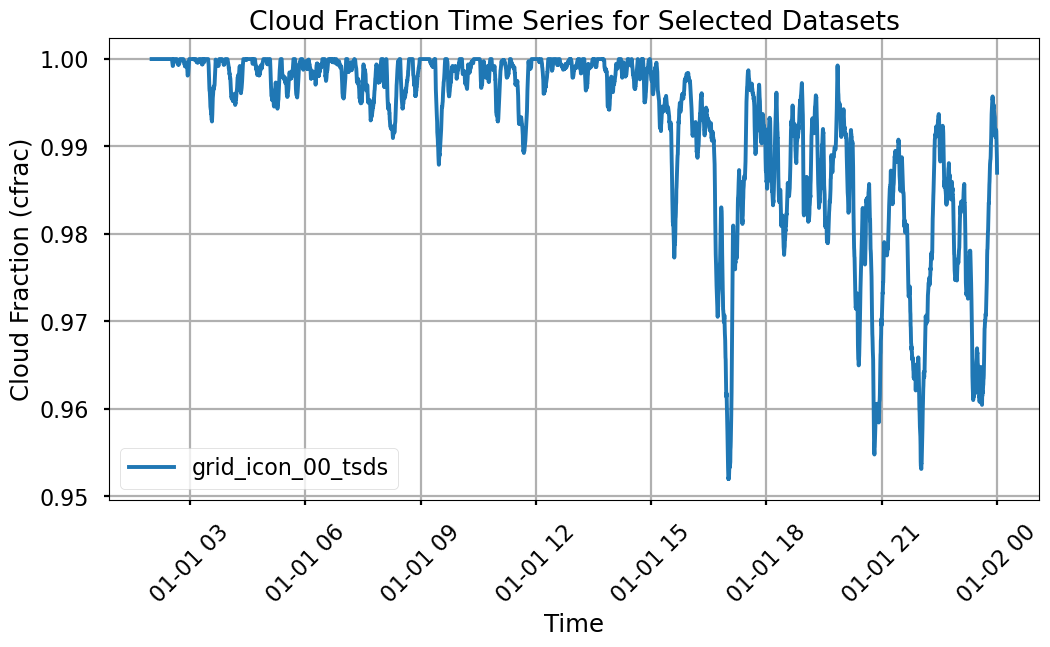

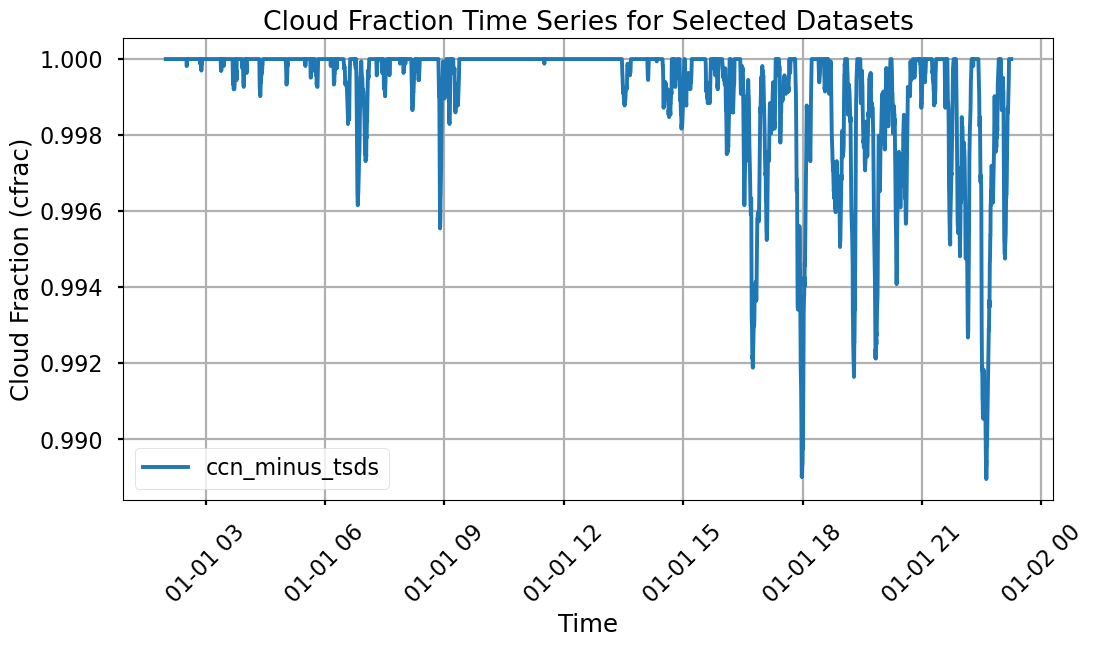

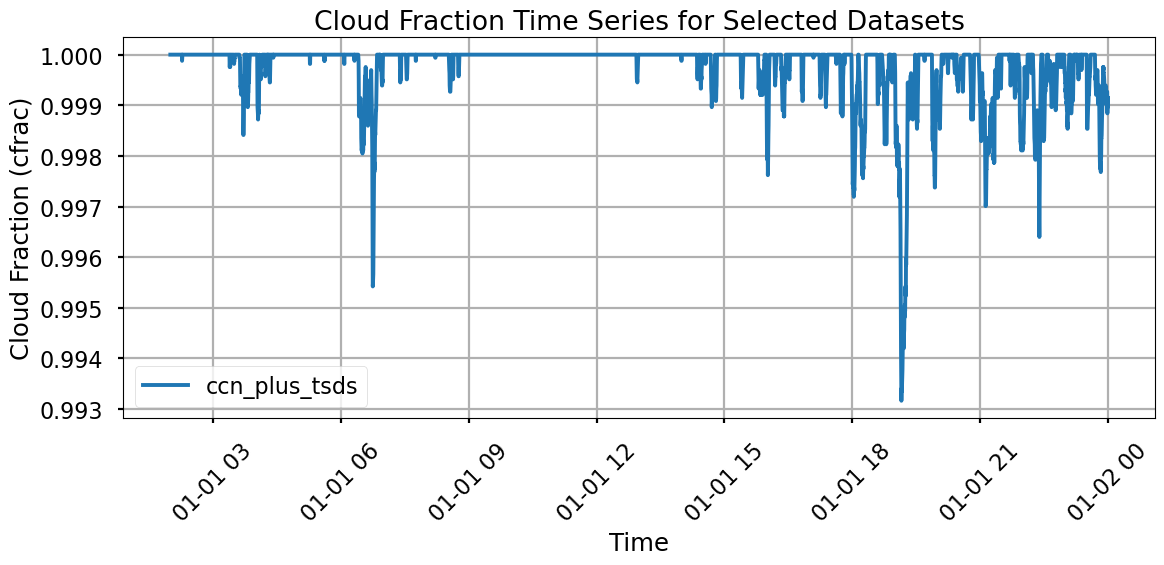

In [20]:
# Thinking about FOCs:

import xarray as xr
import matplotlib.pyplot as plt

print(controle_tsds["cfrac"])

# List of datasets to plot
datasets = {
    "controle_tsds": controle_tsds,
    "sstplus_tsds": sstplus_tsds,
    "sst_minus_tsds": sst_minus_tsds,
    "grid5_00_tsds": grid5_00_tsds,
    "grid_icon_00_tsds": grid_icon_00_tsds,
    "ccn_minus_tsds": ccn_minus_tsds,
    "ccn_plus_tsds": ccn_plus_tsds,
}

# Create a figure and axis
# plt.figure(figsize=(12, 6))

# Loop through the datasets and plot the 'cfrac' variable
for label, ds in datasets.items():
    # Ensure the dataset has a 'cfrac' variable
    if 'cfrac' in ds:
        plt.figure(figsize=(12, 6))
        
        plt.plot(ds['time'], ds['cfrac'], label=label)
        
        plt.xlabel('Time')
        plt.ylabel('Cloud Fraction (cfrac)')
        plt.title('Cloud Fraction Time Series for Selected Datasets')
        plt.xticks(rotation=45)
        plt.legend()
        plt.grid(True)

# Configure the plot
plt.xlabel('Time')
plt.ylabel('Cloud Fraction (cfrac)')
plt.title('Cloud Fraction Time Series for Selected Datasets')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()


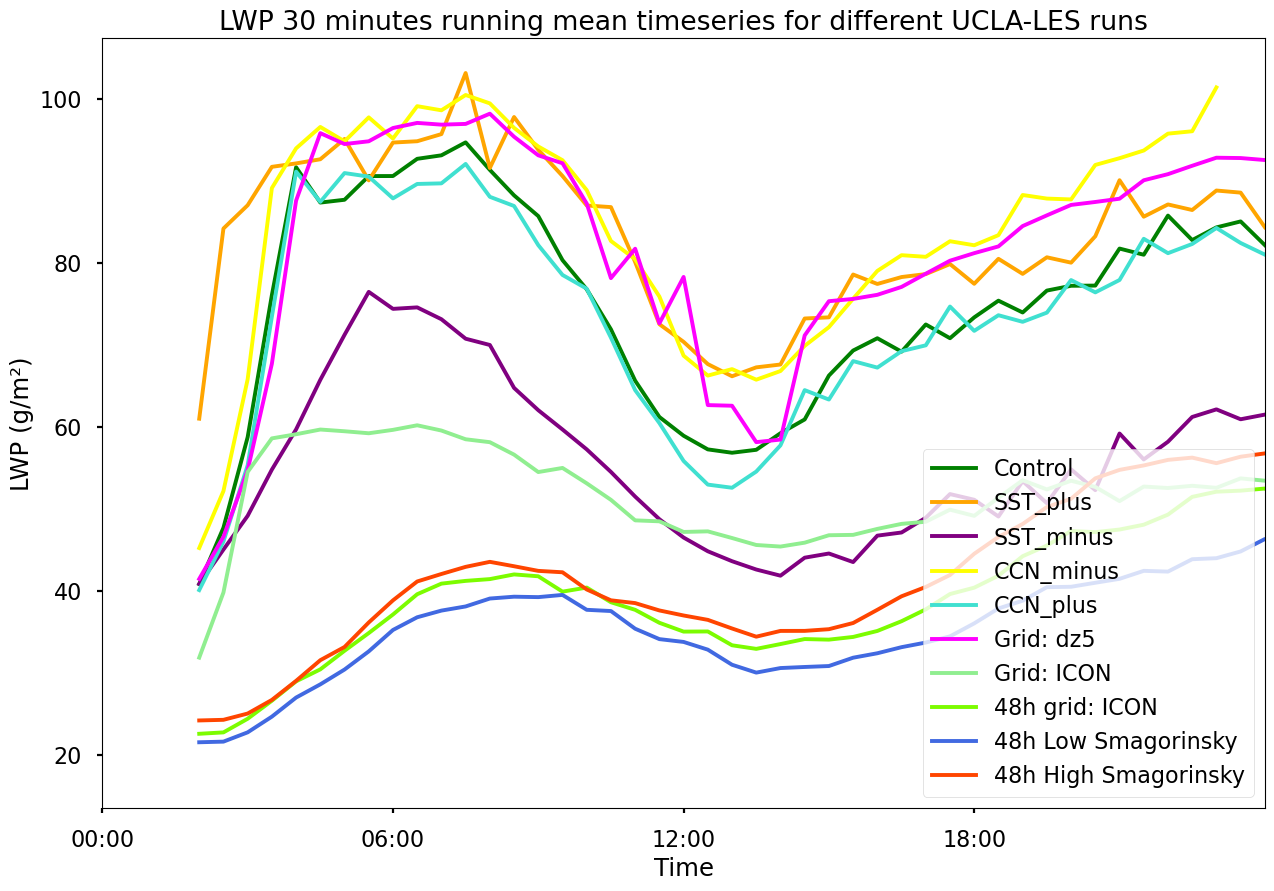

In [21]:
# LWP timeseries of all runs:

import sys
sys.path.append("/home/qwertz/Dokumente/N_eigene_Dokumente/Geo_Met_MSc/Semester_4_5/Thesis_prep_Juni_23/MA/Notebooks/")
from Sc_module import convert_single_timestamp
plt.rc('font', size=12) 
plt.style.use('seaborn-poster')

outputdir = "/home/qwertz/Dokumente/N_eigene_Dokumente/Geo_Met_MSc/Semester_4_5/Thesis_prep_Juni_23/MA/master_plots/02_LWP_stats/"

###################################

file2 = "/home/qwertz/obs_data_MA/iqq_foghat/22/sups_iqq_mwr00_l2_clwvi_p00_20180822000000.nc"
file4 = "/home/qwertz/obs_data_MA/iqq_foghat/23/sups_iqq_mwr00_l2_clwvi_p00_20180823000000.nc"
file_icon = "/home/qwertz/data_js_icon_22_23_August_2018/stat_IQQ_all-times.nc"
ds_icon = xr.open_dataset(file_icon)
lwp_icon = ds_icon["tqc"].isel(ncells=0)
ds_foghat_cloud22 = xr.open_dataset(file2, engine="netcdf4")
ds_foghat_cloud23 = xr.open_dataset(file4, engine="netcdf4")



lwp_obs = xr.concat([ds_foghat_cloud22["clwvi"], ds_foghat_cloud23["clwvi"]], dim="time")
lwp_obs_err = xr.concat([ds_foghat_cloud22["clwvi_err"], ds_foghat_cloud23["clwvi_err"]], dim="time")
#####
# Entfernen von doppelten Zeitpunkten:
lwp_obs = lwp_obs.drop_duplicates("time")# .resample(time="30min")
lwp_obs_err = lwp_obs_err.drop_duplicates("time")

reduced_icon = lwp_icon.sel(time=slice(20180822.0, 20180823.999))
icon_times = [convert_single_timestamp(date) for date in reduced_icon["time"].values]

################################################################

def ucla_time2useful_time(ucla_time):
    # <class 'numpy.datetime64'> angeblich hat es bereits diesen Datentypen...
    time_list = []
    for i, timestep in enumerate(ucla_time):
        if i>2 and str(timestep)[10:19]=="T00:00:00":
            string = "2018-08-23"+str(timestep)[10:]
        else:
            string = "2018-08-22"+str(timestep)[10:]
        time_list.append(np.datetime64(string))
    new_time = np.array(time_list)
    return new_time

################################################################

datasets_ps = {
    "Control": controle_psds,
    "SST_plus": sstplus_psds,
    "SST_minus": sst_minus_psds,
    "CCN_minus": ds_ccn_minus,
    "CCN_plus": ds_ccn_plus,
    "Grid: dz5": grid5_00_psds,
    "Grid: ICON": grid_icon_00_psds,
    "48h grid: ICON": ICON_sharp_ps,
    "48h Low Smagorinsky": low_smag_ps,
    "48h High Smagorinsky": high_smag_ps
}

datasets_ts = {
    "Control": controle_tsds,
    "SST_plus": sstplus_tsds,
    "SST_minus": sst_minus_tsds,
    "CCN_minus": ccn_minus_tsds,
    "CCN_plus": ccn_plus_tsds,
    "Grid: dz5": grid5_00_tsds,
    "Grid: ICON": grid_icon_00_tsds,
    "48h grid: ICON": ICON_sharp_ts,
    "48h Low Smagorinsky": low_smag_ts,
    "48h High Smagorinsky": high_smag_ts
}

colors = {
    "Control": "green",
    "SST_plus": "orange",
    "SST_minus": "purple",
    "CCN_minus": "yellow",
    "CCN_plus": "turquoise",
    "Grid: dz5": "magenta",
    "Grid: ICON": "lightgreen",
    "48h grid: ICON": "lawngreen",
    "48h Low Smagorinsky": "royalblue",
    "48h High Smagorinsky": "orangered"
}

######################################
# Plot
plt.figure(figsize=(15, 10))
plt.title("LWP 30 minutes running mean timeseries for different UCLA-LES runs")

for i, (label, dataset) in enumerate(datasets_ts.items()):
    ucla_time = dataset["time"].values[::120]
    lwp_data = remove_nans(dataset["lwp_bar"].resample(time="30min").mean().values)    

    ##########################################
    # Wichtig - Ändere zum Vergleich mit Obs und ICON!!! :
    # time = ucla_time2useful_time(ucla_time)
    time = ucla_time
    ###########################################
    

    ################
    # plt.figure()
    # plt.title(label)
    #############
    
    plt.plot(time, lwp_data, label=label, color=colors[label])

    ##############
    # plt.xlabel("Time")
    # plt.ylabel("LWP (g/m²)")
    # plt.legend(title="Dataset")
    ############

# plt.plot(lwp_obs["time"], lwp_obs*1000, label="Foghat", color="blue")
# plt.plot(icon_times, reduced_icon*1000, label="ICON-LES", color="red")
plt.xlabel("Time")
# plt.xlim(np.datetime64("2018-08-22T02:00:00"), np.datetime64("2018-08-23T00:00:00"))
plt.xlim(np.datetime64("2000-01-01T02:00:00"), np.datetime64("2000-01-02T00:00:00"))
plt.ylabel("LWP (g/m²)")
plt.legend(loc="lower right")
plt.xticks(np.arange(np.datetime64("2000-01-01T00:00:00") , np.datetime64("2000-01-02T00:00:00"),21600),\
              ["00:00", "06:00", "12:00", "18:00"])
# plt.show()
plt.savefig(outputdir + "LWP_timeseries_all_UCLA-LES.png")

##################################
# Wie mache ich diesen Plot geschmeidiger?


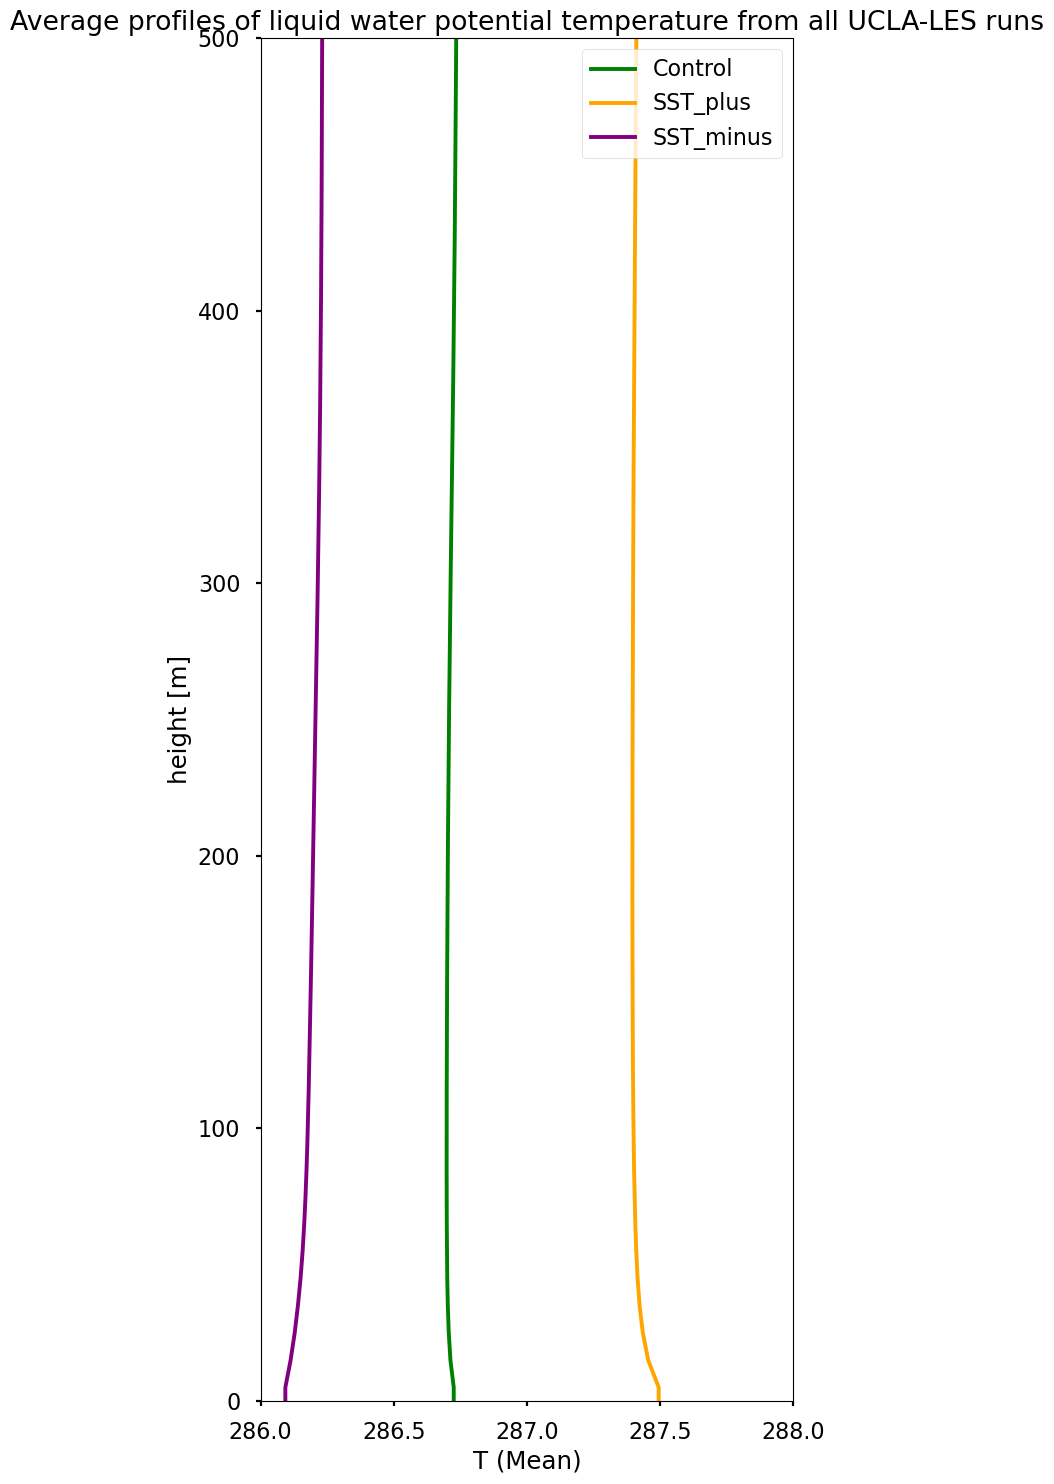

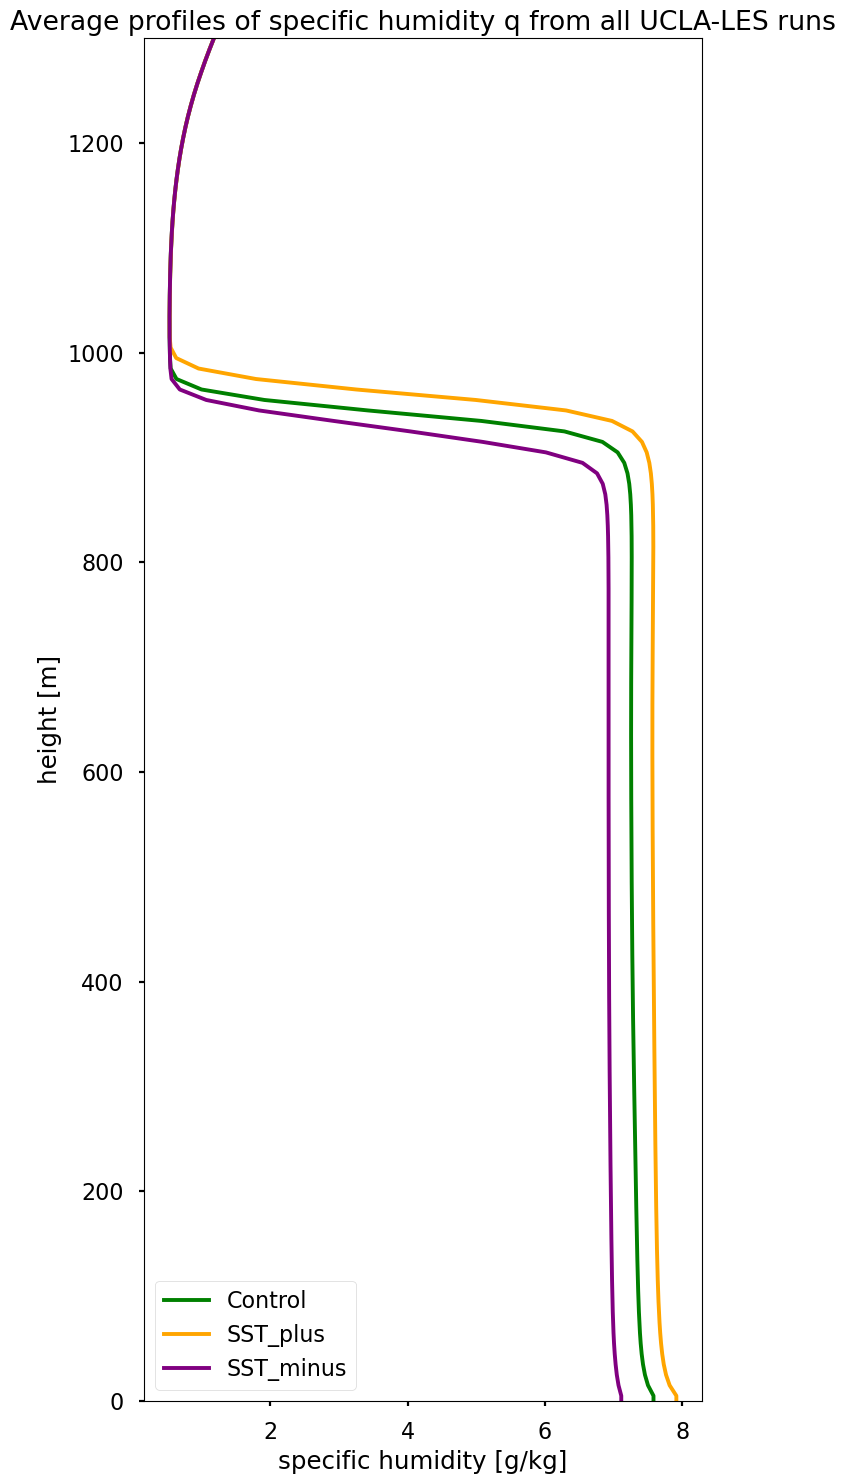

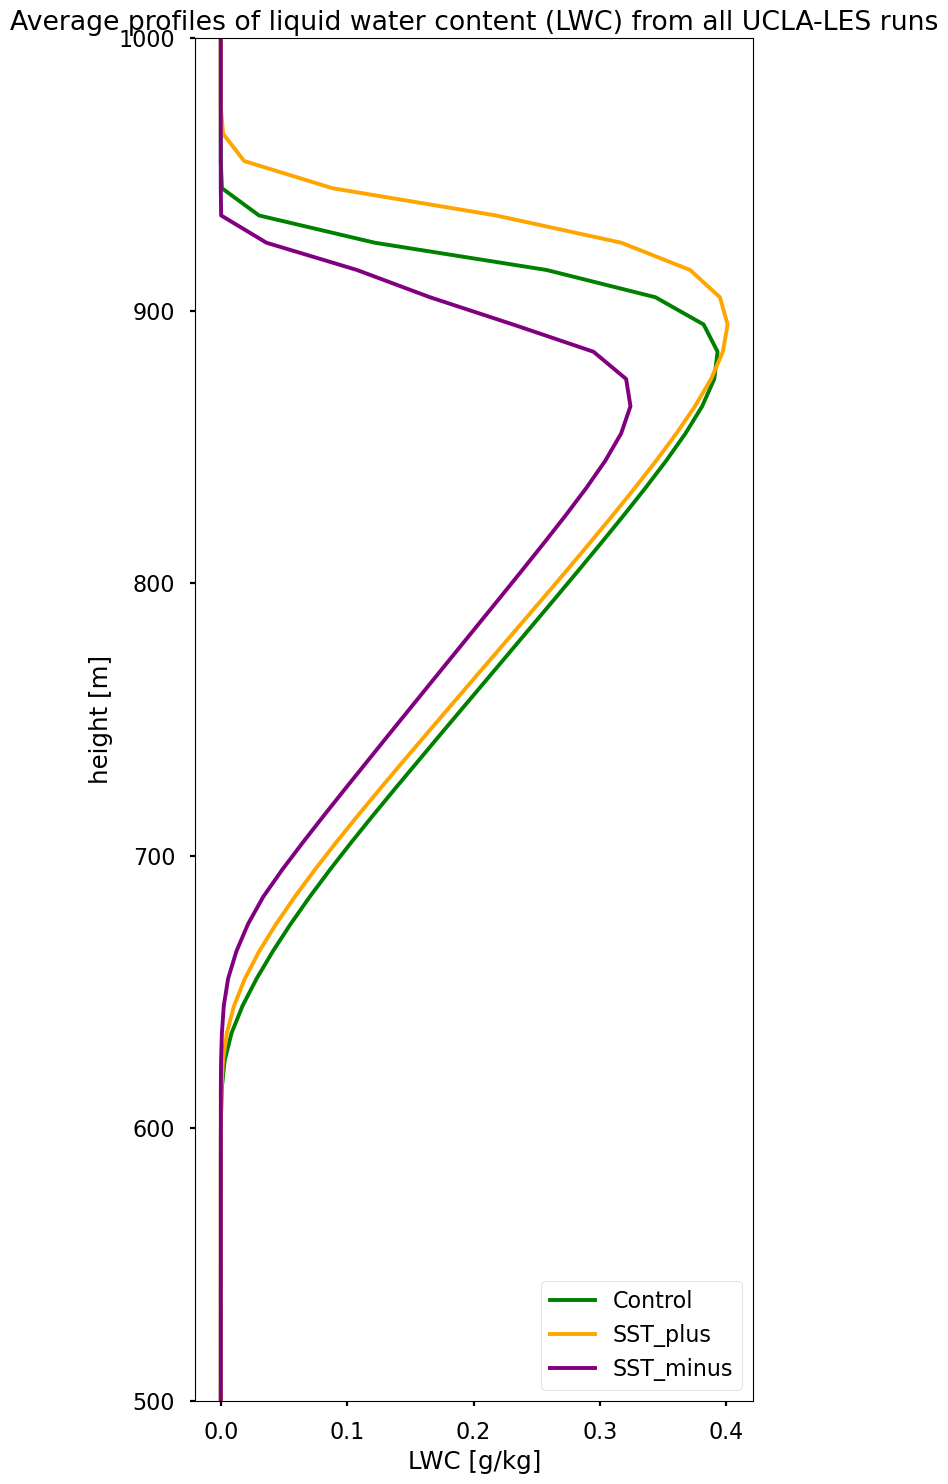

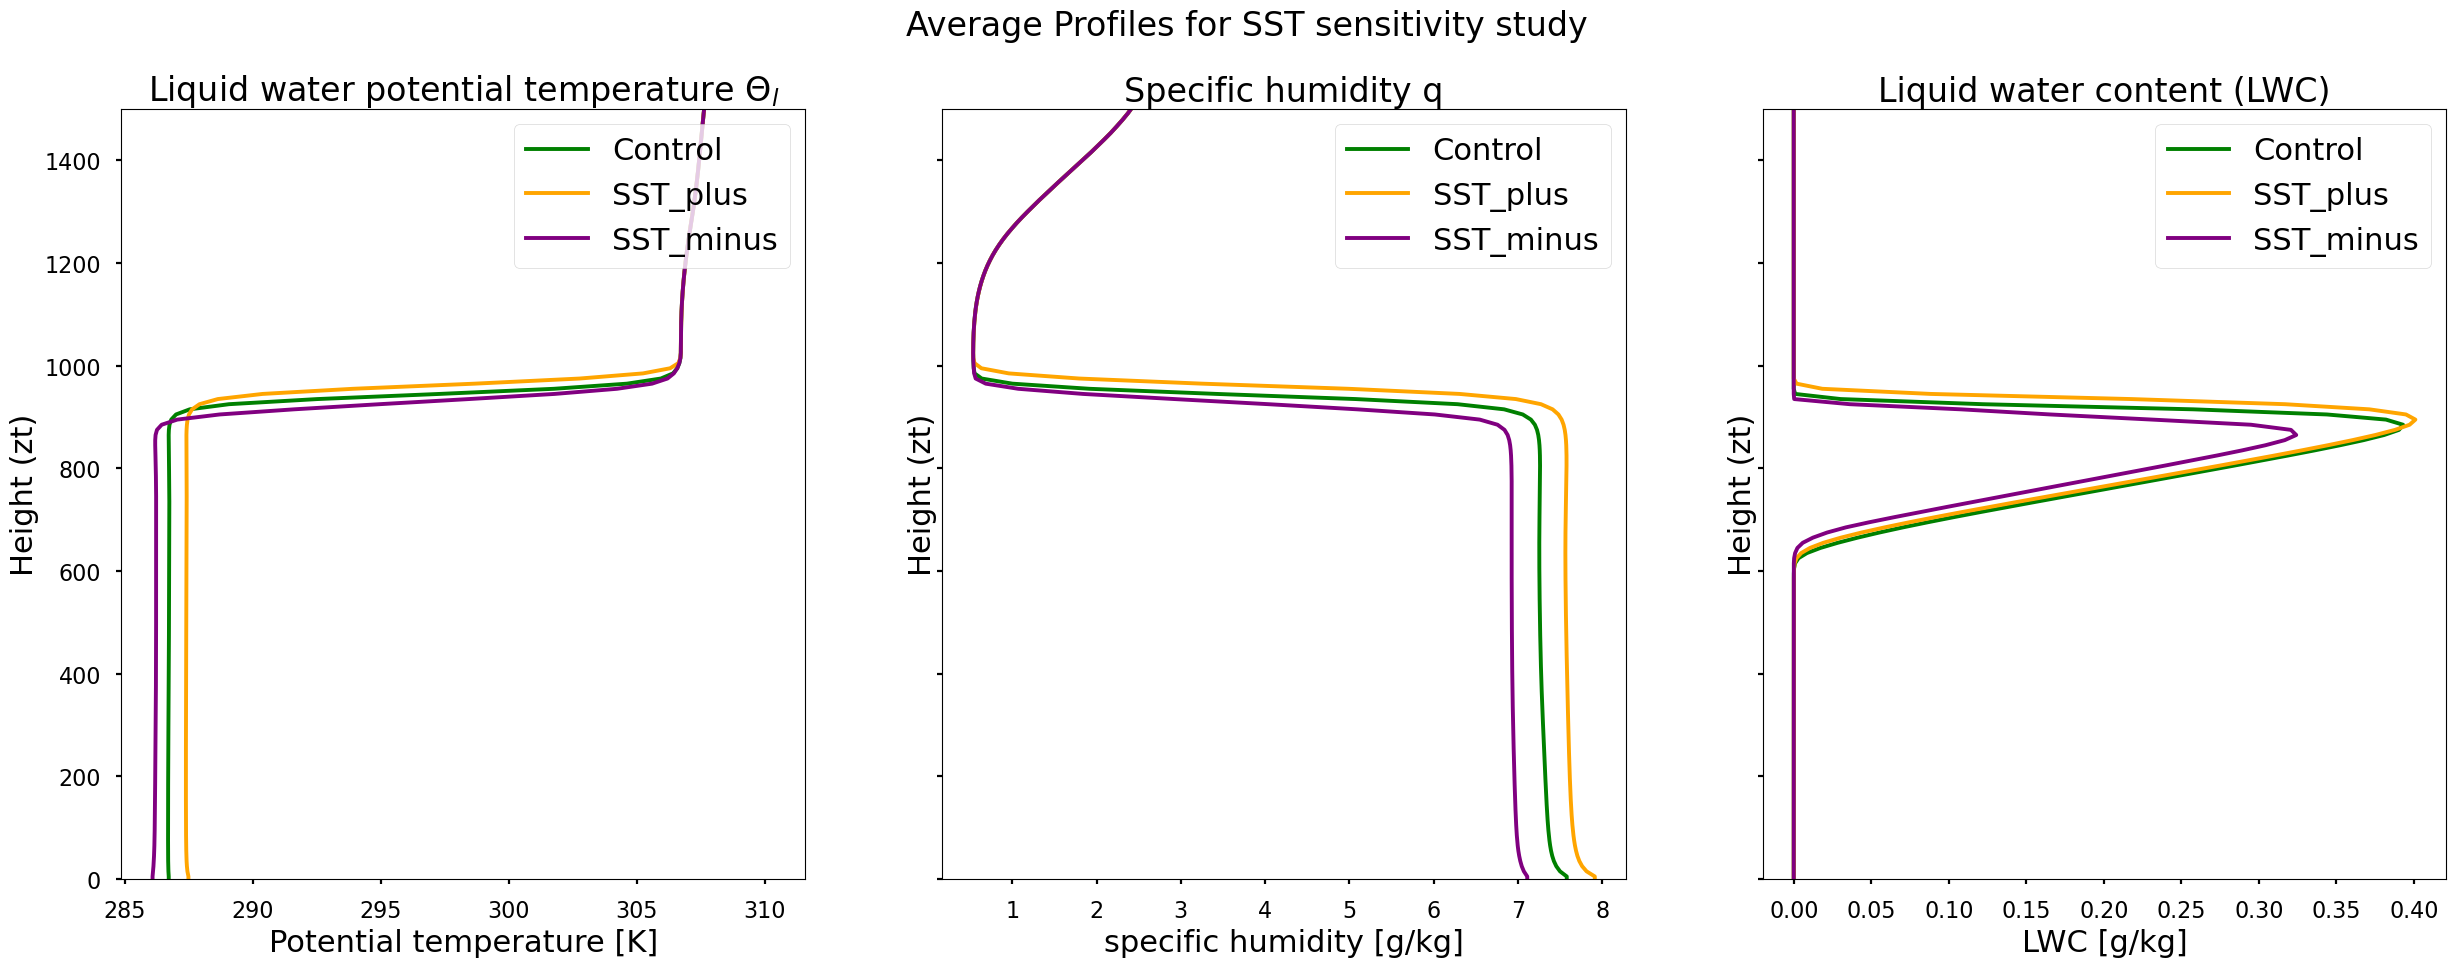

In [22]:
# mean profiles of temperature and humidity and the same seperated for day and night...
outputdir = "/home/qwertz/Dokumente/N_eigene_Dokumente/Geo_Met_MSc/Semester_4_5/Thesis_prep_Juni_23/MA/master_plots/07_PWORK_comps/"

sst_list = ["Control","SST_plus","SST_minus"]
ccn_list = ["Control","CCN_plus","CCN_minus"]
dz_list = ["Control","Grid: dz5","Grid: ICON"]
smag_list =  ["48h grid: ICON", "48h Low Smagorinsky", "48h High Smagorinsky"]

case_list = dz_list
case_label="dz"

case_list = smag_list
case_label="Smagorinsky"

case_list = ccn_list
case_label="CCN"

case_list = sst_list
case_label="SST"

#####################################################
variable = "t"  # Hier kannst du "t", "q" oder "l" auswählen

# Erstelle ein Diagramm für die gewählte Variable
plt.figure(figsize=(7, 15))
plt.title("Average profiles of liquid water potential temperature from all UCLA-LES runs")

# Schleife durch die Datensätze und plotte den Mittelwert der ausgewählten Variable
for label, dataset in datasets_ps.items():

    if not label in case_list:
        continue
    
    # Berechne den Mittelwert über die Zeit für die aktuelle Variable
    mean_profile = dataset[variable].mean(dim="time").values
    height = dataset["zt"].values  # Extrahiere die Höhenebenen
    
    # Plotten des Mittelwerts der Profilkurve
    plt.plot(mean_profile, height, label=label, color=colors[label])

# Achsentitel und Legende hinzufügen
plt.xlabel(f"{variable.upper()} (Mean)")
plt.ylabel("height [m]")
plt.xlim(285, 310)
plt.xlim(286, 288)
plt.ylim(0,1300)
plt.ylim(0,500)
plt.legend(loc="lower right")
plt.legend(loc="upper right")
plt.tight_layout()

# plt.savefig(outputdir + case_label+"_temperature.png")
# plt.savefig(outputdir + case_label+"_temperaturebelow500.png")

########################################
variable = "q"  # Hier kannst du "t", "q" oder "l" auswählen

# Erstelle ein Diagramm für die gewählte Variable
plt.figure(figsize=(7, 15))
plt.title("Average profiles of specific humidity q from all UCLA-LES runs")

# Schleife durch die Datensätze und plotte den Mittelwert der ausgewählten Variable
for label, dataset in datasets_ps.items():
    if not label in case_list:
        continue
    mean_profile = dataset[variable].mean(dim="time").values
    height = dataset["zt"].values  # Extrahiere die Höhenebenen
    
    # Plotten des Mittelwerts der Profilkurve
    plt.plot(mean_profile, height, label=label, color=colors[label])

# Achsentitel und Legende hinzufügen
plt.xlabel("specific humidity [g/kg]")
plt.ylabel("height [m]")
plt.ylim(0,1300)
plt.legend(loc="lower left")
plt.tight_layout()


######################################################
variable = "l"  # Hier kannst du "t", "q" oder "l" auswählen

# Erstelle ein Diagramm für die gewählte Variable
plt.figure(figsize=(7, 15))
plt.title("Average profiles of liquid water content (LWC) from all UCLA-LES runs")

# Schleife durch die Datensätze und plotte den Mittelwert der ausgewählten Variable
for label, dataset in datasets_ps.items():
    if not label in case_list:
        continue
    mean_profile = dataset[variable].mean(dim="time").values
    height = dataset["zt"].values  # Extrahiere die Höhenebenen
    
    # Plotten des Mittelwerts der Profilkurve
    plt.plot(mean_profile, height, label=label, color=colors[label])

# Achsentitel und Legende hinzufügen
plt.xlabel("LWC [g/kg]")
plt.ylabel("height [m]")
plt.ylim(500,1000)
plt.legend(loc="lower right")
plt.tight_layout()

################################################################

import matplotlib.pyplot as plt

# Variablen, die analysiert werden sollen
variables = ["t", "q", "l"]  # t für Temperatur, q für Feuchtigkeit, l für Flüssigkeitswasserinhalt

# Erstelle ein Multipanel-Plot (3 Spalten nebeneinander)
fig, axes = plt.subplots(1, 3,figsize=(30,10), sharey=True)
fig.suptitle("Average Profiles for "+case_label+" sensitivity study")

# Schleife durch jede Variable und erstelle einen Plot in einem der Subplots
for i, variable in enumerate(variables):
    ax = axes[i]  # Wählen Sie den entsprechenden Subplot aus
    
    # Titel für jede Variable
    if variable =="t":
        ax.set_title("Liquid water potential temperature $\Theta_l$", fontsize=24)
    if variable =="l":
        ax.set_title("Liquid water content (LWC)", fontsize=24)
    if variable =="q":
        ax.set_title("Specific humidity q", fontsize=24)
    
    # Schleife durch die Datensätze und plotte den Mittelwert der ausgewählten Variablen
    for label, dataset in datasets_ps.items():
        if label not in case_list:
            continue
        # Berechne den Mittelwert über die Zeit für die aktuelle Variable
        mean_profile = dataset[variable].mean(dim="time").values
        height = dataset["zt"].values  # Extrahiere die Höhenebenen
        
        # Plotten des Mittelwerts der Profilkurve
        ax.plot(mean_profile, height, label=label, color=colors[label])
    
    # Achsenbeschriftungen und Limitierungen
    if variable =="t":
        ax.set_xlabel("Potential temperature [K]", fontsize=22)
    if variable =="l":
        ax.set_xlabel("LWC [g/kg]", fontsize=22)
    if variable =="q":
        ax.set_xlabel("specific humidity [g/kg]", fontsize=22)
    ax.set_ylabel("Height (zt)", fontsize=22)
    ax.set_ylim(0, 1500)  # Gemeinsame Höhenachse für alle Plots
    ax.legend(loc="upper right", fontsize=22)

# Optimierung des Layouts
# plt.tight_layout(rect=[0, 0, 1, 0.95])  # Der Titel oben wird nicht abgeschnitten
# plt.show()
plt.savefig(outputdir + case_label+"_profiles_multipanel.png")
# case_label


#######################################
# Diese plots sind an sich gut, aber so zu voll - maximal einer pro sensitivity study!!!
# Generell sieht man hier gut, dass wir es mit einem STBL zu tun haben...

In [23]:
print(ccn_minus_tsds.data_vars)
print(ccn_minus_tsds["prcp"])
print(ccn_minus_tsds["nrain"])
print(sst_minus_psds.data_vars)

#############################
#    Nc       (time, zt) float32 191kB ...
#    Nr       (time, zt) float32 191kB ...
#    rr       (time, zt) float32 191kB ...
#    prc_r    (time, zm) float32 191kB ...

print(sst_minus_psds["rr"])
print(sst_minus_psds["Nc"])
print(sst_minus_psds["Nr"])
print(sst_minus_psds["prc_r"])

'''
<xarray.DataArray 'rr' (time: 265, zt: 180)> Size: 191kB
[47700 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 2kB 2000-01-01T02:00:00 ... 2000-01-02
  * zt       (zt) float32 720B -5.0 5.0 15.0 ... 1.962e+03 1.98e+03 1.998e+03
Attributes:
    longname:  Rain water
    units:     g/kg
'''

Data variables:
    cfl      (time) float32 20kB ...
    maxdiv   (time) float32 20kB ...
    zi1_bar  (time) float32 20kB ...
    zi2_bar  (time) float32 20kB ...
    zi3_bar  (time) float32 20kB ...
    vtke     (time) float32 20kB ...
    sfcbflx  (time) float32 20kB ...
    wmax     (time) float32 20kB ...
    tsrf     (time) float32 20kB ...
    ustar    (time) float32 20kB ...
    shf_bar  (time) float32 20kB ...
    lhf_bar  (time) float32 20kB ...
    zi_bar   (time) float32 20kB ...
    lwp_bar  (time) float32 20kB 42.37 42.41 42.46 42.51 ... 97.14 98.2 112.0
    lwp_var  (time) float32 20kB ...
    zc       (time) float32 20kB 925.0 925.0 925.0 925.0 ... 925.0 925.0 925.0
    zb       (time) float32 20kB ...
    cfrac    (time) float32 20kB 1.0 1.0 1.0 1.0 1.0 1.0 ... 1.0 1.0 1.0 1.0 1.0
    lmax     (time) float32 20kB ...
    albedo   (time) float32 20kB ...
    rwp_bar  (time) float32 20kB ...
    prcp     (time) float32 20kB 6.752e-10 6.754e-10 ... 0.0008337 0.003517
    

"\n<xarray.DataArray 'rr' (time: 265, zt: 180)> Size: 191kB\n[47700 values with dtype=float32]\nCoordinates:\n  * time     (time) datetime64[ns] 2kB 2000-01-01T02:00:00 ... 2000-01-02\n  * zt       (zt) float32 720B -5.0 5.0 15.0 ... 1.962e+03 1.98e+03 1.998e+03\nAttributes:\n    longname:  Rain water\n    units:     g/kg\n"